<a href="https://colab.research.google.com/github/nazrann233/Bitcoin-and-Gold-prediction-in-MYR/blob/main/FYP_GARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is my new FYP
### Nazran
- The version that need to use for this part of the analysis is xxx, yyy, zzz

In [5]:
# Load Packages
import pandas as pd

In [6]:
# Loading Data
bitcoin = pd.read_csv('/content/drive/MyDrive/Raw Data/Bitcoin.csv')
gold = pd.read_csv('/content/drive/MyDrive/Raw Data/XAU MYR.csv')

In [7]:

merged = pd.merge(bitcoin, gold, on='Date', how='left') ## change to 'inner' to follow XAU/MYR dates
display(merged.head())

merged['Date'] = pd.to_datetime(merged['Date'], format='%m/%d/%Y')
merged = merged.sort_values(by='Date')

merged['Bitcoin'] = pd.to_numeric(merged['Price_x'].str.replace(',', ''))
merged['Gold']    = pd.to_numeric(merged['Price_y'].str.replace(',', ''))

# Forward-fill missing 'Gold' values
merged['Gold'] = merged['Gold'].ffill()

Date    Price_x     Open_x     High_x      Low_x   Vol._x Change %_x  \
0  12/31/2024  93,557.20  92,777.20  96,163.40  92,036.20   74.85K      0.84%   
1  12/30/2024  92,779.80  93,718.70  94,936.40  91,522.30  112.43K     -1.00%   
2  12/29/2024  93,716.30  95,282.60  95,315.40  93,026.70   47.71K     -1.65%   
3  12/28/2024  95,284.50  94,274.90  95,684.30  94,124.70   32.97K      1.07%   
4  12/27/2024  94,275.90  95,776.40  97,243.30  93,472.80   85.12K     -1.57%   

     Price_y     Open_y     High_y      Low_y   Vol._y Change %_y  
0  11,723.19  11,637.94  11,750.45  11,612.15  229.20K      0.85%  
1  11,624.68  11,716.68  11,750.01  11,590.70  206.81K     -0.70%  
2        NaN        NaN        NaN        NaN      NaN        NaN  
3        NaN        NaN        NaN        NaN      NaN        NaN  
4  11,706.16  11,766.88  11,825.55  11,676.43  198.20K     -0.45%

In [8]:
display(merged[['Date', 'Bitcoin', 'Gold']].head(60))

Date  Bitcoin     Gold
3287 2016-01-01    434.0  4548.43
3286 2016-01-02    433.7  4548.43
3285 2016-01-03    430.7  4548.43
3284 2016-01-04    433.3  4662.44
3283 2016-01-05    431.2  4674.01
3282 2016-01-06    430.8  4799.37
3281 2016-01-07    457.0  4867.63
3280 2016-01-08    452.9  4828.91
3279 2016-01-09    448.3  4828.91
3278 2016-01-10    446.2  4828.91
3277 2016-01-11    447.7  4791.76
3276 2016-01-12    445.0  4791.70
3275 2016-01-13    432.2  4781.92
3274 2016-01-14    429.1  4731.32
3273 2016-01-15    372.3  4785.15
3272 2016-01-16    385.0  4785.15
3271 2016-01-17    382.5  4785.15
3270 2016-01-18    384.4  4782.22
3269 2016-01-19    379.5  4739.11
3268 2016-01-20    414.6  4833.31
3267 2016-01-21    410.2  4813.62
3266 2016-01-22    382.6  4714.43
3265 2016-01-23    388.6  4714.43
3264 2016-01-24    402.1  4714.43
3263 2016-01-25    392.8  4760.24
3262 2016-01-26    389.8  4802.09
3261 2016-01-27    395.0  4783.14
3260 2016-01-28    379.7  4692.89
3259 2016-01-29    380.3  4638.21
3258 2016-01-30    377.8  4638.21
3257 2016-01-31    369.8  4638.21
3256 2016-02-01    372.2  4681.45
3255 2016-02-02    373.9  4745.81
3254 2016-02-03    368.0  4818.56
3253 2016-02-04    390.6  4788.35
3252 2016-02-05    386.5  4875.02
3251 2016-02-06    376.7  4875.02
3250 2016-02-07    377.9  4875.02
3249 2016-02-08    372.6  4939.59
3248 2016-02-09    375.3  4938.88
3247 2016-02-10    381.9  4930.40
3246 2016-02-11    379.5  5155.39
3245 2016-02-12    384.0  5157.33
3244 2016-02-13    390.1  5157.33
3243 2016-02-14    405.5  5157.33
3242 2016-02-15    401.1  4988.36
3241 2016-02-16    406.4  4978.09
3240 2016-02-17    417.1  5089.16
3239 2016-02-18    421.4  5117.84
3238 2016-02-19    420.0  5160.49
3237 2016-02-20    440.1  5160.49
3236 2016-02-21    437.9  5160.49
3235 2016-02-22    437.8  5068.78
3234 2016-02-23    419.9  5150.40
3233 2016-02-24    422.7  5180.91
3232 2016-02-25    423.5  5198.12
3231 2016-02-26    427.3  5141.84
3230 2016-02-27    431.3  5141.84
3229 2016-02-28    432.5  5141.84
3228 2016-02-29    436.2  5200.86

In [9]:
import numpy as np

In [10]:
import matplotlib.pyplot as plt

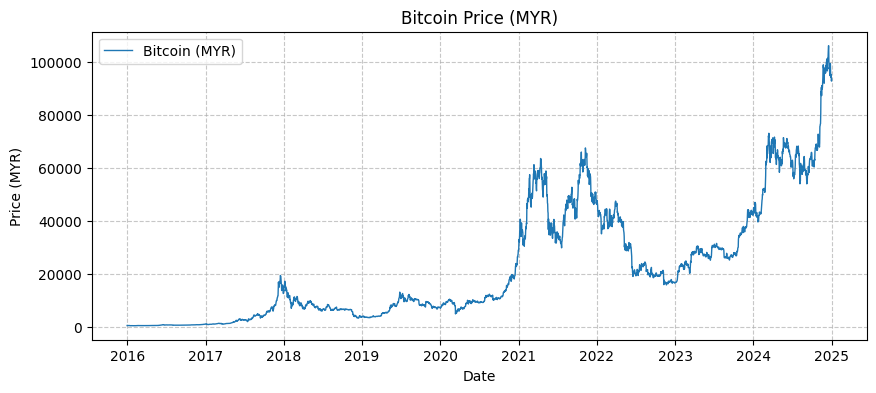

In [11]:
plt.figure(figsize=(10,4))
plt.plot(merged['Date'], merged['Bitcoin'], label='Bitcoin (MYR)', linewidth=1)
plt.title('Bitcoin Price (MYR)')
plt.xlabel('Date')
plt.ylabel('Price (MYR)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

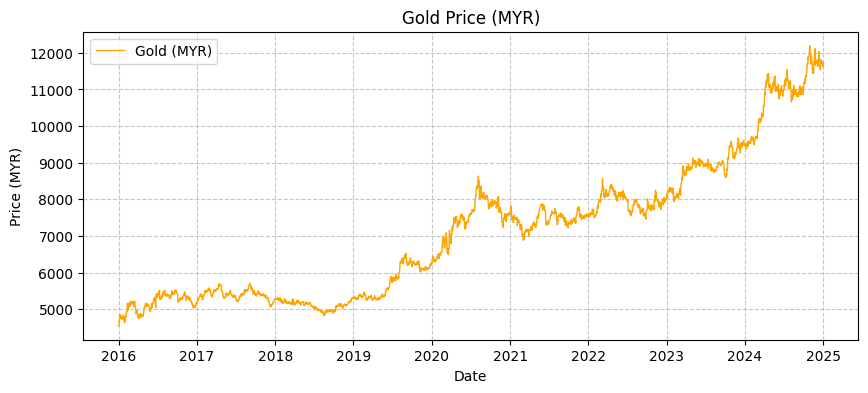

In [12]:
plt.figure(figsize=(10,4))
plt.plot(merged['Date'], merged['Gold'], label='Gold (MYR)', color='orange', linewidth=1)
plt.title('Gold Price (MYR)')
plt.xlabel('Date')
plt.ylabel('Price (MYR)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Raw Bitcoin and Gold ADF

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
# ADF ON RAW DATA
# ========================
from statsmodels.tsa.stattools import adfuller

def adf_print(series, name):
    res = adfuller(series.dropna())
    print(f"\n--- ADF Test: {name} ---")
    print(f"ADF Statistic: {res[0]:.6f}")
    print(f"p-value     : {res[1]:.6f}")
    for k, v in res[4].items():
        print(f"Critical Value ({k}): {v:.4f}")
    print("→ Stationary ✅" if res[1] < 0.05 else "→ Non-stationary ❌")

adf_print(merged['Bitcoin'], 'Raw Bitcoin')
adf_print(merged['Gold'],    'Raw Gold')


--- ADF Test: Raw Bitcoin ---
ADF Statistic: -0.104248
p-value     : 0.949014
Critical Value (1%): -3.4324
Critical Value (5%): -2.8624
Critical Value (10%): -2.5672
→ Non-stationary ❌

--- ADF Test: Raw Gold ---
ADF Statistic: 0.725288
p-value     : 0.990329
Critical Value (1%): -3.4323
Critical Value (5%): -2.8624
Critical Value (10%): -2.5672
→ Non-stationary ❌


# Log Return

In [15]:
# Calculate log returns (natural log difference between consecutive prices)
merged['Bitcoin_logret'] = np.log(merged['Bitcoin'] / merged['Bitcoin'].shift(1))
merged['Gold_logret']    = np.log(merged['Gold'] / merged['Gold'].shift(1))

# Drop any missing values caused by the shift
merged = merged.dropna(subset=['Bitcoin_logret', 'Gold_logret'])

# Display first few rows to check
display(merged[['Date', 'Bitcoin_logret', 'Gold_logret']].head(50))

Date  Bitcoin_logret  Gold_logret
3286 2016-01-02       -0.000691     0.000000
3285 2016-01-03       -0.006941     0.000000
3284 2016-01-04        0.006019     0.024757
3283 2016-01-05       -0.004858     0.002478
3282 2016-01-06       -0.000928     0.026467
3281 2016-01-07        0.059039     0.014123
3280 2016-01-08       -0.009012    -0.007986
3279 2016-01-09       -0.010209     0.000000
3278 2016-01-10       -0.004695     0.000000
3277 2016-01-11        0.003356    -0.007723
3276 2016-01-12       -0.006049    -0.000013
3275 2016-01-13       -0.029186    -0.002043
3274 2016-01-14       -0.007198    -0.010638
3273 2016-01-15       -0.141990     0.011313
3272 2016-01-16        0.033543     0.000000
3271 2016-01-17       -0.006515     0.000000
3270 2016-01-18        0.004955    -0.000612
3269 2016-01-19       -0.012829    -0.009056
3268 2016-01-20        0.088460     0.019682
3267 2016-01-21       -0.010669    -0.004082
3266 2016-01-22       -0.069655    -0.020821
3265 2016-01-23        0.015560     0.000000
3264 2016-01-24        0.034150     0.000000
3263 2016-01-25       -0.023400     0.009670
3262 2016-01-26       -0.007667     0.008753
3261 2016-01-27        0.013252    -0.003954
3260 2016-01-28       -0.039504    -0.019049
3259 2016-01-29        0.001579    -0.011720
3258 2016-01-30       -0.006595     0.000000
3257 2016-01-31       -0.021403     0.000000
3256 2016-02-01        0.006469     0.009279
3255 2016-02-02        0.004557     0.013654
3254 2016-02-03       -0.015905     0.015213
3253 2016-02-04        0.059601    -0.006289
3252 2016-02-05       -0.010552     0.017938
3251 2016-02-06       -0.025683     0.000000
3250 2016-02-07        0.003180     0.000000
3249 2016-02-08       -0.014124     0.013158
3248 2016-02-09        0.007220    -0.000144
3247 2016-02-10        0.017433    -0.001718
3246 2016-02-11       -0.006304     0.044623
3245 2016-02-12        0.011788     0.000376
3244 2016-02-13        0.015761     0.000000
3243 2016-02-14        0.038718     0.000000
3242 2016-02-15       -0.010910    -0.033312
3241 2016-02-16        0.013127    -0.002061
3240 2016-02-17        0.025988     0.022067
3239 2016-02-18        0.010257     0.005620
3238 2016-02-19       -0.003328     0.008299
3237 2016-02-20        0.046747     0.000000

In [16]:
# ADF ON LOG RETURNS
# ========================
from statsmodels.tsa.stattools import adfuller

def adf_print(series, name):
    res = adfuller(series.dropna())
    print(f"\n--- ADF Test: {name} ---")
    print(f"ADF Statistic: {res[0]:.6f}")
    print(f"p-value     : {res[1]:.6f}")
    for k, v in res[4].items():
        print(f"Critical Value ({k}): {v:.4f}")
    print("→ Stationary ✅" if res[1] < 0.05 else "→ Non-stationary ❌")

adf_print(merged['Bitcoin_logret'], 'Bitcoin Log Return')
adf_print(merged['Gold_logret'],    'Gold Log Return')


--- ADF Test: Bitcoin Log Return ---
ADF Statistic: -39.836431
p-value     : 0.000000
Critical Value (1%): -3.4323
Critical Value (5%): -2.8624
Critical Value (10%): -2.5672
→ Stationary ✅

--- ADF Test: Gold Log Return ---
ADF Statistic: -43.300169
p-value     : 0.000000
Critical Value (1%): -3.4323
Critical Value (5%): -2.8624
Critical Value (10%): -2.5672
→ Stationary ✅


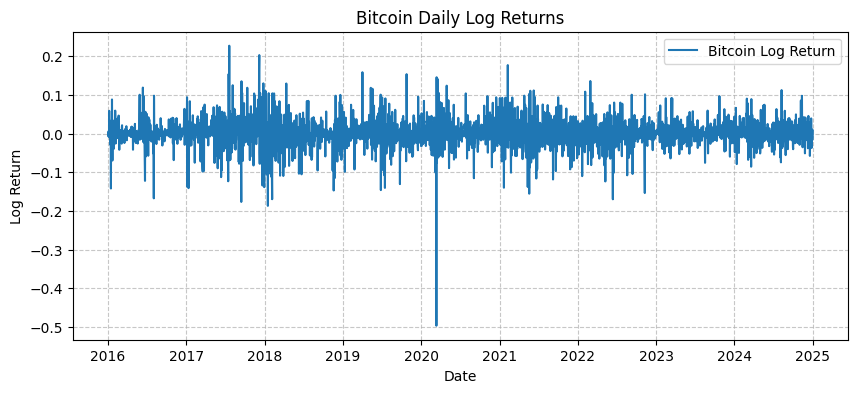

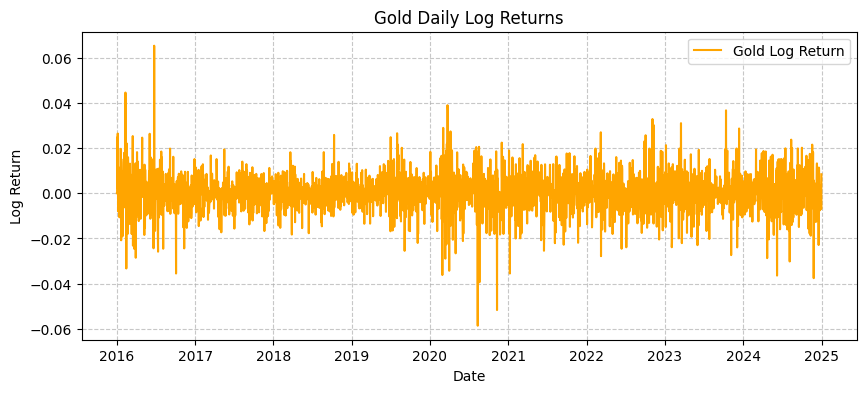

In [17]:
#Plot the log returns ---
plt.figure(figsize=(10,4))
plt.plot(merged['Date'], merged['Bitcoin_logret'], label='Bitcoin Log Return')
plt.title('Bitcoin Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(merged['Date'], merged['Gold_logret'], label='Gold Log Return', color='orange')
plt.title('Gold Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Descriptive Statistic

In [18]:
# Calculate and display descriptive statistics for log returns
print("Descriptive statistics for Bitcoin Log Returns:")
display(merged['Bitcoin_logret'].describe())

print("\nDescriptive statistics for Gold Log Returns:")
display(merged['Gold_logret'].describe())

print("\nSkewness for Bitcoin Log Returns:", merged['Bitcoin_logret'].skew())
print("Kurtosis for Bitcoin Log Returns:", merged['Bitcoin_logret'].kurtosis())

print("\nSkewness for Gold Log Returns:", merged['Gold_logret'].skew())
print("Kurtosis for Gold Log Returns:", merged['Gold_logret'].kurtosis())

Descriptive statistics for Bitcoin Log Returns:


count    3287.000000
mean        0.001635
std         0.036918
min        -0.497278
25%        -0.012508
50%         0.001402
75%         0.017001
max         0.227602
Name: Bitcoin_logret, dtype: float64


Descriptive statistics for Gold Log Returns:


count    3287.000000
mean        0.000288
std         0.007686
min        -0.058673
25%        -0.002181
50%         0.000000
75%         0.003132
max         0.065374
Name: Gold_logret, dtype: float64


Skewness for Bitcoin Log Returns: -0.8086325137374343
Kurtosis for Bitcoin Log Returns: 13.502757094871246

Skewness for Gold Log Returns: -0.14235743872692705
Kurtosis for Gold Log Returns: 6.47255826693234


#  ACF and PACF of Log Returns

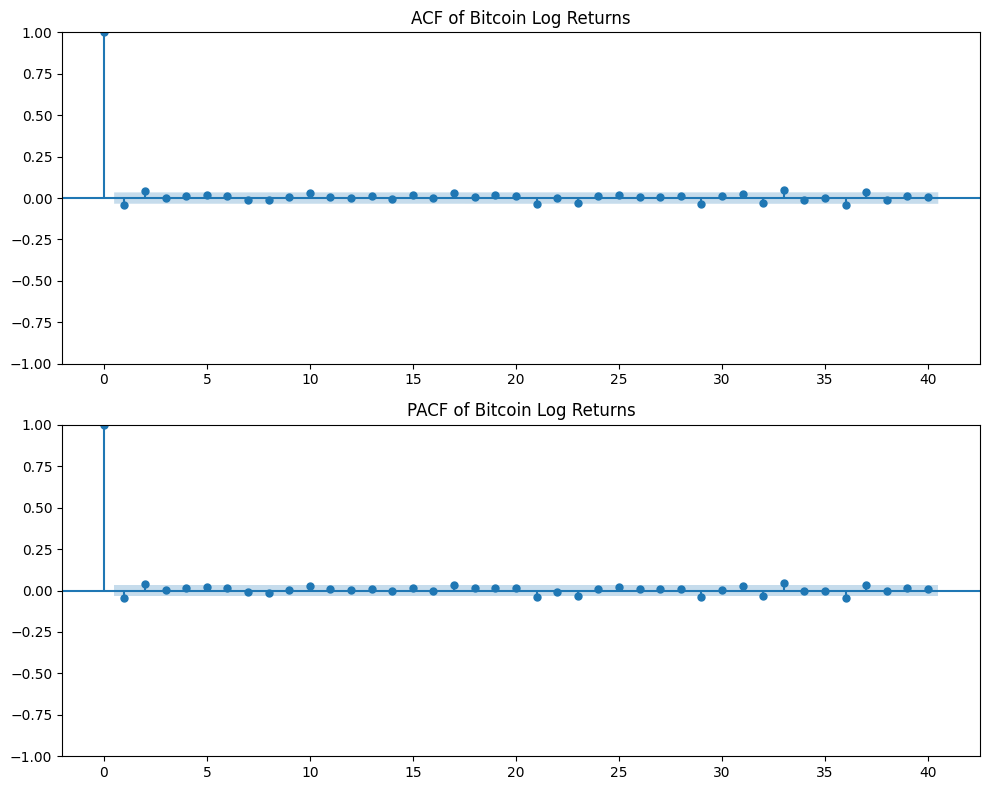

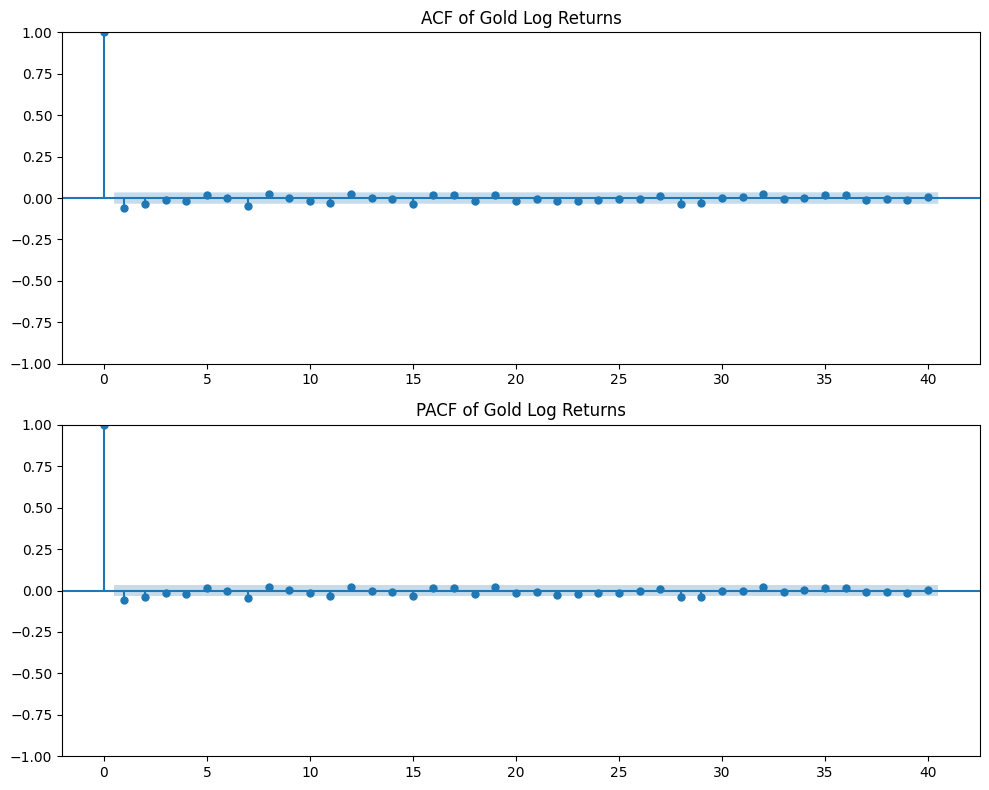

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for Bitcoin Log Returns
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(merged['Bitcoin_logret'].dropna(), ax=axes[0], lags=40)
plot_pacf(merged['Bitcoin_logret'].dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Bitcoin Log Returns')
axes[1].set_title('PACF of Bitcoin Log Returns')
plt.tight_layout()
plt.show()

# Plot ACF and PACF for Gold Log Returns
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(merged['Gold_logret'].dropna(), ax=axes[0], lags=40)
plot_pacf(merged['Gold_logret'].dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Gold Log Returns')
axes[1].set_title('PACF of Gold Log Returns')
plt.tight_layout()
plt.show()

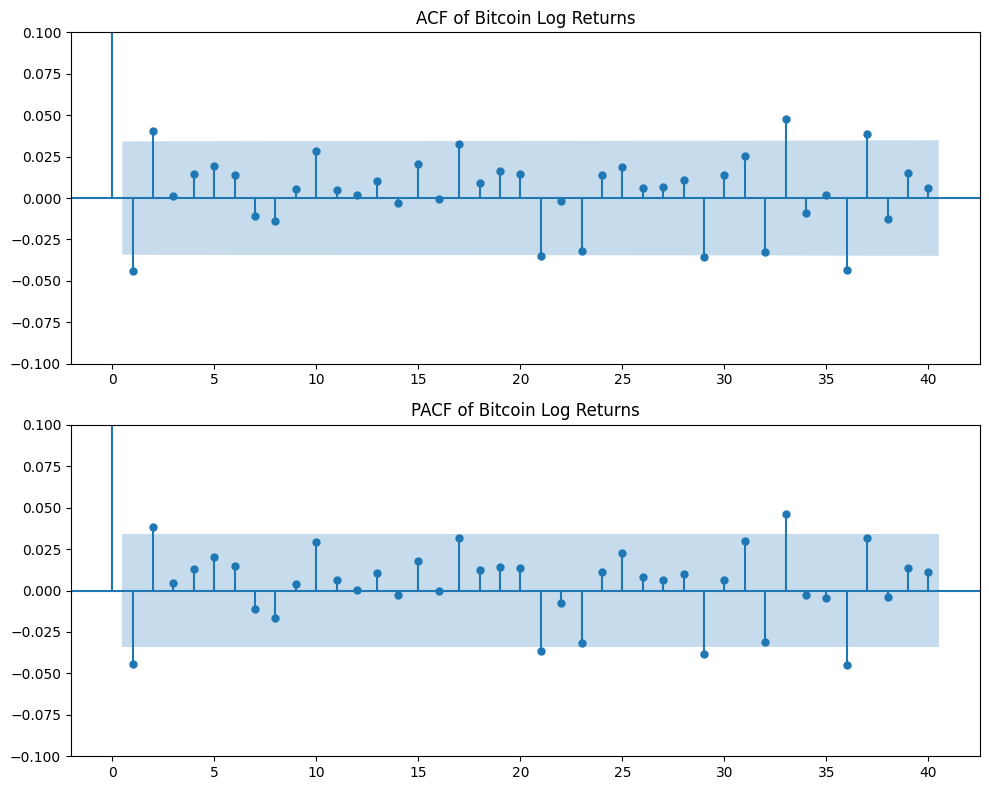

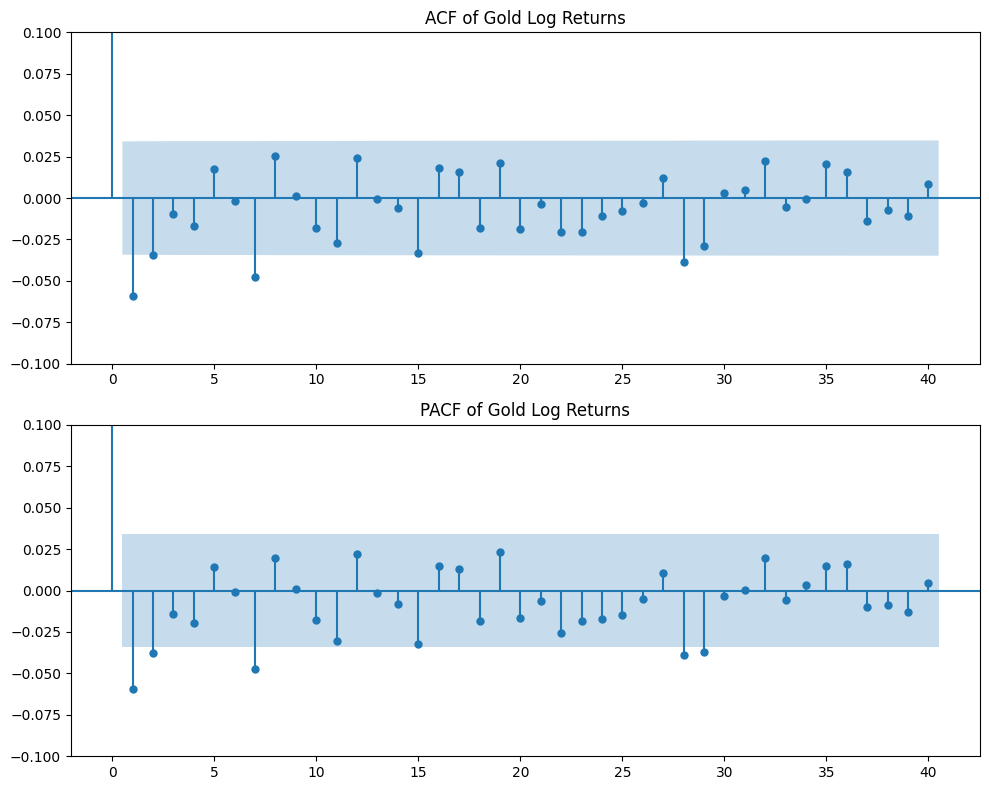

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for Bitcoin Log Returns
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(merged['Bitcoin_logret'].dropna(), ax=axes[0], lags=40)
plot_pacf(merged['Bitcoin_logret'].dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Bitcoin Log Returns')
axes[1].set_title('PACF of Bitcoin Log Returns')
axes[0].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
axes[1].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
plt.tight_layout()
plt.show()

# Plot ACF and PACF for Gold Log Returns
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(merged['Gold_logret'].dropna(), ax=axes[0], lags=40)
plot_pacf(merged['Gold_logret'].dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Gold Log Returns')
axes[1].set_title('PACF of Gold Log Returns')
axes[0].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
axes[1].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
plt.tight_layout()
plt.show()

# ACF and PACF Squared Log Returns

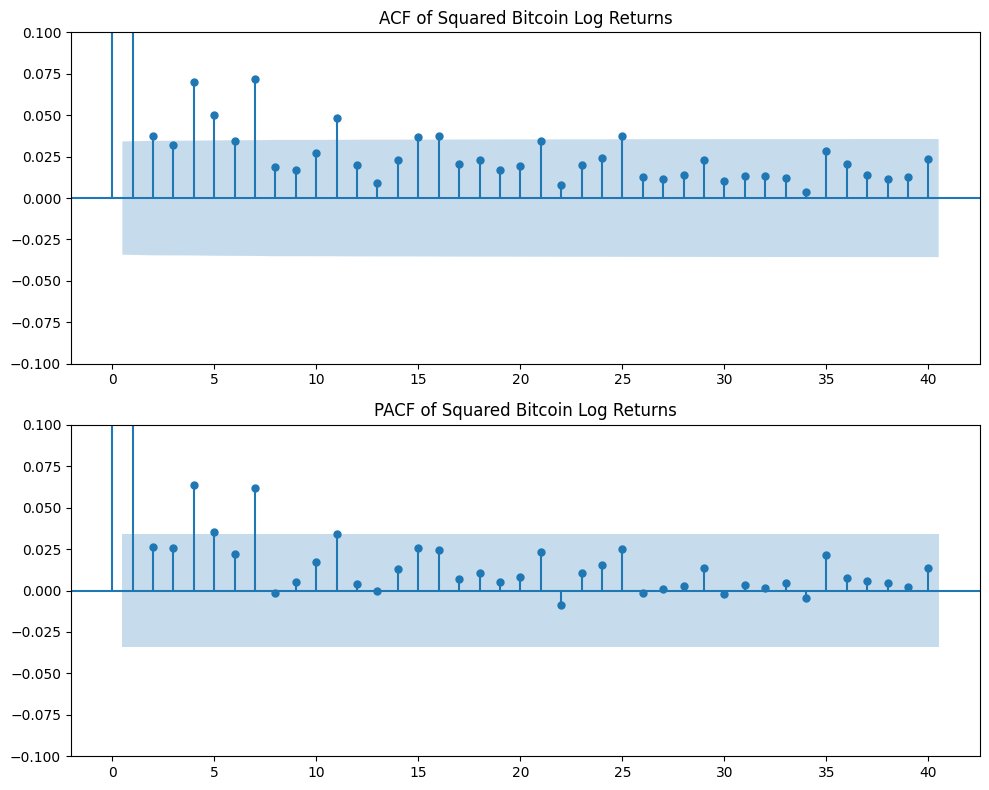

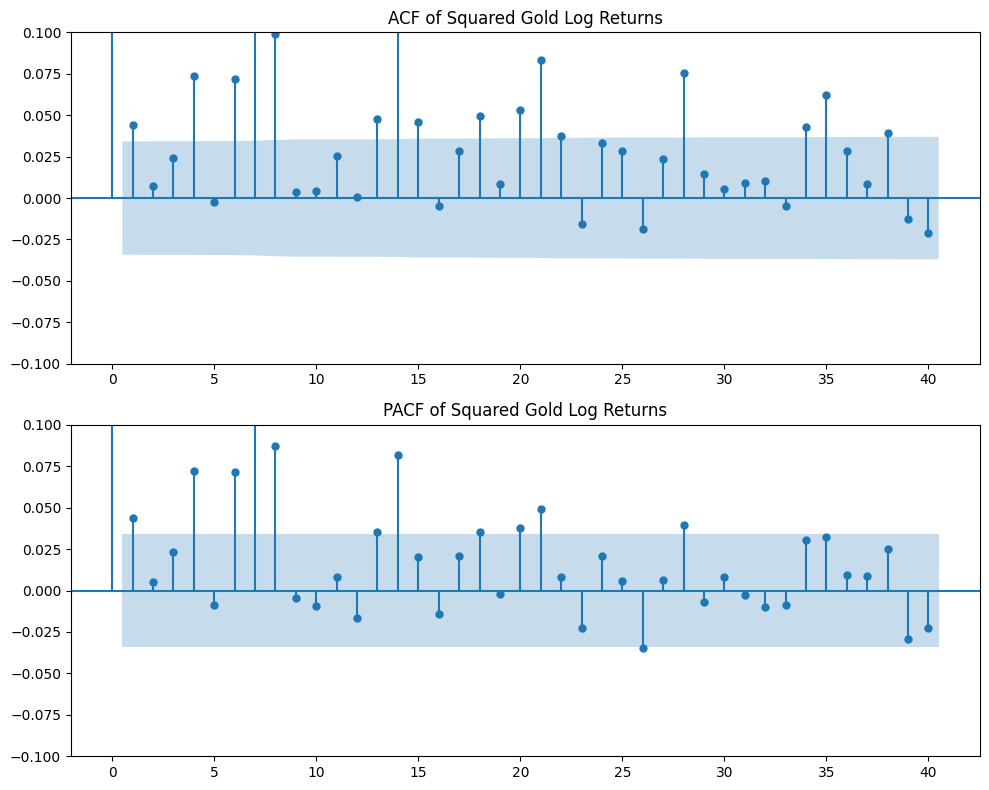

In [21]:
# Calculate squared log returns
merged['Bitcoin_logret_sq'] = merged['Bitcoin_logret']**2
merged['Gold_logret_sq'] = merged['Gold_logret']**2

# Plot ACF and PACF for squared Bitcoin Log Returns
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(merged['Bitcoin_logret_sq'].dropna(), ax=axes[0], lags=40)
plot_pacf(merged['Bitcoin_logret_sq'].dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Squared Bitcoin Log Returns')
axes[1].set_title('PACF of Squared Bitcoin Log Returns')
axes[0].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
axes[1].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
plt.tight_layout()
plt.show()

# Plot ACF and PACF for squared Gold Log Returns
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(merged['Gold_logret_sq'].dropna(), ax=axes[0], lags=40)
plot_pacf(merged['Gold_logret_sq'].dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Squared Gold Log Returns')
axes[1].set_title('PACF of Squared Gold Log Returns')
axes[0].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
axes[1].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
plt.tight_layout()
plt.show()

### Granger

In [19]:
from statsmodels.tsa.api import VAR

#need to know how many lag is appropriate for Granger
data = merged[['Date', 'Bitcoin_logret', 'Gold_logret']].dropna()

model = VAR(data[['Bitcoin_logret', 'Gold_logret']])
lag_order = model.select_order(maxlags=10)
print(lag_order.summary())

# Print the optimal lag based on AIC
optimal_lag_aic = lag_order.aic
print(f"\nOptimal Lag (AIC): {optimal_lag_aic}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -16.35     -16.34*   7.965e-08      -16.34
1       -16.35      -16.34   7.935e-08     -16.35*
2      -16.35*      -16.33  7.929e-08*      -16.34
3       -16.35      -16.32   7.945e-08      -16.34
4       -16.35      -16.31   7.954e-08      -16.34
5       -16.35      -16.31   7.961e-08      -16.33
6       -16.34      -16.30   7.970e-08      -16.33
7       -16.35      -16.29   7.966e-08      -16.33
8       -16.34      -16.28   7.980e-08      -16.32
9       -16.34      -16.27   7.994e-08      -16.32
10      -16.34      -16.26   7.996e-08      -16.31
--------------------------------------------------

Optimal Lag (AIC): 2


In [20]:
from statsmodels.tsa.stattools import grangercausalitytests

print("Granger Causality Test: Does Gold log return Granger cause Bitcoin log return?")
granger_test_y_to_x = grangercausalitytests(data[['Bitcoin_logret', 'Gold_logret']], maxlag=2, verbose=True)
print('\n')


print("Granger Causality Test: Does Bitcoin log return Granger cause Gold log return?")
granger_test_x_to_y = grangercausalitytests(data[['Bitcoin_logret', 'Gold_logret']], maxlag=2, verbose=True)

Granger Causality Test: Does Gold log return Granger cause Bitcoin log return?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5674  , p=0.4513  , df_denom=3283, df_num=1
ssr based chi2 test:   chi2=0.5679  , p=0.4511  , df=1
likelihood ratio test: chi2=0.5679  , p=0.4511  , df=1
parameter F test:         F=0.5674  , p=0.4513  , df_denom=3283, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4393  , p=0.6445  , df_denom=3280, df_num=2
ssr based chi2 test:   chi2=0.8800  , p=0.6440  , df=2
likelihood ratio test: chi2=0.8799  , p=0.6441  , df=2
parameter F test:         F=0.4393  , p=0.6445  , df_denom=3280, df_num=2


Granger Causality Test: Does Bitcoin log return Granger cause Gold log return?

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5674  , p=0.4513  , df_denom=3283, df_num=1
ssr based chi2 test:   chi2=0.5679  , p=0.4511  , df=1
likelihood ratio test: chi2=0.5679  , p=0.4511  , df=1
pa

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


# Split 70:30

In [22]:
# Split data into training and testing sets (70:30 ratio) using log return data
train_size = int(len(merged) * 0.7)
train_data = merged[['Date', 'Bitcoin_logret', 'Gold_logret']].iloc[0:train_size]
test_data = merged[['Date', 'Bitcoin_logret', 'Gold_logret']].iloc[train_size:len(merged)]

print("Training data size:", len(train_data))
print("Testing data size:", len(test_data))

Training data size: 2300
Testing data size: 987


In [1]:
!pip uninstall numpy pmdarima -y

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4


In [2]:
!pip install "numpy==1.26.4" "pmdarima==2.0.4"

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompati

In [1]:
from pmdarima import auto_arima

In [23]:
# Fit auto_arima model on Bitcoin log returns
model_bitcoin = auto_arima(train_data['Bitcoin_logret'], seasonal=False, suppress_warnings=True)
print("Bitcoin Auto ARIMA Model Summary:")
print(model_bitcoin.summary())

# Fit auto_arima model on Gold log returns
model_gold = auto_arima(train_data['Gold_logret'], seasonal=False, suppress_warnings=True)
print("\nGold Auto ARIMA Model Summary:")
print(model_gold.summary())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Bitcoin Auto ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2300
Model:               SARIMAX(2, 0, 2)   Log Likelihood                4133.396
Date:                Thu, 06 Nov 2025   AIC                          -8256.791
Time:                        03:21:44   BIC                          -8228.088
Sample:                             0   HQIC                         -8246.326
                               - 2300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4019      0.202      1.987      0.047       0.006       0.798
ar.L2          0.5046      0.207      2.439      0.015       0.099       0.910
ma.L1         -0.4

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12


Gold Auto ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2300
Model:               SARIMAX(0, 0, 1)   Log Likelihood                7969.997
Date:                Thu, 06 Nov 2025   AIC                         -15933.994
Time:                        03:21:55   BIC                         -15916.772
Sample:                             0   HQIC                        -15927.715
                               - 2300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.000      1.686      0.092   -4.17e-05       0.001
ma.L1         -0.0397      0.016     -2.408      0.016      -0.072      -0.007
sigma2      5.723e-0

# Letak

In [26]:
%pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 13.1 MB/s eta 0:00:00


In [27]:
from arch import arch_model
import pandas as pd

# not rescale


In [29]:
# 1. Get residuals from your auto_arima models (which are already fitted)
btc_residuals = model_bitcoin.resid()
gold_residuals = model_gold.resid()

# 2. Rescale the residuals to fix the DataScaleWarning
# (This is still a good practice)
btc_resid_scaled = btc_residuals
gold_resid_scaled = gold_residuals

# 3. Fit GARCH(1,1) on the SCALED RESIDUALS
# We use mean='Zero' because the residuals should already have a mean of zero.
garch_btc = arch_model(btc_resid_scaled,
                       mean='Zero',
                       vol='Garch', p=1, q=1,
                       dist='Normal')

res_garch_btc = garch_btc.fit(disp='off')
print("Bitcoin GARCH(1,1) on ARMA(2,2) Residuals:")
print(res_garch_btc.summary())

# 4. Fit GARCH(1,1) on the SCALED RESIDUALS for Gold
garch_gold = arch_model(gold_resid_scaled,
                        mean='Zero',
                        vol='Garch', p=1, q=1,
                        dist='Normal')

res_garch_gold = garch_gold.fit(disp='off')
print("\nGold GARCH(1,1) on MA(1) Residuals:")
print(res_garch_gold.summary())

Bitcoin GARCH(1,1) on ARMA(2,2) Residuals:
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4272.26
Distribution:                  Normal   AIC:                          -8538.51
Method:            Maximum Likelihood   BIC:                          -8521.29
                                        No. Observations:                 2300
Date:                Thu, Nov 06 2025   Df Residuals:                     2300
Time:                        03:29:02   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1

/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001606. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)
/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.724e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)


# rescale

In [30]:
# 1. Get residuals from your auto_arima models (which are already fitted)
btc_residuals = model_bitcoin.resid()
gold_residuals = model_gold.resid()

# 2. Rescale the residuals to fix the DataScaleWarning
# (This is still a good practice)
btc_resid_scaled = btc_residuals * 100
gold_resid_scaled = gold_residuals * 100

# 3. Fit GARCH(1,1) on the SCALED RESIDUALS
# We use mean='Zero' because the residuals should already have a mean of zero.
garch_btc = arch_model(btc_resid_scaled,
                       mean='Zero',
                       vol='Garch', p=1, q=1,
                       dist='Normal')

res_garch_btc = garch_btc.fit(disp='off')
print("Bitcoin GARCH(1,1) on ARMA(2,2) Residuals:")
print(res_garch_btc.summary())

# 4. Fit GARCH(1,1) on the SCALED RESIDUALS for Gold
garch_gold = arch_model(gold_resid_scaled,
                        mean='Zero',
                        vol='Garch', p=1, q=1,
                        dist='Normal')

res_garch_gold = garch_gold.fit(disp='off')
print("\nGold GARCH(1,1) on MA(1) Residuals:")
print(res_garch_gold.summary())



Bitcoin GARCH(1,1) on ARMA(2,2) Residuals:
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6301.14
Distribution:                  Normal   AIC:                           12608.3
Method:            Maximum Likelihood   BIC:                           12625.5
                                        No. Observations:                 2300
Date:                Thu, Nov 06 2025   Df Residuals:                     2300
Time:                        03:34:31   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.7352

In [33]:
from arch import arch_model
import pandas as pd

# 1. Get residuals from your auto_arima models (which are already fitted)
btc_residuals = model_bitcoin.resid()
gold_residuals = model_gold.resid()

# 2. Rescale the residuals to fix the DataScaleWarning
btc_resid_scaled = btc_residuals * 100
gold_resid_scaled = gold_residuals * 100

# 3. Fit GARCH(1,1) on the SCALED RESIDUALS
garch_btc = arch_model(btc_resid_scaled,
                       mean='Zero',
                       vol='Garch', p=1, q=1,
                       dist='t')

res_garch_btc = garch_btc.fit(disp='off')
print("Bitcoin GARCH(1,1) on ARMA(2,2) Residuals (t-distribution):")
print(res_garch_btc.summary())

# 4. Fit GARCH(1,1) on the SCALED RESIDUALS for Gold
garch_gold = arch_model(gold_resid_scaled,
                        mean='Zero',
                        vol='Garch', p=1, q=1,
                        dist='t')

res_garch_gold = garch_gold.fit(disp='off')
print("\nGold GARCH(1,1) on MA(1) Residuals (t-distribution):")
print(res_garch_gold.summary())

# 5. Fit EGARCH(1,1) on the SCALED RESIDUALS for Gold
egarch11_gold = arch_model(gold_resid_scaled,
                         mean='Zero',
                         vol='EGARCH', p=1, q=1,
                         dist='t')

res11_egarch_gold = egarch_gold11.fit(disp='off')
print("\nGold EGARCH(1,1) on MA(1) Residuals (t-distribution):")
print(res11_egarch_gold.summary())

# 5. Fit EGARCH(2,2) on the SCALED RESIDUALS for Gold
egarch_gold = arch_model(gold_resid_scaled,
                         mean='Zero',
                         vol='EGARCH', p=2, q=2,
                         dist='t')

res_egarch_gold = egarch_gold.fit(disp='off')
print("\nGold EGARCH(2,2) on MA(1) Residuals (t-distribution):")
print(res_egarch_gold.summary())



# 6. Fit GJR-GARCH(1,1) on the SCALED RESIDUALS for Gold
gjr_garch_gold = arch_model(gold_resid_scaled,
                            mean='Zero',
                            vol='GARCH', p=1, o=1, q=1, # o=1 for GJR-GARCH
                            dist='t')

res_gjr_garch_gold = gjr_garch_gold.fit(disp='off')
print("\nGold GJR-GARCH(1,1) on MA(1) Residuals (t-distribution):")
print(res_gjr_garch_gold.summary())

Bitcoin GARCH(1,1) on ARMA(2,2) Residuals (t-distribution):
                          Zero Mean - GARCH Model Results                           
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -5972.23
Distribution:      Standardized Student's t   AIC:                           11952.5
Method:                  Maximum Likelihood   BIC:                           11975.4
                                              No. Observations:                 2300
Date:                      Thu, Nov 06 2025   Df Residuals:                     2300
Time:                              03:35:24   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
-----------------------

NameError: name 'egarch_gold11' is not defined

In [34]:
from arch import arch_model
import pandas as pd

# 1. Get residuals from your auto_arima models (which are already fitted)
btc_residuals = model_bitcoin.resid()
gold_residuals = model_gold.resid()

# 2. Rescale the residuals to fix the DataScaleWarning
btc_resid_scaled = btc_residuals * 100
gold_resid_scaled = gold_residuals * 100

# 3. Fit GARCH(1,1) on the SCALED RESIDUALS
garch_btc = arch_model(btc_resid_scaled,
                       mean='Zero',
                       vol='Garch', p=1, q=1,
                       dist='t')

res_garch_btc = garch_btc.fit(disp='off')
print("Bitcoin GARCH(1,1) on ARMA(2,2) Residuals (t-distribution):")
print(res_garch_btc.summary())

# 4. Fit GARCH(1,1) on the SCALED RESIDUALS for Gold
garch_gold = arch_model(gold_resid_scaled,
                        mean='Zero',
                        vol='Garch', p=1, q=1,
                        dist='t')

res_garch_gold = garch_gold.fit(disp='off')
print("\nGold GARCH(1,1) on MA(1) Residuals (t-distribution):")
print(res_garch_gold.summary())

# 5. Fit EGARCH(1,1) on the SCALED RESIDUALS for Gold
egarch_gold1 = arch_model(gold_resid_scaled,
                         mean='Zero',
                         vol='EGARCH', p=1, q=1,
                         dist='t')

res11_egarch_gold = egarch_gold1.fit(disp='off')
print("\nGold EGARCH(1,1) on MA(1) Residuals (t-distribution):")
print(res11_egarch_gold.summary())

# 5. Fit EGARCH(2,2) on the SCALED RESIDUALS for Gold
egarch_gold = arch_model(gold_resid_scaled,
                         mean='Zero',
                         vol='EGARCH', p=2, q=2,
                         dist='t')

res_egarch_gold = egarch_gold.fit(disp='off')
print("\nGold EGARCH(2,2) on MA(1) Residuals (t-distribution):")
print(res_egarch_gold.summary())



# 6. Fit GJR-GARCH(1,1) on the SCALED RESIDUALS for Gold
gjr_garch_gold = arch_model(gold_resid_scaled,
                            mean='Zero',
                            vol='GARCH', p=1, o=1, q=1, # o=1 for GJR-GARCH
                            dist='t')

res_gjr_garch_gold = gjr_garch_gold.fit(disp='off')
print("\nGold GJR-GARCH(1,1) on MA(1) Residuals (t-distribution):")
print(res_gjr_garch_gold.summary())

Bitcoin GARCH(1,1) on ARMA(2,2) Residuals (t-distribution):
                          Zero Mean - GARCH Model Results                           
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -5972.23
Distribution:      Standardized Student's t   AIC:                           11952.5
Method:                  Maximum Likelihood   BIC:                           11975.4
                                              No. Observations:                 2300
Date:                      Thu, Nov 06 2025   Df Residuals:                     2300
Time:                              03:35:55   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
-----------------------

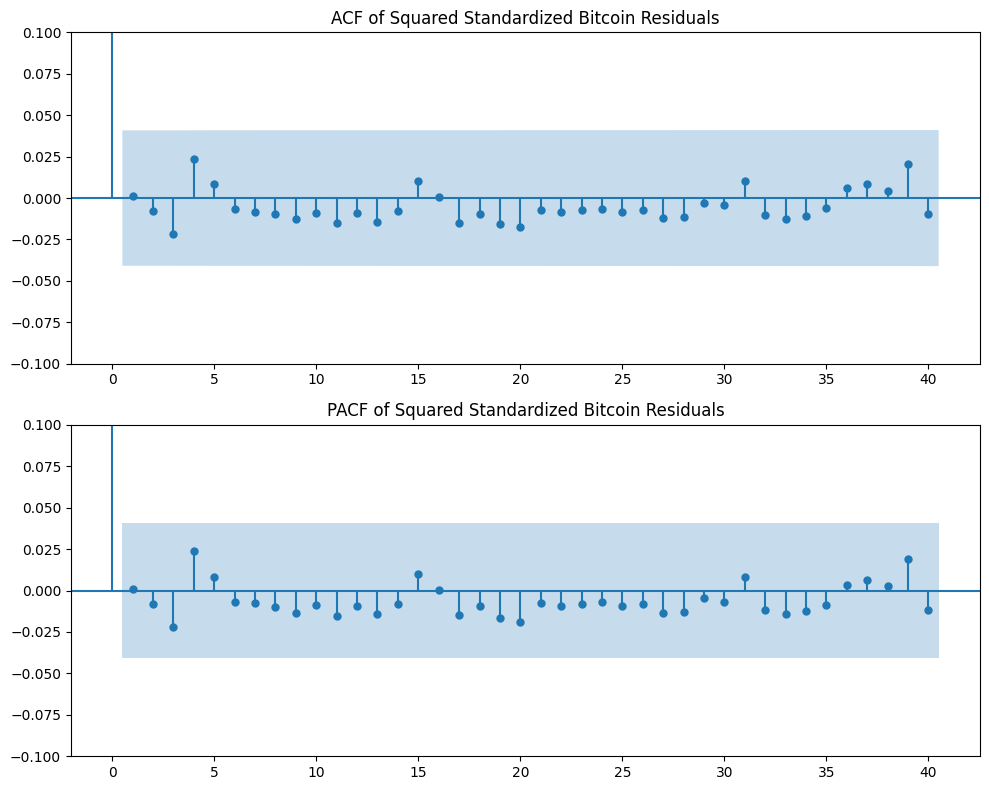

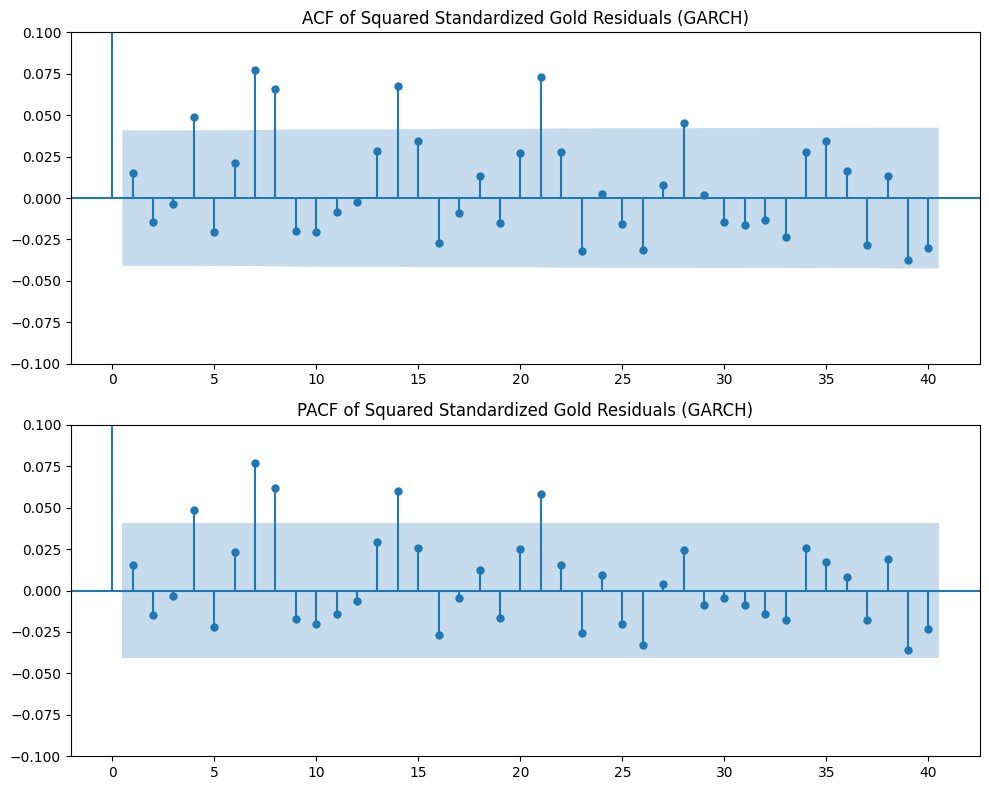

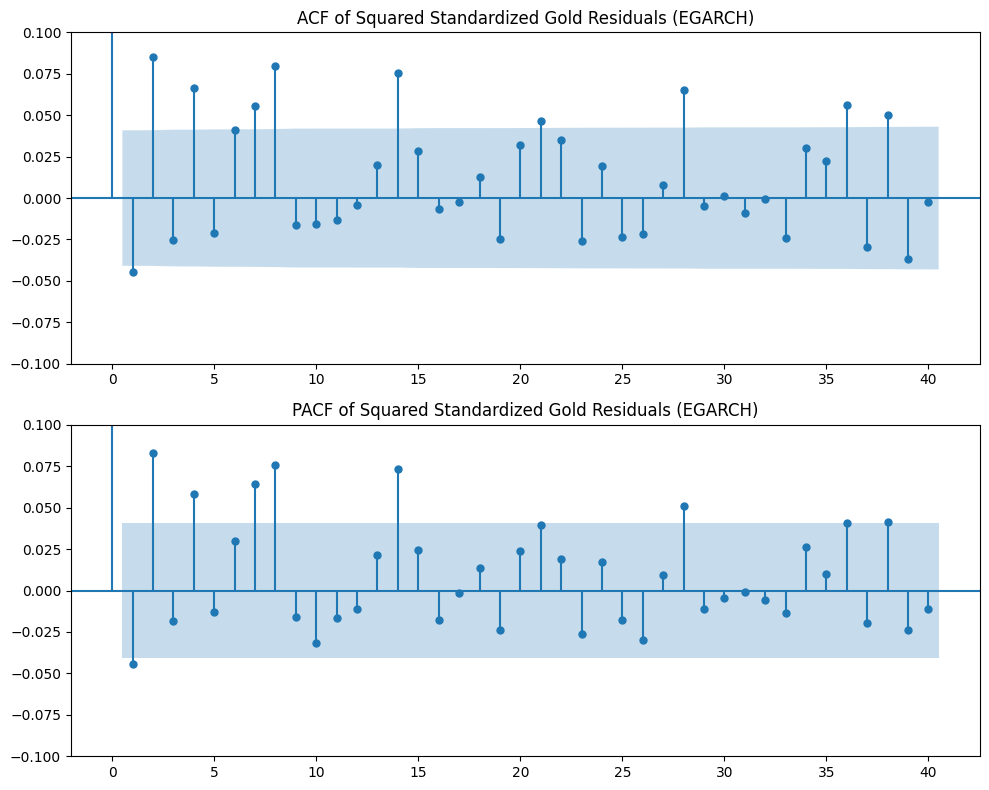

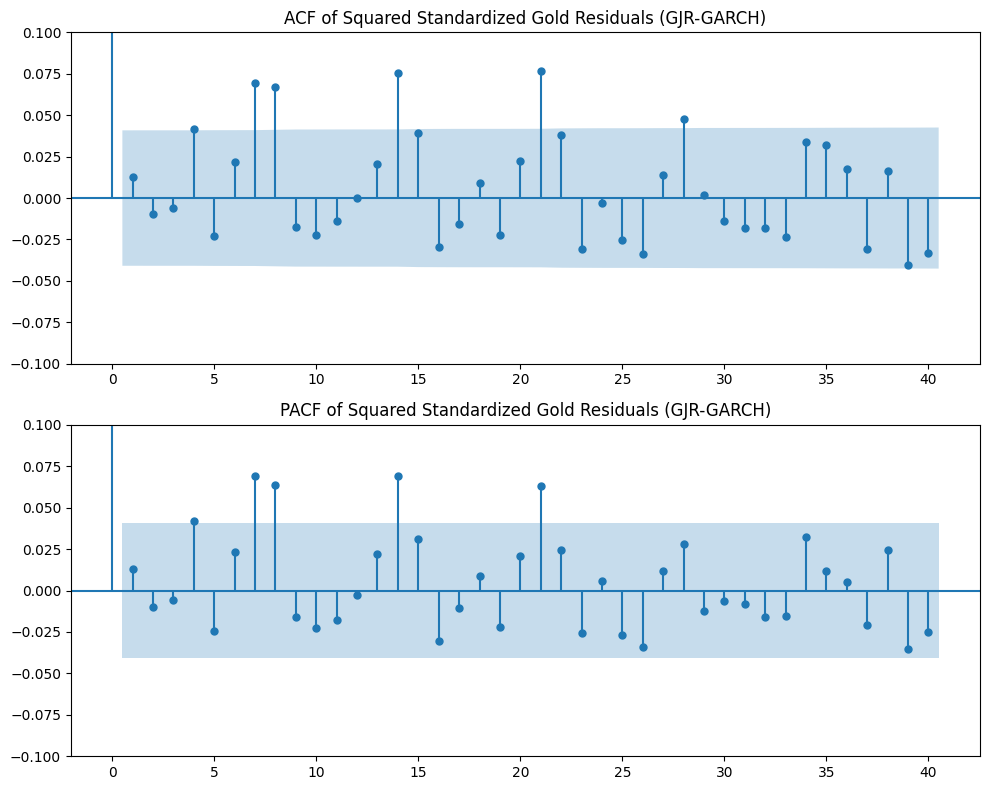

In [35]:
# Get the standardized residuals
btc_std_resid = res_garch_btc.std_resid
gold_std_resid = res_garch_gold.std_resid

# Square the standardized residuals
btc_std_resid_sq = btc_std_resid**2
gold_std_resid_sq = gold_std_resid**2

# Plot ACF and PACF for squared standardized Bitcoin residuals
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(btc_std_resid_sq.dropna(), ax=axes[0], lags=40)
plot_pacf(btc_std_resid_sq.dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Squared Standardized Bitcoin Residuals')
axes[1].set_title('PACF of Squared Standardized Bitcoin Residuals')
axes[0].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
axes[1].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
plt.tight_layout()
plt.show()

# Plot ACF and PACF for squared standardized Gold residuals (GARCH)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(gold_std_resid_sq.dropna(), ax=axes[0], lags=40)
plot_pacf(gold_std_resid_sq.dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Squared Standardized Gold Residuals (GARCH)')
axes[1].set_title('PACF of Squared Standardized Gold Residuals (GARCH)')
axes[0].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
axes[1].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
plt.tight_layout()
plt.show()

# Get standardized residuals for EGARCH and GJR-GARCH Gold models
gold_std_resid_egarch = res_egarch_gold.std_resid
gold_std_resid_gjr_garch = res_gjr_garch_gold.std_resid

# Square the standardized residuals for EGARCH and GJR-GARCH Gold models
gold_std_resid_sq_egarch = gold_std_resid_egarch**2
gold_std_resid_sq_gjr_garch = gold_std_resid_gjr_garch**2

# Plot ACF and PACF for squared standardized Gold residuals (EGARCH)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(gold_std_resid_sq_egarch.dropna(), ax=axes[0], lags=40)
plot_pacf(gold_std_resid_sq_egarch.dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Squared Standardized Gold Residuals (EGARCH)')
axes[1].set_title('PACF of Squared Standardized Gold Residuals (EGARCH)')
axes[0].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
axes[1].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
plt.tight_layout()
plt.show()

# Plot ACF and PACF for squared standardized Gold residuals (GJR-GARCH)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(gold_std_resid_sq_gjr_garch.dropna(), ax=axes[0], lags=40)
plot_pacf(gold_std_resid_sq_gjr_garch.dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Squared Standardized Gold Residuals (GJR-GARCH)')
axes[1].set_title('PACF of Squared Standardized Gold Residuals (GJR-GARCH)')
axes[0].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
axes[1].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
plt.tight_layout()
plt.show()

In [ ]:
# @title
from statsmodels.stats.stattools import jarque_bera

# Perform Jarque-Bera test on standardized Bitcoin residuals
jb_btc = jarque_bera(btc_std_resid.dropna())

print("--- Jarque-Bera Test: Standardized Bitcoin Residuals ---")
print(f"JB Statistic: {jb_btc[0]:.6f}")
print(f"p-value     : {jb_btc[1]:.6f}")
print(f"Skewness    : {jb_btc[2]:.6f}")
print(f"Kurtosis    : {jb_btc[3]:.6f}")
print("→ Normal Distribution ✅" if jb_btc[1] > 0.05 else "→ Non-normal Distribution ❌")


# Perform Jarque-Bera test on standardized Gold residuals
jb_gold = jarque_bera(gold_std_resid.dropna())

print("\n--- Jarque-Bera Test: Standardized Gold Residuals ---")
print(f"JB Statistic: {jb_gold[0]:.6f}")
print(f"p-value     : {jb_gold[1]:.6f}")
print(f"Skewness    : {jb_gold[2]:.6f}")
print(f"Kurtosis    : {jb_gold[3]:.6f}")
print("→ Normal Distribution ✅" if jb_gold[1] > 0.05 else "→ Non-normal Distribution ❌")

# forecast

In [39]:
# 1. Set the forecast horizon (if not already set)
# horizon_len = len(test_data)

# 2. Run the simulations for Bitcoin
fc_btc = res_garch_btc.forecast(horizon=horizon_len, method='simulation', simulations=1000)

# 3. Get the *average* variance across all 1000 simulations
btc_volatility_forecast = fc_btc.variance.mean(axis=1)

# 4. Rescale
btc_volatility_forecast = btc_volatility_forecast * (1/100)**2

print("Bitcoin Volatility Forecast (GARCH):")
display(btc_volatility_forecast)

Bitcoin Volatility Forecast (GARCH):


987    0.003054
dtype: float64

In [40]:
# 1. Set the forecast horizon (you already have this)
horizon_len = len(test_data)

# 2. Run the simulations for Gold using the stable GJR-GARCH model
fc_gold_gjr = res_gjr_garch_gold.forecast(horizon=horizon_len, method='simulation', simulations=1000)

# 3. Get the *average* variance across all 1000 simulations
gold_vol_forecast_gjr = fc_gold_gjr.variance.mean(axis=1)

# 4. Rescale
gold_vol_forecast_gjr = gold_vol_forecast_gjr * (1/100)**2

print("Gold Volatility Forecast (GJR-GARCH):")
display(gold_vol_forecast_gjr)

Gold Volatility Forecast (GJR-GARCH):


987    0.00027
dtype: float64

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# --- 1. GET YOUR SIMULATED FORECASTS (You just created these) ---
# btc_volatility_forecast = ...
# gold_vol_forecast_gjr = ...


# --- 2. CRITICAL: CREATE THE **UNSCALED** "ACTUAL" PROXY ---
# We use the ORIGINAL logret column, not the scaled one.
actual_btc_vol_proxy_unscaled = test_data['Bitcoin_logret']**2
actual_gold_vol_proxy_unscaled = test_data['Gold_logret']**2


# --- 3. CALCULATE FINAL RMSE AND MAE ---
# We use .values to safely compare the numbers, ignoring any index.

print("--- Volatility Forecast Comparison (Unscaled) ---")

# --- Bitcoin Volatility ---
rmse_btc_vol = np.sqrt(mean_squared_error(actual_btc_vol_proxy_unscaled.values, btc_volatility_forecast.values))
mae_btc_vol = mean_absolute_error(actual_btc_vol_proxy_unscaled.values, btc_volatility_forecast.values)
print(f"Bitcoin Volatility RMSE: {rmse_btc_vol:.10f}") # Use .10f for small numbers
print(f"Bitcoin Volatility MAE:  {mae_btc_vol:.10f}")

# --- Gold Volatility ---
rmse_gold_vol = np.sqrt(mean_squared_error(actual_gold_vol_proxy_unscaled.values, gold_vol_forecast_gjr.values))
mae_gold_vol = mean_absolute_error(actual_gold_vol_proxy_unscaled.values, gold_vol_forecast_gjr.values)
print(f"Gold Volatility RMSE: {rmse_gold_vol:.10f}")
print(f"Gold Volatility MAE:  {mae_gold_vol:.10f}")

--- Volatility Forecast Comparison (Unscaled) ---


ValueError: Found input variables with inconsistent numbers of samples: [987, 1]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

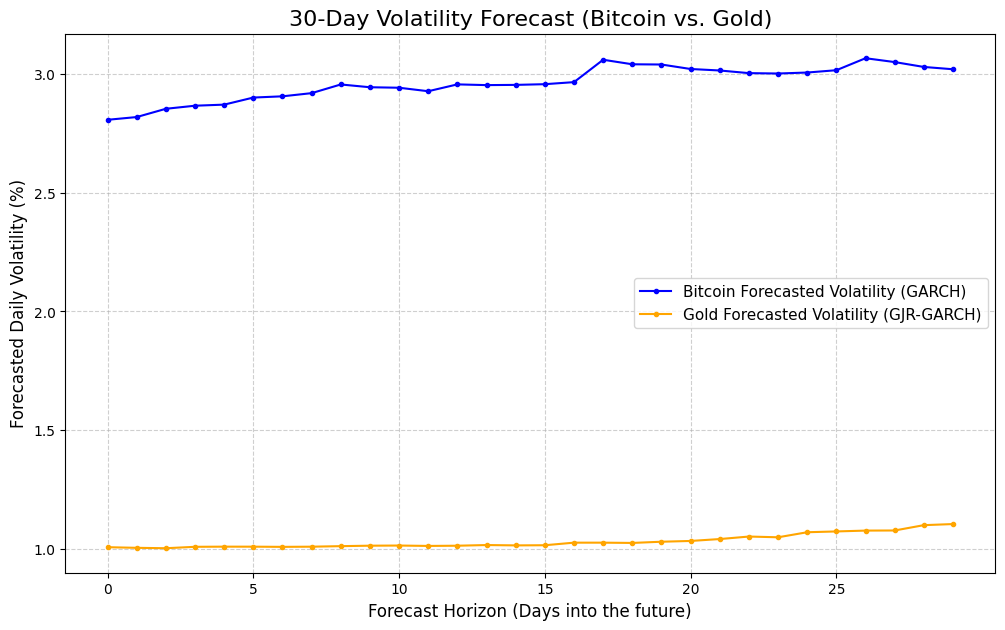

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. SET FORECAST HORIZON ---
horizon_len = len(test_data)

# --- 2. RUN BITCOIN FORECAST (GARCH) ---
# We use axis=0 to average across the 1000 simulations
fc_btc = res_garch_btc.forecast(horizon=horizon_len, method='simulation', simulations=1000)
btc_vol_forecast_series = fc_btc.variance.mean(axis=0)

# --- 3. RUN GOLD FORECAST (GJR-GARCH) ---
# We use axis=0 to average across the 1000 simulations
fc_gold_gjr = res_gjr_garch_gold.forecast(horizon=horizon_len, method='simulation', simulations=1000)
gold_vol_forecast_series = fc_gold_gjr.variance.mean(axis=0)

# --- 4. RESCALE AND CONVERT TO % VOLATILITY ---
# Rescale the variance from (return*100)^2 back to return^2
btc_variance_rescaled = btc_vol_forecast_series * (1/100)**2
gold_variance_rescaled = gold_vol_forecast_series * (1/100)**2

# Convert variance to % volatility (sqrt * 100)
btc_vol_pct = np.sqrt(btc_variance_rescaled) * 100
gold_vol_pct = np.sqrt(gold_variance_rescaled) * 100

# --- 5. CREATE THE FINAL 30-DAY PLOT ---
days_to_plot = 30

plt.figure(figsize=(12, 7))

# Plot the first 30 days
# We use .values to plot against a 0-29 index
plt.plot(btc_vol_pct.values[:days_to_plot], label='Bitcoin Forecasted Volatility (GARCH)', color='blue', marker='.')
plt.plot(gold_vol_pct.values[:days_to_plot], label='Gold Forecasted Volatility (GJR-GARCH)', color='orange', marker='.')

# Add Labels and Title
plt.title('30-Day Volatility Forecast (Bitcoin vs. Gold)', fontsize=16)
plt.xlabel('Forecast Horizon (Days into the future)', fontsize=12)
plt.ylabel('Forecasted Daily Volatility (%)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(0, days_to_plot, 5)) # Make the x-axis labels cleaner

plt.show()

In [37]:
# Set the number of days you want to display
days_to_display = 30

# --- Display the first 30 data points ---

print("--- Bitcoin Forecasted Daily Volatility (%) [First 30 Days] ---")
# We use .iloc[:days_to_display] to get the first 30
# We convert to a DataFrame for nicer printing
display(pd.DataFrame(btc_vol_pct.iloc[:days_to_display], columns=['Forecasted Volatility (%)']))

print("\n--- Gold Forecasted Daily Volatility (%) [First 30 Days] ---")
display(pd.DataFrame(gold_vol_pct.iloc[:days_to_display], columns=['Forecasted Volatility (%)']))

--- Bitcoin Forecasted Daily Volatility (%) [First 30 Days] ---


Forecasted Volatility (%)
h.001                   2.806796
h.002                   2.818328
h.003                   2.853127
h.004                   2.866046
h.005                   2.870611
h.006                   2.900381
h.007                   2.905603
h.008                   2.918944
h.009                   2.955477
h.010                   2.943793
h.011                   2.941716
h.012                   2.927031
h.013                   2.955835
h.014                   2.952746
h.015                   2.953715
h.016                   2.956663
h.017                   2.965305
h.018                   3.059489
h.019                   3.040413
h.020                   3.039448
h.021                   3.020570
h.022                   3.014296
h.023                   3.003207
h.024                   3.001557
h.025                   3.005734
h.026                   3.015471
h.027                   3.065929
h.028                   3.049711
h.029                   3.029199
h.030                   3.019482


--- Gold Forecasted Daily Volatility (%) [First 30 Days] ---


Forecasted Volatility (%)
h.001                   1.008002
h.002                   1.005375
h.003                   1.003701
h.004                   1.009662
h.005                   1.010267
h.006                   1.010208
h.007                   1.009401
h.008                   1.010158
h.009                   1.012423
h.010                   1.014353
h.011                   1.015000
h.012                   1.013345
h.013                   1.014256
h.014                   1.017073
h.015                   1.015608
h.016                   1.016270
h.017                   1.027104
h.018                   1.027093
h.019                   1.025945
h.020                   1.031053
h.021                   1.034295
h.022                   1.042319
h.023                   1.052844
h.024                   1.049733
h.025                   1.070979
h.026                   1.074354
h.027                   1.077880
h.028                   1.078365
h.029                   1.100784
h.030                   1.105384

# LSTM Bitcoin Preparing Data 70:30

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# --- 1. SET PARAMETERS ---

# Use the 'Bitcoin_logret' column from your 'merged' DataFrame
# Ensure 'merged' DataFrame is available
data_to_use = merged['Bitcoin_logret'].values.reshape(-1, 1)

# Set the "look-back" period
window_size = 30

# --- 2. SCALE THE DATA ---
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_to_use)

# --- 3. CREATE SEQUENCES (X, y) ---
X = []
y = []

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i, 0]) # The past 30 days
    y.append(scaled_data[i, 0])               # The 31st day

X, y = np.array(X), np.array(y)

# --- 4. SPLIT INTO TRAINING (70%) AND TESTING (30%) ---
train_size = int(len(X) * 0.7) # Changed to 70%
test_size = len(X) - train_size

X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# --- 5. RESHAPE FOR LSTM [samples, timesteps, features] ---
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# --- 6. PRINT SHAPES TO CONFIRM ---
print("--- Data Preparation Complete (70:30 Split) ---")
print(f"Window size (timesteps): {window_size}")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

--- Data Preparation Complete (70:30 Split) ---
Window size (timesteps): 30
X_train shape: (2279, 30, 1)
y_train shape: (2279,)
X_test shape: (978, 30, 1)
y_test shape: (978,)


#LSTM Bitcoin

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# --- 1. BUILD THE LSTM MODEL ---

model = Sequential()

# Layer 1: LSTM layer
# 50 units is a good starting point.
# return_sequences=True is needed because we're stacking another LSTM layer.
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2)) # Dropout helps prevent overfitting

# Layer 2: Another LSTM layer
model.add(LSTM(units=50, return_sequences=False)) # False because it's the last LSTM layer
model.add(Dropout(0.2))

# Layer 3: The Output Layer
# A Dense layer with 1 unit to predict our single output (the next day's return)
model.add(Dense(units=1))

# --- 2. COMPILE THE MODEL ---

# We tell the model how to learn.
# 'adam' is a popular and effective optimizer.
# 'mean_squared_error' is the best loss function for regression (predicting a number)
model.compile(optimizer='adam', loss='mean_squared_error')

# --- 3. TRAIN THE MODEL ("fit" the data) ---

# This is where the model "learns" from your training data.
# We'll train for 20 "epochs" (passes through the data)
# A batch_size of 32 is standard.
print("\n--- Starting Model Training ---")

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test), # We use the test set to see how it's doing
    verbose=1
)

print("--- Model Training Complete ---")

# --- 4. DISPLAY THE MODEL STRUCTURE ---
model.summary()


--- Starting Model Training ---
Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0845 - val_loss: 0.0015
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0070 - val_loss: 0.0016
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0067 - val_loss: 0.0017
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0063 - val_loss: 0.0018
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0065 - val_loss: 0.0016
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0055 - val_loss: 0.0017
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0063 - val_loss: 0.0015
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0060 - val_loss: 0.0016
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0060 - val_loss: 0.0019
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0056 - val_loss: 0.0016
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0053 - val_loss: 0.0015
Epoch 12/50
72/72 ━━━━━━━━━━━━

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Test RMSE: 0.028195


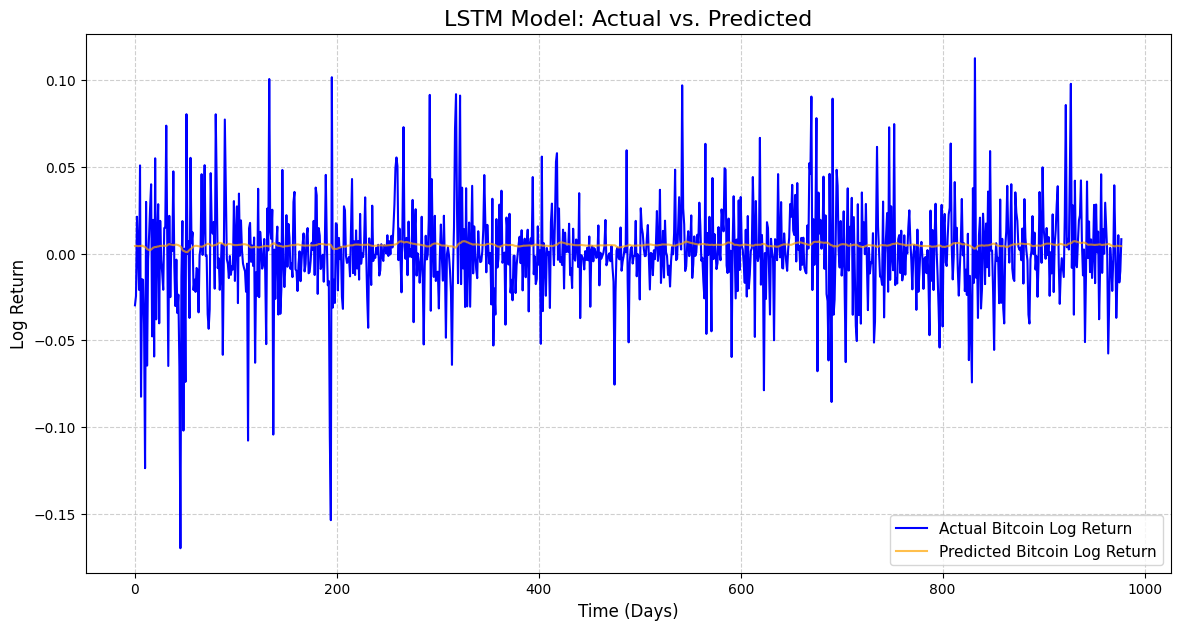

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# --- 1. MAKE PREDICTIONS ---
# Use the trained model to predict on the unseen test data
predicted_scaled = model.predict(X_test)

# --- 2. UN-SCALE THE DATA ---
# We must use the 'scaler' object from your data prep step
# to reverse the 0-to-1 scaling.

# Un-scale the predictions
predictions = scaler.inverse_transform(predicted_scaled)

# Un-scale the *actual* values so we can compare
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# --- 3. CALCULATE ERROR (RMSE) ---
# Root Mean Squared Error (RMSE) is a great metric
rmse = np.sqrt(mean_squared_error(actual_values, predictions))
print(f'Test RMSE: {rmse:.6f}')

# --- 4. PLOT THE RESULTS ---
# This is the most important visual.
plt.figure(figsize=(14, 7))
plt.plot(actual_values, color='blue', label='Actual Bitcoin Log Return')
plt.plot(predictions, color='orange', label='Predicted Bitcoin Log Return', alpha=0.7)
plt.title('LSTM Model: Actual vs. Predicted', fontsize=16)
plt.xlabel('Time (Days)', fontsize=12)
plt.ylabel('Log Return', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━

Forecasted Log Return
Day                       
1                 0.004274
2                 0.004342
3                 0.004442
4                 0.004555
5                 0.004669
6                 0.004779
7                 0.004878
8                 0.004966
9                 0.005042
10                0.005108
11                0.005164
12                0.005210
13                0.005249
14                0.005281
15                0.005307
16                0.005328
17                0.005345
18                0.005357
19                0.005367
20                0.005376
21                0.005382
22                0.005387
23                0.005391
24                0.005395
25                0.005398
26                0.005399
27                0.005400
28                0.005402
29                0.005402
30                0.005403

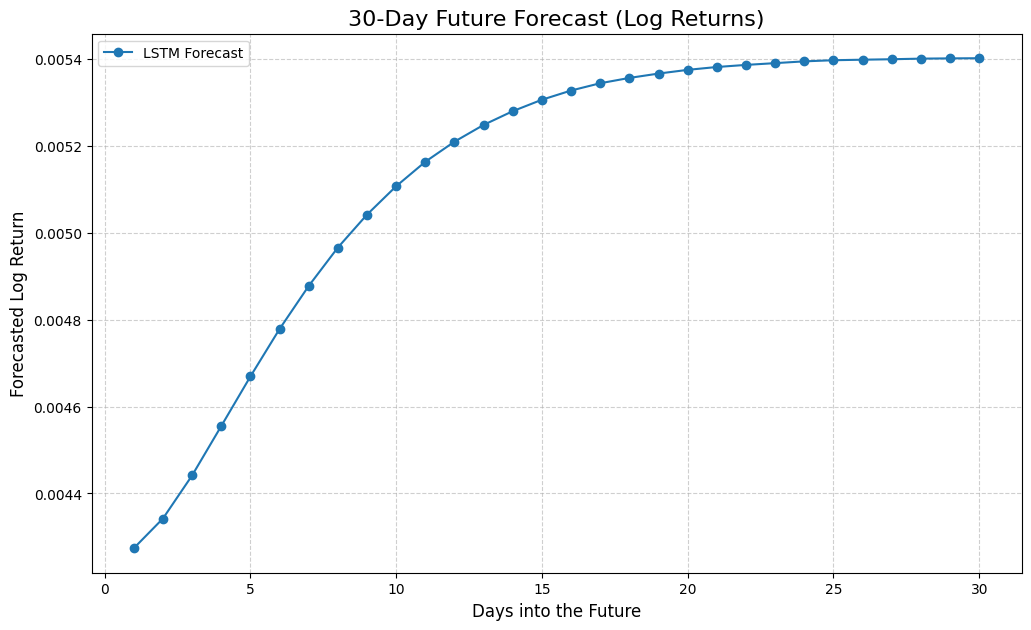

In [ ]:
# --- 1. SET FORECAST PARAMETERS ---
n_future_days = 30
window_size = 30 # This must be the same as your training 'window_size'

# --- 2. GET THE LAST WINDOW OF REAL DATA ---
# We take the last 30 days from your *full* dataset
last_real_window = scaled_data[-window_size:]

# Reshape it to be the input for the model
current_window = last_real_window.reshape(1, window_size, 1)

# --- 3. ITERATIVE FORECASTING (Predict 30 days) ---
# This loop will:
# 1. Predict day 1
# 2. Add day 1's prediction to the window
# 3. Use the new window to predict day 2
# ...and so on, for 30 days.

future_predictions_scaled = [] # Store the scaled predictions

for i in range(n_future_days):
    # 1. Predict the next day
    next_pred_scaled = model.predict(current_window)[0, 0]

    # 2. Store the prediction
    future_predictions_scaled.append(next_pred_scaled)

    # 3. Update the window for the next loop
    # Reshape the prediction to be added to the window
    next_pred_reshaped = np.array([[next_pred_scaled]])

    # Remove the *first* day from the window and add the *new prediction* to the end
    current_window = np.append(current_window[:, 1:, :], next_pred_reshaped.reshape(1, 1, 1), axis=1)

# --- 4. UN-SCALE THE FINAL FORECAST ---
# We now have 30 days of scaled predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

# --- 5. DISPLAY THE 30-DAY DATA (YOUR REQUEST) ---
print(f"--- LSTM 30-Day Future Forecast (Log Returns) ---")

# Create a nice DataFrame to display
forecast_df = pd.DataFrame(future_predictions,
                           columns=['Forecasted Log Return'],
                           index=np.arange(1, n_future_days + 1))
forecast_df.index.name = 'Day'
display(forecast_df)

# --- 6. PLOT THE 30-DAY FORECAST ---
plt.figure(figsize=(12, 7))
plt.plot(forecast_df.index, forecast_df['Forecasted Log Return'], marker='o', label='LSTM Forecast')
plt.title('30-Day Future Forecast (Log Returns)', fontsize=16)
plt.xlabel('Days into the Future', fontsize=12)
plt.ylabel('Forecasted Log Return', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# forecast with raw data bitcoin LSTM

--- Data Shapes (70:30 Split) ---
X_train: (2279, 30, 1)
X_test:  (978, 30, 1)

--- Starting Model Training ---
Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0160 - val_loss: 0.0010
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 9.4460e-04 - val_loss: 0.0015
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 8.8465e-04 - val_loss: 0.0016
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 8.6652e-04 - val_loss: 0.0016
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 7.5412e-04 - val_loss: 0.0012
--- Model Training Complete ---

=== Performance Metrics (Train/Test) ===


Set      MAE          MSE     RMSE  MAPE(%)
0  Train  1176.70   4821291.59  2195.74    13.71
1   Test  2234.94  11246892.86  3353.64     5.42

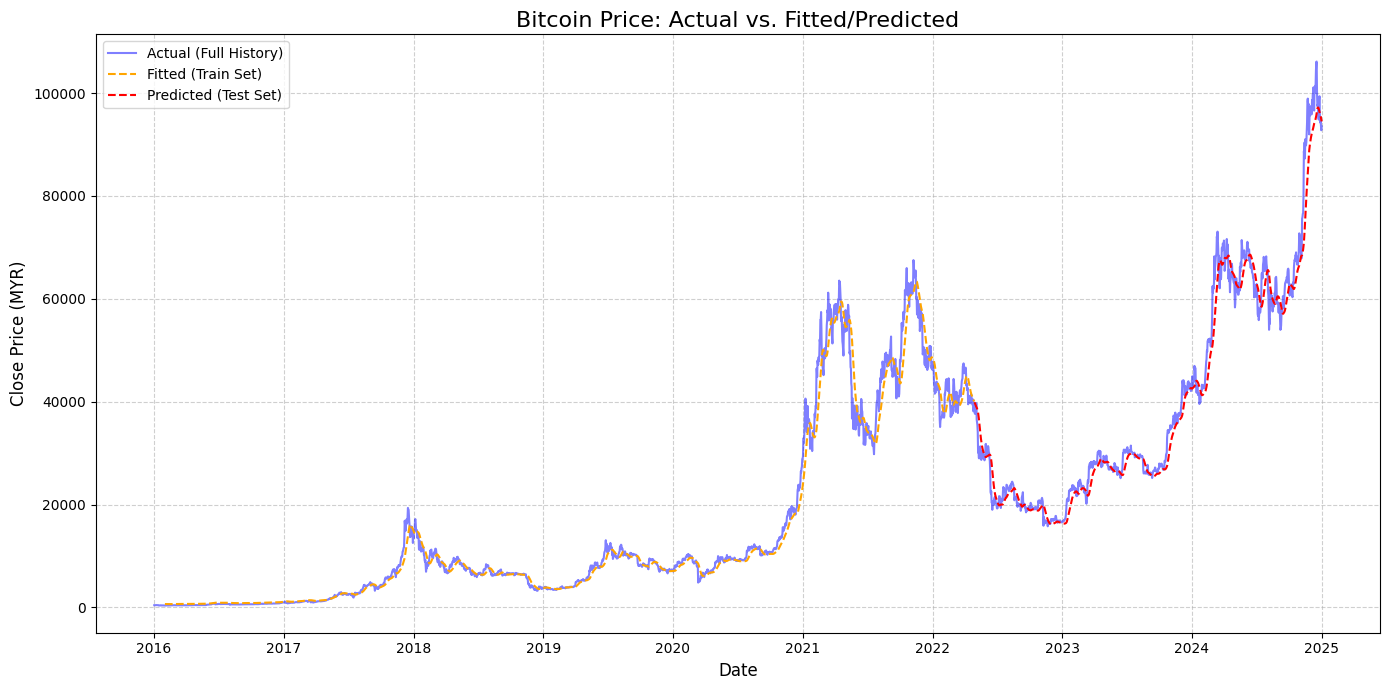

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# --- 1. SET UP DATA & PARAMETERS ---
df = merged.copy()
close_col = 'Bitcoin' # <-- Changed to use the 'Bitcoin' price column
date_col = 'Date'
window_size = 30 # This is the 'adaptive_lookback'

# Ensure date column is datetime
df[date_col] = pd.to_datetime(df[date_col])

# --- 2. SCALING & DATA PREPARATION ---
data_to_use = df[close_col].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_to_use)

# --- 3. CREATE SEQUENCES ---
def make_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = make_sequences(scaled_data, window_size)

# --- 4. TRAIN / TEST SPLIT (70% Train, 30% Test) ---
# Your requested 70:30 split
train_split_idx = int(len(X) * 0.70)

X_tr, y_tr = X[:train_split_idx], y[:train_split_idx]
X_test, y_test = X[train_split_idx:], y[train_split_idx:]

# --- 5. RESHAPE FOR LSTM [samples, timesteps, features] ---
X_tr = np.reshape(X_tr, (X_tr.shape[0], X_tr.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print("--- Data Shapes (70:30 Split) ---")
print(f"X_train: {X_tr.shape}")
print(f"X_test:  {X_test.shape}")

# --- 6. BUILD & TRAIN MODEL (from your senior's code) ---
tf.random.set_seed(42)
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")

# Use EarlyStopping, monitoring the test set loss
es = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

print("\n--- Starting Model Training ---")
history = model.fit(
    X_tr, y_tr,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test), # Use test set for validation with 70:30 split
    callbacks=[es],
    verbose=1
)
print("--- Model Training Complete ---")

# --- 7. EVALUATION & METRICS ---
def inverse_and_metrics(y_true_scaled, y_pred_scaled, scaler_obj):
    y_true = scaler_obj.inverse_transform(y_true_scaled.reshape(-1, 1)).flatten()
    y_pred = scaler_obj.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100
    return y_true, y_pred, mae, mse, rmse, mape

# Get predictions (scaled)
y_pred_tr_skala = model.predict(X_tr, verbose=0).flatten()
y_pred_test_skala = model.predict(X_test, verbose=0).flatten()

# Get metrics (un-scaled)
y_true_tr, y_pred_tr, mae_tr, mse_tr, rmse_tr, mape_tr = inverse_and_metrics(y_tr, y_pred_tr_skala, scaler)
y_true_test, y_pred_test, mae_te, mse_te, rmse_te, mape_te = inverse_and_metrics(y_test, y_pred_test_skala, scaler)

# Build metrics table (Train/Test only)
metrics_df = pd.DataFrame({
    "Set": ["Train", "Test"],
    "MAE": [mae_tr, mae_te],
    "MSE": [mse_tr, mse_te],
    "RMSE": [rmse_tr, rmse_te],
    "MAPE(%)": [mape_tr, mape_te]
})

print("\n=== Performance Metrics (Train/Test) ===")
display(metrics_df.round(2))

# --- 8. PLOTTING (Full History Plot) ---

# Get the correct dates for each set
date_index = df[date_col].iloc[window_size:]
train_dates = date_index.iloc[:train_split_idx]
test_dates = date_index.iloc[train_split_idx:]

plt.figure(figsize=(14, 7))

# Plot 1: Full History
plt.plot(df[date_col], df[close_col], label="Actual (Full History)", color='blue', alpha=0.5)

# Plot 2: Fitted (Train Set)
plt.plot(train_dates, y_pred_tr, label="Fitted (Train Set)", color='orange', linestyle='--')

# Plot 3: Predicted (Test Set)
plt.plot(test_dates, y_pred_test, label="Predicted (Test Set)", color='red', linestyle='--')

plt.title(f"{close_col} Price: Actual vs. Fitted/Predicted", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price (MYR)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


--- Data Shapes (Multivariate 70:30 Split) ---
X_train: (2279, 30, 2)
X_test:  (978, 30, 2)

--- Starting Multivariate Model Training ---
Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0085 - val_loss: 0.0022
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 8.8229e-04 - val_loss: 0.0011
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 8.4237e-04 - val_loss: 0.0012
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 8.1818e-04 - val_loss: 0.0010
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 7.2020e-04 - val_loss: 0.0017
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 6.6366e-04 - val_loss: 9.7941e-04
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 7.8432e-04 - val_loss: 0.0012
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 7.0468e-

Set      MAE         MSE     RMSE  MAPE(%)
0  Train  1096.53  3757532.89  1938.44     9.21
1   Test  2175.83  7703408.72  2775.50     6.33

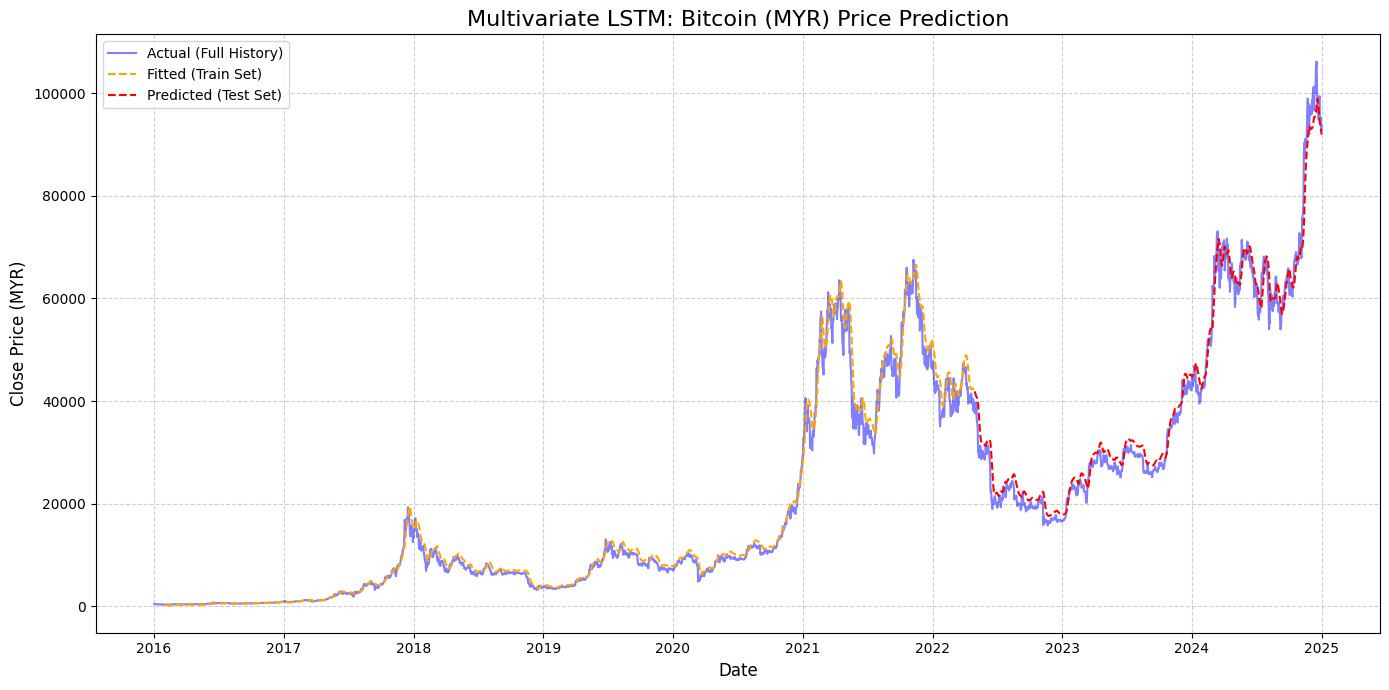

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# --- 1. SET UP FOR MULTIVARIATE LSTM ---
df = merged.copy()
feature_cols = ['Bitcoin', 'Gold']
target_col = 'Bitcoin'
date_col = 'Date'
window_size = 30

# --- 2. SCALING ---
data_to_use = df[feature_cols].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_to_use)

# --- 3. CREATE SEQUENCES (Multivariate) ---
def make_sequences_multi(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, :]) # All features for the window
        y.append(data[i, 0])               # Only the 1st col (Bitcoin) as target
    return np.array(X), np.array(y)

X, y = make_sequences_multi(scaled_data, window_size)

# --- 4. TRAIN / TEST SPLIT (70% Train, 30% Test) ---
train_split_idx = int(len(X) * 0.70)
X_tr, y_tr = X[:train_split_idx], y[:train_split_idx]
X_test, y_test = X[train_split_idx:], y[train_split_idx:]

# --- 5. RESHAPE FOR LSTM [samples, timesteps, features] ---
n_features = len(feature_cols)
# X_tr and X_test are already (samples, 30, 2)
print("\n--- Data Shapes (Multivariate 70:30 Split) ---")
print(f"X_train: {X_tr.shape}")
print(f"X_test:  {X_test.shape}")

# --- 7. BUILD & TRAIN MODEL ---
tf.random.set_seed(42)
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(window_size, n_features)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1) # Still 1 output (predicting Bitcoin)
])
model.compile(optimizer="adam", loss="mse")
es = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

print("\n--- Starting Multivariate Model Training ---")
history = model.fit(
    X_tr, y_tr,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[es],
    verbose=1
)
print("--- Model Training Complete ---")

# --- 8. EVALUATION & METRICS (Multivariate) ---
def inverse_and_metrics_multi(y_true_scaled, y_pred_scaled, scaler_obj):
    n_features = scaler_obj.n_features_in_

    pred_combined = np.zeros((len(y_pred_scaled), n_features))
    pred_combined[:, 0] = y_pred_scaled.flatten()
    y_pred = scaler_obj.inverse_transform(pred_combined)[:, 0]

    true_combined = np.zeros((len(y_true_scaled), n_features))
    true_combined[:, 0] = y_true_scaled.flatten()
    y_true = scaler_obj.inverse_transform(true_combined)[:, 0]

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100
    return y_true, y_pred, mae, mse, rmse, mape

y_pred_tr_skala = model.predict(X_tr, verbose=0).flatten()
y_pred_test_skala = model.predict(X_test, verbose=0).flatten()

y_true_tr, y_pred_tr, mae_tr, mse_tr, rmse_tr, mape_tr = inverse_and_metrics_multi(y_tr, y_pred_tr_skala, scaler)
y_true_test, y_pred_test, mae_te, mse_te, rmse_te, mape_te = inverse_and_metrics_multi(y_test, y_pred_test_skala, scaler)

metrics_df = pd.DataFrame({
    "Set": ["Train", "Test"],
    "MAE": [mae_tr, mae_te],
    "MSE": [mse_tr, mse_te],
    "RMSE": [rmse_tr, rmse_te],
    "MAPE(%)": [mape_tr, mape_te]
})

print("\n=== Ringkasan Metrik (Multivariate Train/Test) ===")
display(metrics_df.round(2))

# --- 9. PLOTTING (Full History Plot) ---
date_index = df[date_col].iloc[window_size:]
train_dates = date_index.iloc[:train_split_idx]
test_dates = date_index.iloc[train_split_idx:]

plt.figure(figsize=(14, 7))
plt.plot(df[date_col], df[target_col], label="Actual (Full History)", color='blue', alpha=0.5)
plt.plot(train_dates, y_pred_tr, label="Fitted (Train Set)", color='orange', linestyle='--')
plt.plot(test_dates, y_pred_test, label="Predicted (Test Set)", color='red', linestyle='--')
plt.title(f"Multivariate LSTM: Bitcoin (MYR) Price Prediction", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price (MYR)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


--- Data Shapes (Multivariate Gold 70:30 Split) ---
X_train: (2279, 30, 2)
X_test:  (978, 30, 2)

--- Starting Multivariate Model Training (Predicting Gold) ---
Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0153 - val_loss: 0.0013
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 9.7889e-04 - val_loss: 0.0014
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 9.2007e-04 - val_loss: 6.9032e-04
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 9.6301e-04 - val_loss: 0.0024
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 7.4693e-04 - val_loss: 0.0031
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 8.1075e-04 - val_loss: 0.0011
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 6.6668e-04 - val_loss: 7.2420e-04
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 6.2259e-04 - val_loss: 0.0016
--- Model Training Complete ---

===

Set     MAE       MSE    RMSE  MAPE(%)
0  Train   99.76  16646.39  129.02     1.60
1   Test  146.91  40353.44  200.88     1.51

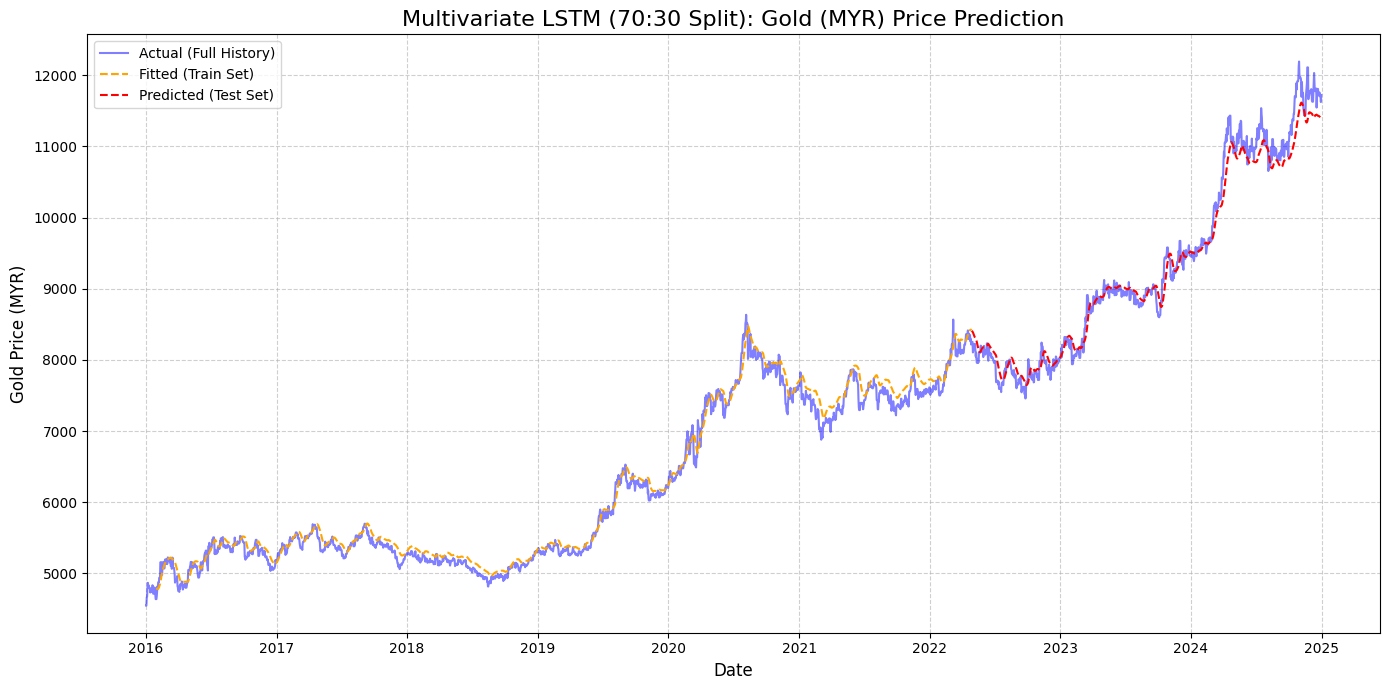

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
# --- 3. SET UP FOR MULTIVARIATE LSTM (Predicting Gold) ---
df_gold_70 = merged.copy()
feature_cols_gold_70 = ['Bitcoin', 'Gold'] # <-- Inputs
target_col_gold_70 = 'Gold'               # <-- Output
date_col_gold_70 = 'Date'
window_size_gold_70 = 30

# --- 4. SCALING ---
data_to_use_gold_70 = df_gold_70[feature_cols_gold_70].values
scaler_gold_70 = MinMaxScaler(feature_range=(0, 1)) # New scaler
scaled_data_gold_70 = scaler_gold_70.fit_transform(data_to_use_gold_70)

# --- 5. CREATE SEQUENCES (Multivariate for Gold) ---
def make_sequences_multi_gold_70(data, window_size): # New function
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, :]) # All features (BTC & Gold)
        y.append(data[i, 1])               # ⭐ CHANGE: Target is col 1 (Gold)
    return np.array(X), np.array(y)

X_gold_70, y_gold_70 = make_sequences_multi_gold_70(scaled_data_gold_70, window_size_gold_70)

# --- 6. TRAIN / TEST SPLIT (70% Train, 30% Test) ---
train_split_idx_gold_70 = int(len(X_gold_70) * 0.70) # Kept 70:30
X_tr_gold_70, y_tr_gold_70 = X_gold_70[:train_split_idx_gold_70], y_gold_70[:train_split_idx_gold_70]
X_test_gold_70, y_test_gold_70 = X_gold_70[train_split_idx_gold_70:], y_gold_70[train_split_idx_gold_70:]

# --- 7. RESHAPE FOR LSTM [samples, timesteps, features] ---
n_features_gold_70 = len(feature_cols_gold_70)
print("\n--- Data Shapes (Multivariate Gold 70:30 Split) ---")
print(f"X_train: {X_tr_gold_70.shape}")
print(f"X_test:  {X_test_gold_70.shape}")

# --- 8. BUILD & TRAIN MODEL ---
tf.random.set_seed(42)
model_gold_70 = Sequential([ # New model
    LSTM(64, return_sequences=True, input_shape=(window_size_gold_70, n_features_gold_70)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])
model_gold_70.compile(optimizer="adam", loss="mse")
es_gold_70 = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

print("\n--- Starting Multivariate Model Training (Predicting Gold) ---")
history_gold_70 = model_gold_70.fit(
    X_tr_gold_70, y_tr_gold_70,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_gold_70, y_test_gold_70),
    callbacks=[es_gold_70],
    verbose=1
)
print("--- Model Training Complete ---")

# --- 9. EVALUATION & METRICS (Multivariate for Gold) ---
def inverse_and_metrics_multi_gold_70(y_true_scaled, y_pred_scaled, scaler_obj_gold_70): # New function
    n_features = scaler_obj_gold_70.n_features_in_

    # ⭐ CHANGE: Put prediction in col 1 (Gold)
    pred_combined = np.zeros((len(y_pred_scaled), n_features))
    pred_combined[:, 1] = y_pred_scaled.flatten()
    y_pred = scaler_obj_gold_70.inverse_transform(pred_combined)[:, 1] # Get col 1

    # ⭐ CHANGE: Put actual in col 1 (Gold)
    true_combined = np.zeros((len(y_true_scaled), n_features))
    true_combined[:, 1] = y_true_scaled.flatten()
    y_true = scaler_obj_gold_70.inverse_transform(true_combined)[:, 1] # Get col 1

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100
    return y_true, y_pred, mae, mse, rmse, mape

y_pred_tr_skala_gold_70 = model_gold_70.predict(X_tr_gold_70, verbose=0).flatten()
y_pred_test_skala_gold_70 = model_gold_70.predict(X_test_gold_70, verbose=0).flatten()

y_true_tr_gold_70, y_pred_tr_gold_70, mae_tr_gold_70, mse_tr_gold_70, rmse_tr_gold_70, mape_tr_gold_70 = inverse_and_metrics_multi_gold_70(y_tr_gold_70, y_pred_tr_skala_gold_70, scaler_gold_70)
y_true_test_gold_70, y_pred_test_gold_70, mae_te_gold_70, mse_te_gold_70, rmse_te_gold_70, mape_te_gold_70 = inverse_and_metrics_multi_gold_70(y_test_gold_70, y_pred_test_skala_gold_70, scaler_gold_70)

metrics_df_gold_70 = pd.DataFrame({
    "Set": ["Train", "Test"],
    "MAE": [mae_tr_gold_70, mae_te_gold_70],
    "MSE": [mse_tr_gold_70, mse_te_gold_70],
    "RMSE": [rmse_tr_gold_70, rmse_te_gold_70],
    "MAPE(%)": [mape_tr_gold_70, mape_te_gold_70]
})

print("\n=== Ringkasan Metrik (Multivariate Gold 70:30 Split) ===")
display(metrics_df_gold_70.round(2))

# --- 10. PLOTTING (Full History Plot) ---
date_index_gold_70 = df_gold_70[date_col_gold_70].iloc[window_size_gold_70:]
train_dates_gold_70 = date_index_gold_70.iloc[:train_split_idx_gold_70]
test_dates_gold_70 = date_index_gold_70.iloc[train_split_idx_gold_70:]

plt.figure(figsize=(14, 7))
# ⭐ CHANGE: Plot the 'Gold' column as the actual
plt.plot(df_gold_70[date_col_gold_70], df_gold_70[target_col_gold_70], label="Actual (Full History)", color='blue', alpha=0.5)
plt.plot(train_dates_gold_70, y_pred_tr_gold_70, label="Fitted (Train Set)", color='orange', linestyle='--')
plt.plot(test_dates_gold_70, y_pred_test_gold_70, label="Predicted (Test Set)", color='red', linestyle='--')

# ⭐ CHANGE: Updated titles
plt.title(f"Multivariate LSTM (70:30 Split): Gold (MYR) Price Prediction", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Gold Price (MYR)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Split 75:25

In [ ]:
train75_size = int(len(merged) * 0.75)
train75_data = merged[['Date', 'Bitcoin_logret', 'Gold_logret']].iloc[0:train75_size]
test75_data = merged[['Date', 'Bitcoin_logret', 'Gold_logret']].iloc[train75_size:len(merged)]

print("Training data size:", len(train75_data))
print("Testing data size:", len(test75_data))

Training data size: 2465
Testing data size: 822


In [ ]:
# Fit auto_arima model on Bitcoin log returns
model75_bitcoin = auto_arima(train75_data['Bitcoin_logret'], seasonal=False, suppress_warnings=True)
print("Bitcoin Auto ARIMA Model Summary:")
print(model75_bitcoin.summary())

# Fit auto_arima model on Gold log returns
model75_gold = auto_arima(train75_data['Gold_logret'], seasonal=False, suppress_warnings=True)
print("\nGold Auto ARIMA Model Summary:")
print(model75_gold.summary())

Bitcoin Auto ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2465
Model:               SARIMAX(2, 0, 0)   Log Likelihood                4442.885
Date:                Wed, 05 Nov 2025   AIC                          -8877.769
Time:                        11:28:07   BIC                          -8854.530
Sample:                             0   HQIC                         -8869.326
                               - 2465                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0016      0.001      1.873      0.061   -7.21e-05       0.003
ar.L1         -0.0459      0.014     -3.294      0.001      -0.073      -0.019
ar.L2          0.0

In [ ]:
# 1. Get residuals from your auto_arima models (which are already fitted)
btc75_residuals = model75_bitcoin.resid()
gold75_residuals = model75_gold.resid()

# 2. Rescale the residuals to fix the DataScaleWarning
# (This is still a good practice)
btc75_resid_scaled = btc75_residuals
gold75_resid_scaled = gold75_residuals

# 3. Fit GARCH(1,1) on the SCALED RESIDUALS
# We use mean='Zero' because the residuals should already have a mean of zero.
garch75_btc = arch_model(btc75_resid_scaled,
mean='Zero',
vol='Garch', p=1, q=1,
dist='Normal')

res75_garch_btc = garch75_btc.fit(disp='off')
print("Bitcoin GARCH(1,1) on ARMA(2,2) Residuals:")
print(res75_garch_btc.summary())

# 4. Fit GARCH(1,1) on the SCALED RESIDUALS for Gold
garch75_gold = arch_model(gold75_resid_scaled,
mean='Zero',
vol='Garch', p=1, q=1,
dist='Normal')

res75_garch_gold = garch75_gold.fit(disp='off')
print("\nGold GARCH(1,1) on MA(1) Residuals:")
print(res75_garch_gold.summary())

Bitcoin GARCH(1,1) on ARMA(2,2) Residuals:
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4584.82
Distribution:                  Normal   AIC:                          -9163.64
Method:            Maximum Likelihood   BIC:                          -9146.21
                                        No. Observations:                 2465
Date:                Wed, Nov 05 2025   Df Residuals:                     2465
Time:                        11:28:37   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1

In [ ]:
# 1. Get residuals from your auto_arima models (which are already fitted)
btc75_residuals = model75_bitcoin.resid()
gold75_residuals = model75_gold.resid()

# 2. Rescale the residuals to fix the DataScaleWarning
# (This is still a good practice)
btc75_resid_scaled = btc75_residuals * 100
gold75_resid_scaled = gold75_residuals * 100

# 3. Fit GARCH(1,1) on the SCALED RESIDUALS
# We use mean='Zero' because the residuals should already have a mean of zero.
garch75_btc = arch_model(btc75_resid_scaled,
mean='Zero',
vol='Garch', p=1, q=1,
dist='Normal')

res75_garch_btc = garch75_btc.fit(disp='off')
print("Bitcoin GARCH(1,1) on ARMA(2,2) Residuals:")
print(res75_garch_btc.summary())

# 4. Fit GARCH(1,1) on the SCALED RESIDUALS for Gold
garch75_gold = arch_model(gold75_resid_scaled,
mean='Zero',
vol='Garch', p=1, q=1,
dist='Normal')

res75_garch_gold = garch75_gold.fit(disp='off')
print("\nGold GARCH(1,1) on MA(1) Residuals:")
print(res75_garch_gold.summary())

Bitcoin GARCH(1,1) on ARMA(2,2) Residuals:
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6751.04
Distribution:                  Normal   AIC:                           13508.1
Method:            Maximum Likelihood   BIC:                           13525.5
                                        No. Observations:                 2465
Date:                Wed, Nov 05 2025   Df Residuals:                     2465
Time:                        11:28:55   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.8035

In [ ]:
# 1. Get residuals from your auto_arima models (which are already fitted)
btc75_residuals = model75_bitcoin.resid()
gold75_residuals = model75_gold.resid()

# 2. Rescale the residuals to fix the DataScaleWarning
btc75_resid_scaled = btc75_residuals * 100
gold75_resid_scaled = gold75_residuals * 100

# 3. Fit GARCH(1,1) on the SCALED RESIDUALS
garch75_btc = arch_model(btc75_resid_scaled,
mean='Zero',
vol='Garch', p=1, q=1,
dist='t')

res75_garch_btc = garch75_btc.fit(disp='off')
print("Bitcoin GARCH(1,1) on ARMA(2,2) Residuals (t-distribution):")
print(res75_garch_btc.summary())

# 4. Fit GARCH(1,1) on the SCALED RESIDUALS for Gold
garch75_gold = arch_model(gold75_resid_scaled,
mean='Zero',
vol='Garch', p=1, q=1,
dist='t')

res75_garch_gold = garch75_gold.fit(disp='off')
print("\nGold GARCH(1,1) on MA(1) Residuals (t-distribution):")
print(res75_garch_gold.summary())

# 5. Fit EGARCH(1,1) on the SCALED RESIDUALS for Gold
egarch_gold1 = arch_model(gold75_resid_scaled,
mean='Zero',
vol='EGARCH', p=1, q=1,
dist='t')

res75_egarch_gold1 = egarch_gold1.fit(disp='off')
print("\nGold EGARCH(1,1) on MA(1) Residuals (t-distribution):")
print(res75_egarch_gold1.summary())

# 5. Fit EGARCH(2,2) on the SCALED RESIDUALS for Gold
egarch_gold2 = arch_model(gold75_resid_scaled,
mean='Zero',
vol='EGARCH', p=2, q=2,
dist='t')

res75_egarch_gold2 = egarch_gold2.fit(disp='off')
print("\nGold EGARCH(2,2) on MA(1) Residuals (t-distribution):")
print(res75_egarch_gold2.summary())

# 6. Fit GJR-GARCH(1,1) on the SCALED RESIDUALS for Gold
gjr75_garch_gold = arch_model(gold75_resid_scaled,
mean='Zero',
vol='GARCH', p=1, o=1, q=1, # o=1 for GJR-GARCH
dist='t')

res75_gjr_garch_gold = gjr75_garch_gold.fit(disp='off')
print("\nGold GJR-GARCH(1,1) on MA(1) Residuals (t-distribution):")
print(res75_gjr_garch_gold.summary())

Bitcoin GARCH(1,1) on ARMA(2,2) Residuals (t-distribution):
                          Zero Mean - GARCH Model Results                           
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -6405.26
Distribution:      Standardized Student's t   AIC:                           12818.5
Method:                  Maximum Likelihood   BIC:                           12841.7
                                              No. Observations:                 2465
Date:                      Wed, Nov 05 2025   Df Residuals:                     2465
Time:                              12:39:19   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
-----------------------

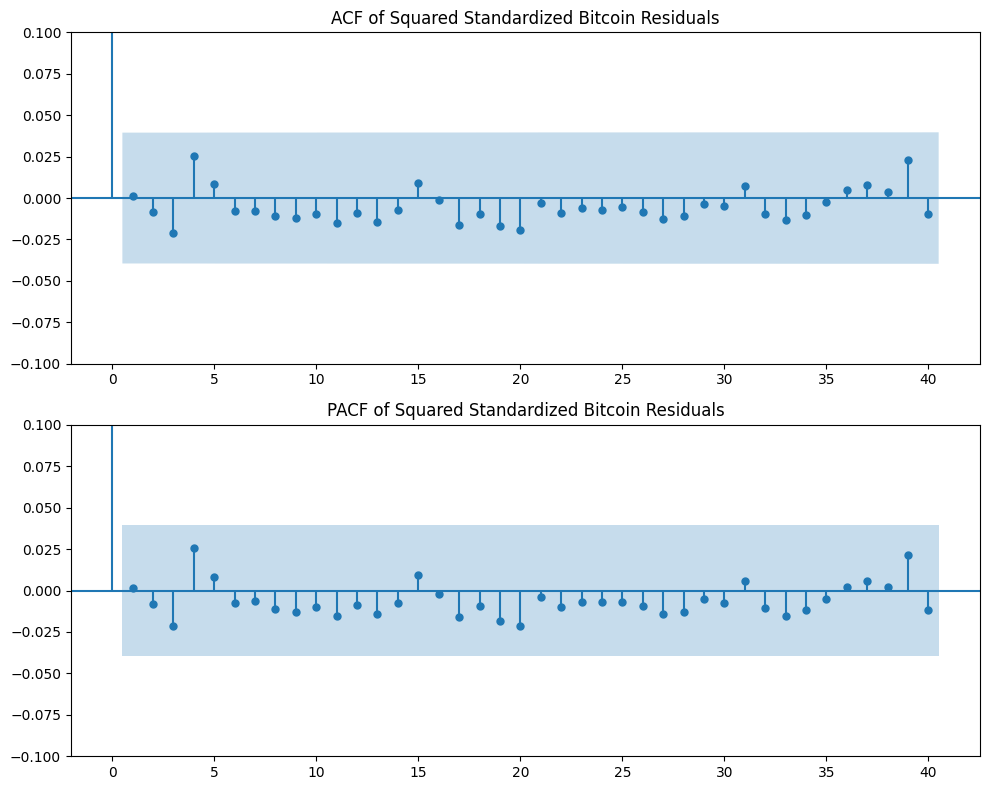

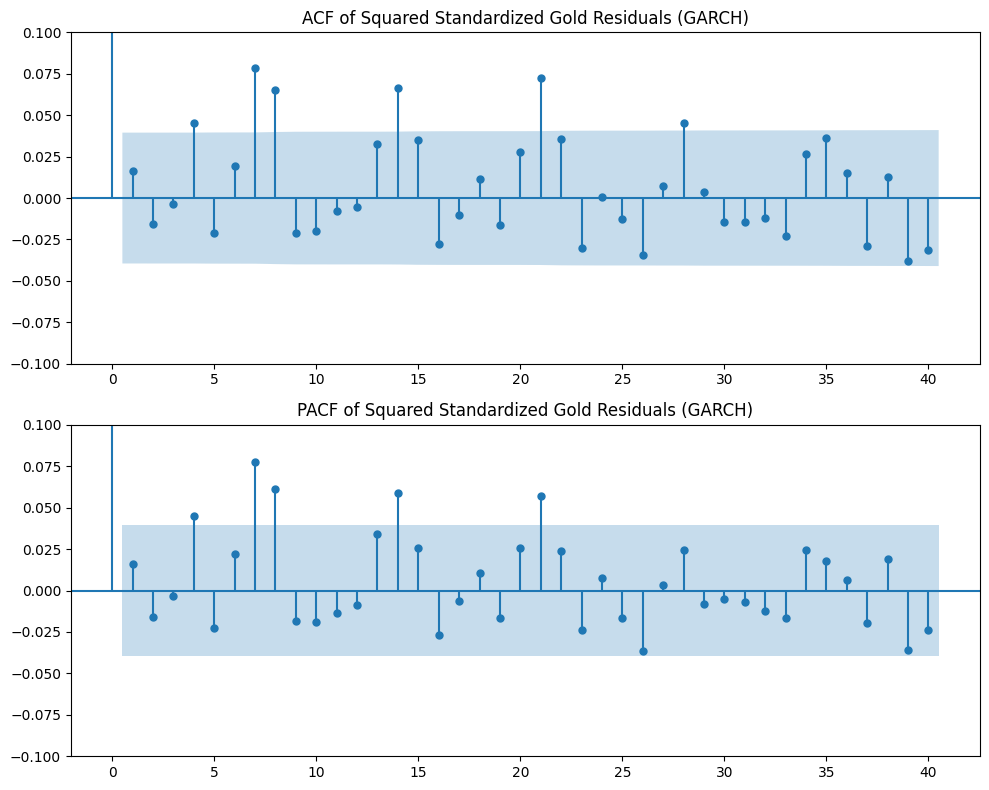

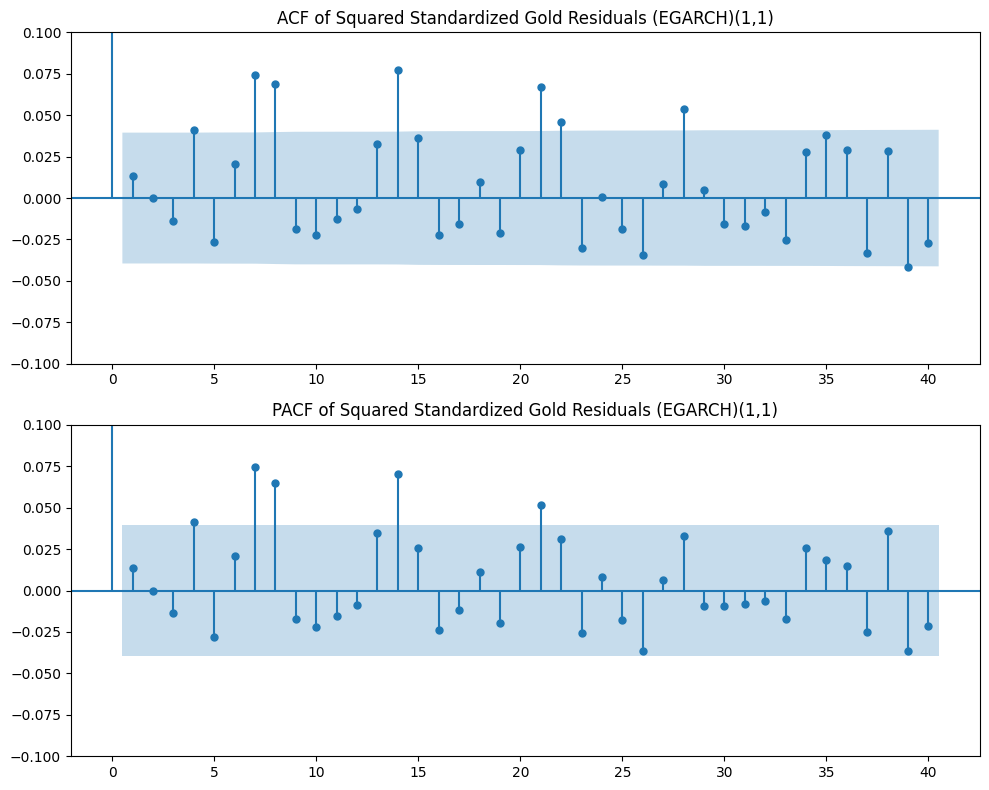

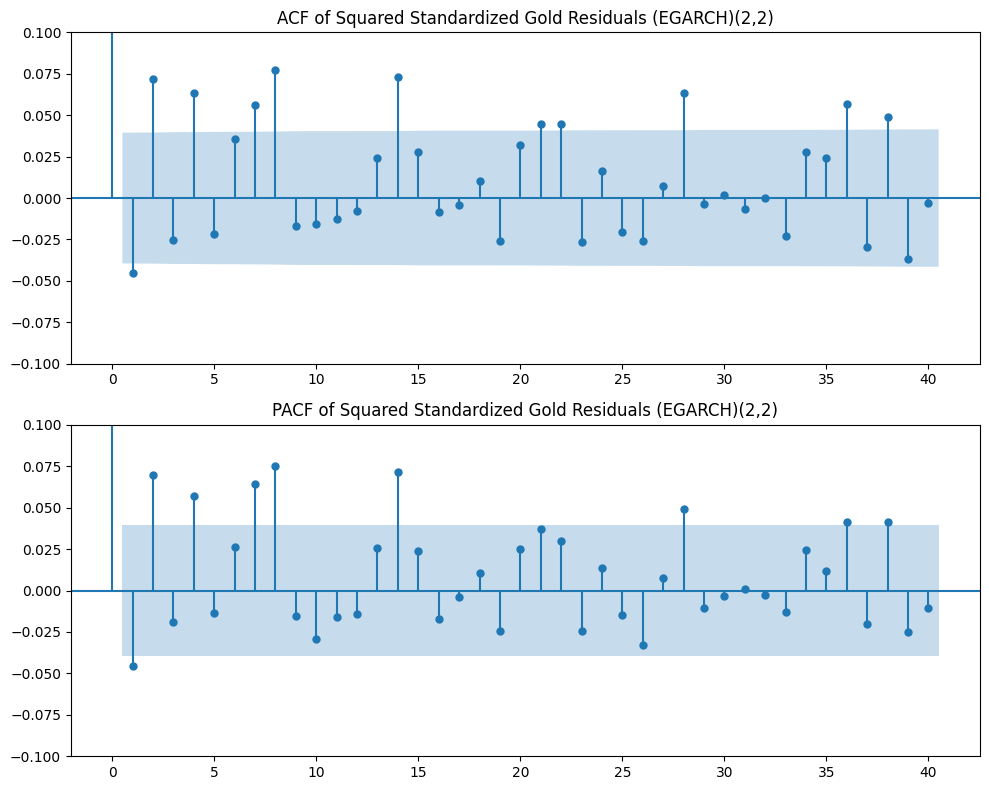

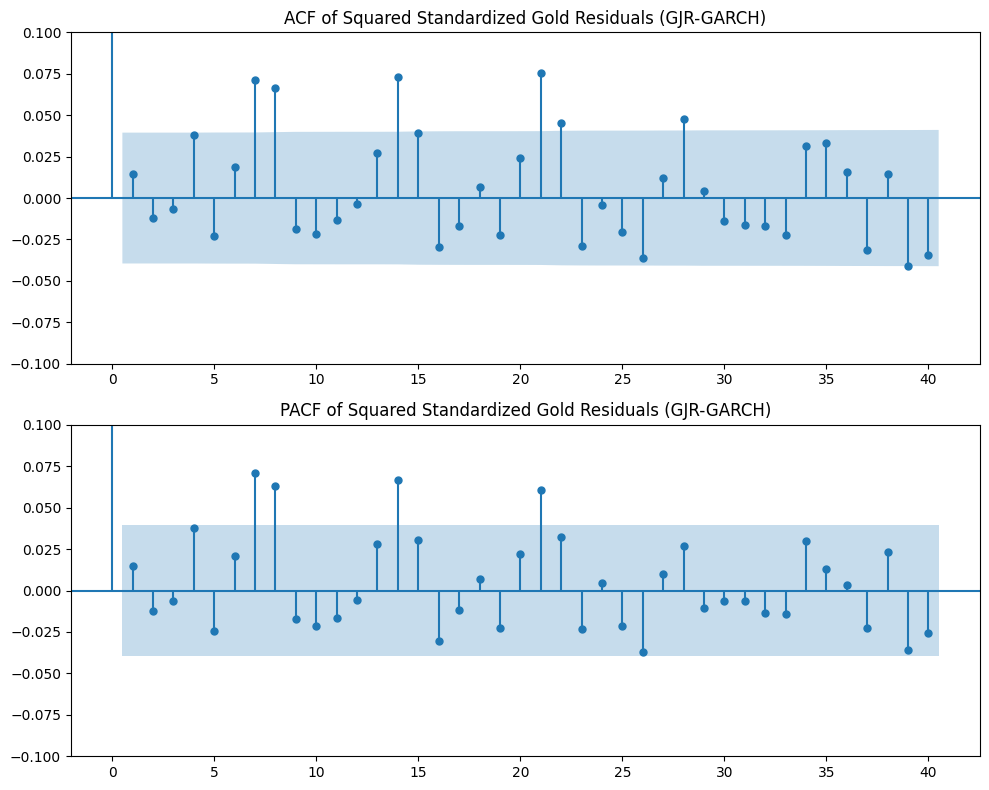

In [ ]:
# Get the standardized residuals
btc75_std_resid = res75_garch_btc.std_resid
gold75_std_resid = res75_garch_gold.std_resid

# Square the standardized residuals
btc75_std_resid_sq = btc75_std_resid**2
gold75_std_resid_sq = gold75_std_resid**2

# Plot ACF and PACF for squared standardized Bitcoin residuals
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(btc75_std_resid_sq.dropna(), ax=axes[0], lags=40)
plot_pacf(btc75_std_resid_sq.dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Squared Standardized Bitcoin Residuals')
axes[1].set_title('PACF of Squared Standardized Bitcoin Residuals')
axes[0].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
axes[1].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
plt.tight_layout()
plt.show()

# Plot ACF and PACF for squared standardized Gold residuals (GARCH)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(gold75_std_resid_sq.dropna(), ax=axes[0], lags=40)
plot_pacf(gold75_std_resid_sq.dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Squared Standardized Gold Residuals (GARCH)')
axes[1].set_title('PACF of Squared Standardized Gold Residuals (GARCH)')
axes[0].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
axes[1].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
plt.tight_layout()
plt.show()

#1 - for 1,1 GARCH and 2- for 2,2 GARCH

# Get standardized residuals for EGARCH and GJR-GARCH Gold models
gold75_std_resid_egarch1 = res75_egarch_gold1.std_resid
gold75_std_resid_egarch2 = res75_egarch_gold2.std_resid
gold75_std_resid_gjr_garch = res75_gjr_garch_gold.std_resid

# Square the standardized residuals for EGARCH and GJR-GARCH Gold models
gold75_std_resid_sq_egarch1 = gold75_std_resid_egarch1**2
gold75_std_resid_sq_egarch2 = gold75_std_resid_egarch2**2
gold75_std_resid_sq_gjr_garch = gold75_std_resid_gjr_garch**2

# Plot ACF and PACF for squared standardized Gold residuals (EGARCH)(1,1)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(gold75_std_resid_sq_egarch1.dropna(), ax=axes[0], lags=40)
plot_pacf(gold75_std_resid_sq_egarch1.dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Squared Standardized Gold Residuals (EGARCH)(1,1)')
axes[1].set_title('PACF of Squared Standardized Gold Residuals (EGARCH)(1,1)')
axes[0].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
axes[1].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
plt.tight_layout()
plt.show()

# Plot ACF and PACF for squared standardized Gold residuals (EGARCH)(2,2)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(gold75_std_resid_sq_egarch2.dropna(), ax=axes[0], lags=40)
plot_pacf(gold75_std_resid_sq_egarch2.dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Squared Standardized Gold Residuals (EGARCH)(2,2)')
axes[1].set_title('PACF of Squared Standardized Gold Residuals (EGARCH)(2,2)')
axes[0].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
axes[1].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
plt.tight_layout()
plt.show()

# Plot ACF and PACF for squared standardized Gold residuals (GJR-GARCH)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(gold75_std_resid_sq_gjr_garch.dropna(), ax=axes[0], lags=40)
plot_pacf(gold75_std_resid_sq_gjr_garch.dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Squared Standardized Gold Residuals (GJR-GARCH)')
axes[1].set_title('PACF of Squared Standardized Gold Residuals (GJR-GARCH)')
axes[0].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
axes[1].set_ylim([-0.1, 0.1]) # Adjust y-axis limits to exclude lag 0 spike
plt.tight_layout()
plt.show()


In [ ]:
# @title
from statsmodels.stats.stattools import jarque_bera

# Perform Jarque-Bera test on standardized Bitcoin residuals
jb75_btc = jarque_bera(btc75_std_resid.dropna())

print("--- Jarque-Bera Test: Standardized Bitcoin Residuals ---")
print(f"JB Statistic: {jb75_btc[0]:.6f}")
print(f"p-value : {jb75_btc[1]:.6f}")
print(f"Skewness : {jb75_btc[2]:.6f}")
print(f"Kurtosis : {jb75_btc[3]:.6f}")
print("→ Normal Distribution ✅" if jb75_btc[1] > 0.05 else "→ Non-normal Distribution ❌")


# Perform Jarque-Bera test on standardized Gold residuals
jb75_gold = jarque_bera(gold_std_resid.dropna())

print("\n--- Jarque-Bera Test: Standardized Gold Residuals ---")
print(f"JB Statistic: {jb75_gold[0]:.6f}")
print(f"p-value : {jb75_gold[1]:.6f}")
print(f"Skewness : {jb75_gold[2]:.6f}")
print(f"Kurtosis : {jb75_gold[3]:.6f}")
print("→ Normal Distribution ✅" if jb75_gold[1] > 0.05 else "→ Non-normal Distribution ❌")

--- Jarque-Bera Test: Standardized Bitcoin Residuals ---
JB Statistic: 28013.286520
p-value : 0.000000
Skewness : -0.821754
Kurtosis : 19.433042
→ Non-normal Distribution ❌

--- Jarque-Bera Test: Standardized Gold Residuals ---
JB Statistic: 3631.741022
p-value : 0.000000
Skewness : -0.315426
Kurtosis : 9.123598
→ Non-normal Distribution ❌


In [ ]:
# 1. Set the forecast horizon (if not already set)
horizon75_len = len(test75_data)

# 2. Run the simulations for Bitcoin
fc75_btc = res75_garch_btc.forecast(horizon=horizon_len, method='simulation', simulations=1000)

# 3. Get the *average* variance across all 1000 simulations
btc75_volatility_forecast = fc75_btc.variance.mean(axis=1)

# 4. Rescale
btc75_volatility_forecast = btc75_volatility_forecast * (1/100)**2

print("Bitcoin Volatility Forecast (GARCH):")
display(btc75_volatility_forecast)

Bitcoin Volatility Forecast (GARCH):


822    0.002506
dtype: float64

In [ ]:

horizon75_len = len(test75_data)

# 2. Run the simulations for Gold using the stable GJR-GARCH model
fc75_gold_gjr = res75_gjr_garch_gold.forecast(horizon=horizon_len, method='simulation', simulations=1000)

# 3. Get the *average* variance across all 1000 simulations
gold75_vol_forecast_gjr = fc75_gold_gjr.variance.mean(axis=1)

# 4. Rescale
gold75_vol_forecast_gjr = gold75_vol_forecast_gjr * (1/100)**2

print("Gold Volatility Forecast (GJR-GARCH):")
display(gold75_vol_forecast_gjr)

Gold Volatility Forecast (GJR-GARCH):


822    0.000186
dtype: float64

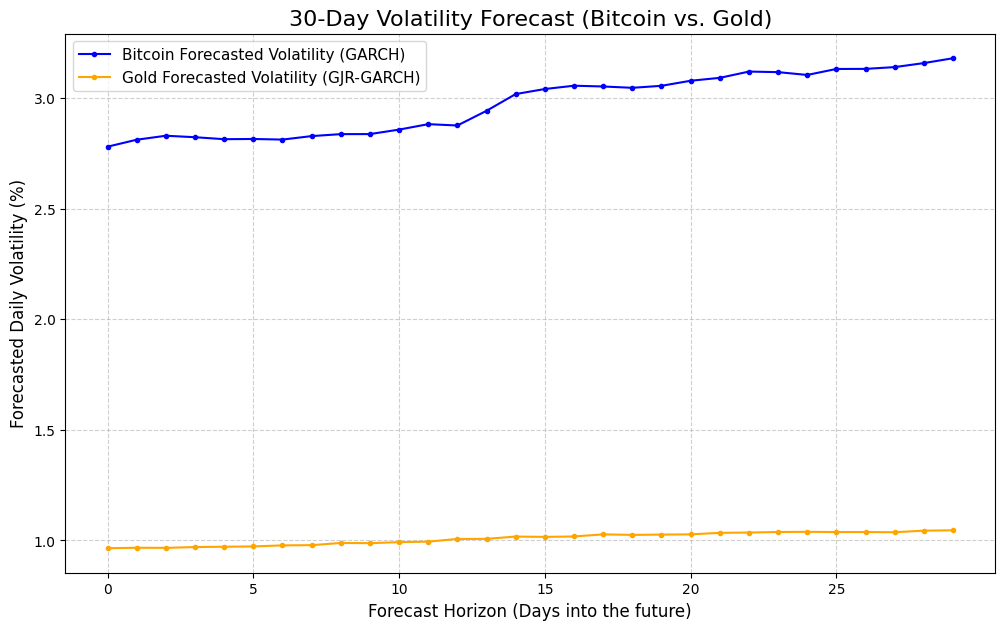

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. SET FORECAST HORIZON ---
horizon75_len = len(test75_data)

# --- 2. RUN BITCOIN FORECAST (GARCH) ---
# We use axis=0 to average across the 1000 simulations
fc75_btc = res75_garch_btc.forecast(horizon=horizon75_len, method='simulation', simulations=1000)
btc75_vol_forecast_series = fc75_btc.variance.mean(axis=0)

# --- 3. RUN GOLD FORECAST (GJR-GARCH) ---
# We use axis=0 to average across the 1000 simulations
fc75_gold_gjr = res75_gjr_garch_gold.forecast(horizon=horizon75_len, method='simulation', simulations=1000)
gold75_vol_forecast_series = fc75_gold_gjr.variance.mean(axis=0)

# --- 4. RESCALE AND CONVERT TO % VOLATILITY ---
# Rescale the variance from (return*100)^2 back to return^2
btc75_variance_rescaled = btc75_vol_forecast_series * (1/100)**2
gold75_variance_rescaled = gold75_vol_forecast_series * (1/100)**2

# Convert variance to % volatility (sqrt * 100)
btc75_vol_pct = np.sqrt(btc75_variance_rescaled) * 100
gold75_vol_pct = np.sqrt(gold75_variance_rescaled) * 100

# --- 5. CREATE THE FINAL 30-DAY PLOT ---
days75_to_plot = 30

plt.figure(figsize=(12, 7))

# Plot the first 30 days
# We use .values to plot against a 0-29 index
plt.plot(btc75_vol_pct.values[:days75_to_plot], label='Bitcoin Forecasted Volatility (GARCH)', color='blue', marker='.')
plt.plot(gold75_vol_pct.values[:days75_to_plot], label='Gold Forecasted Volatility (GJR-GARCH)', color='orange', marker='.')

# Add Labels and Title
plt.title('30-Day Volatility Forecast (Bitcoin vs. Gold)', fontsize=16)
plt.xlabel('Forecast Horizon (Days into the future)', fontsize=12)
plt.ylabel('Forecasted Daily Volatility (%)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(0, days75_to_plot, 5)) # Make the x-axis labels cleaner

plt.show()

In [ ]:
# Set the number of days you want to display
days75_to_display = 30

# --- Display the first 30 data points ---

print("--- Bitcoin Forecasted Daily Volatility (%) [First 30 Days] ---")
# We use .iloc[:days_to_display] to get the first 30
# We convert to a DataFrame for nicer printing
display(pd.DataFrame(btc75_vol_pct.iloc[:days75_to_display], columns=['Forecasted Volatility (%)']))

print("\n--- Gold Forecasted Daily Volatility (%) [First 30 Days] ---")
display(pd.DataFrame(gold75_vol_pct.iloc[:days75_to_display], columns=['Forecasted Volatility (%)']))

--- Bitcoin Forecasted Daily Volatility (%) [First 30 Days] ---


Forecasted Volatility (%)
h.001                   2.779442
h.002                   2.810865
h.003                   2.828886
h.004                   2.822177
h.005                   2.813283
h.006                   2.814202
h.007                   2.811507
h.008                   2.827255
h.009                   2.836127
h.010                   2.836379
h.011                   2.856569
h.012                   2.881210
h.013                   2.875150
h.014                   2.941557
h.015                   3.017291
h.016                   3.039997
h.017                   3.054941
h.018                   3.051450
h.019                   3.045443
h.020                   3.054509
h.021                   3.077361
h.022                   3.090460
h.023                   3.118836
h.024                   3.116281
h.025                   3.103573
h.026                   3.130619
h.027                   3.130994
h.028                   3.138999
h.029                   3.157135
h.030                   3.179157


--- Gold Forecasted Daily Volatility (%) [First 30 Days] ---


Forecasted Volatility (%)
h.001                   0.964953
h.002                   0.967070
h.003                   0.966534
h.004                   0.970213
h.005                   0.971661
h.006                   0.973012
h.007                   0.977759
h.008                   0.978821
h.009                   0.988714
h.010                   0.987794
h.011                   0.992365
h.012                   0.994642
h.013                   1.006881
h.014                   1.007229
h.015                   1.017649
h.016                   1.016171
h.017                   1.018076
h.018                   1.027496
h.019                   1.025217
h.020                   1.026537
h.021                   1.027615
h.022                   1.034454
h.023                   1.035804
h.024                   1.038278
h.025                   1.039010
h.026                   1.037996
h.027                   1.038071
h.028                   1.037219
h.029                   1.044347
h.030                   1.045862

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# --- 1. SET PARAMETERS ---
data75_to_use = merged['Bitcoin_logret'].values.reshape(-1, 1)
window_size = 30

# --- 2. SCALE THE DATA ---
# ⭐ FIX: Use scaler75.fit_transform
scaler75 = MinMaxScaler(feature_range=(0, 1))
scaled75_data = scaler75.fit_transform(data75_to_use)

# --- 3. CREATE SEQUENCES (X, y) ---
X = []
y = []

for i in range(window_size, len(scaled75_data)):
    X.append(scaled75_data[i-window_size:i, 0])
    y.append(scaled75_data[i, 0])

X, y = np.array(X), np.array(y)

# --- 4. SPLIT INTO TRAINING (75%) AND TESTING (25%) ---
train75_size = int(len(X) * 0.75)
test75_size = len(X) - train75_size

X75_train, X75_test = X[0:train75_size], X[train75_size:len(X)]
y75_train, y75_test = y[0:train75_size], y[train75_size:len(y)]

# --- 5. RESHAPE FOR LSTM [samples, timesteps, features] ---
# ⭐ FIX: Use window_size (or X75_train.shape[1])
X75_train = np.reshape(X75_train, (X75_train.shape[0], window_size, 1))
X75_test = np.reshape(X75_test, (X75_test.shape[0], window_size, 1))

# --- 6. PRINT SHAPES TO CONFIRM ---
# ⭐ FIX: Print the new 75:25 variables
print("--- Data Preparation Complete (75:25 Split) ---")
print(f"Window size (timesteps): {window_size}")
print(f"X_train shape: {X75_train.shape}")
print(f"y_train shape: {y75_train.shape}")
print(f"X_test shape: {X75_test.shape}")
print(f"y_test shape: {y75_test.shape}")


--- Data Preparation Complete (75:25 Split) ---
Window size (timesteps): 30
X_train shape: (2442, 30, 1)
y_train shape: (2442,)
X_test shape: (815, 30, 1)
y_test shape: (815,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping

# --- 1. BUILD THE LSTM MODEL ---

model75 = Sequential()

# Layer 1: LSTM layer
# ⭐ FIX: Use window_size (which was 30) for the input shape
model75.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, 1)))
model75.add(Dropout(0.2)) # Dropout helps prevent overfitting

# Layer 2: Another LSTM layer
model75.add(LSTM(units=50, return_sequences=False)) # False because it's the last LSTM layer
model75.add(Dropout(0.2))

# Layer 3: The Output Layer
model75.add(Dense(units=1))

# --- 2. COMPILE THE MODEL ---
model75.compile(optimizer='adam', loss='mean_squared_error')

# --- 3. TRAIN THE MODEL ("fit" the data) ---

# ⭐ FIX: Add EarlyStopping, just like in your senior's code
es = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

print("\n--- Starting Model Training (75:25 Split) ---")

history = model75.fit(
    X75_train,  # ⭐ FIX: Use X75_train
    y75_train,  # ⭐ FIX: Use y75_train
    epochs=50,
    batch_size=32,
    validation_data=(X75_test, y75_test), # ⭐ FIX: Use X75_test, y75_test
    callbacks=[es], # Add the callback
    verbose=1
)

print("--- Model Training Complete ---")

# --- 4. DISPLAY THE MODEL STRUCTURE ---
model75.summary()


--- Starting Model Training (75:25 Split) ---
Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 16s 109ms/step - loss: 0.0766 - val_loss: 0.0013
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0080 - val_loss: 0.0016
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0077 - val_loss: 0.0013
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0063 - val_loss: 0.0013
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0066 - val_loss: 0.0016
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0058 - val_loss: 0.0013
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0060 - val_loss: 0.0013
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0055 - val_loss: 0.0015
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0055 - val_loss: 0.0014
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0064 - val_loss: 0.0016
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0055 - val_loss: 0.0013
Epoch 12/50
77

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
Test RMSE (75:25 Split): 0.025797


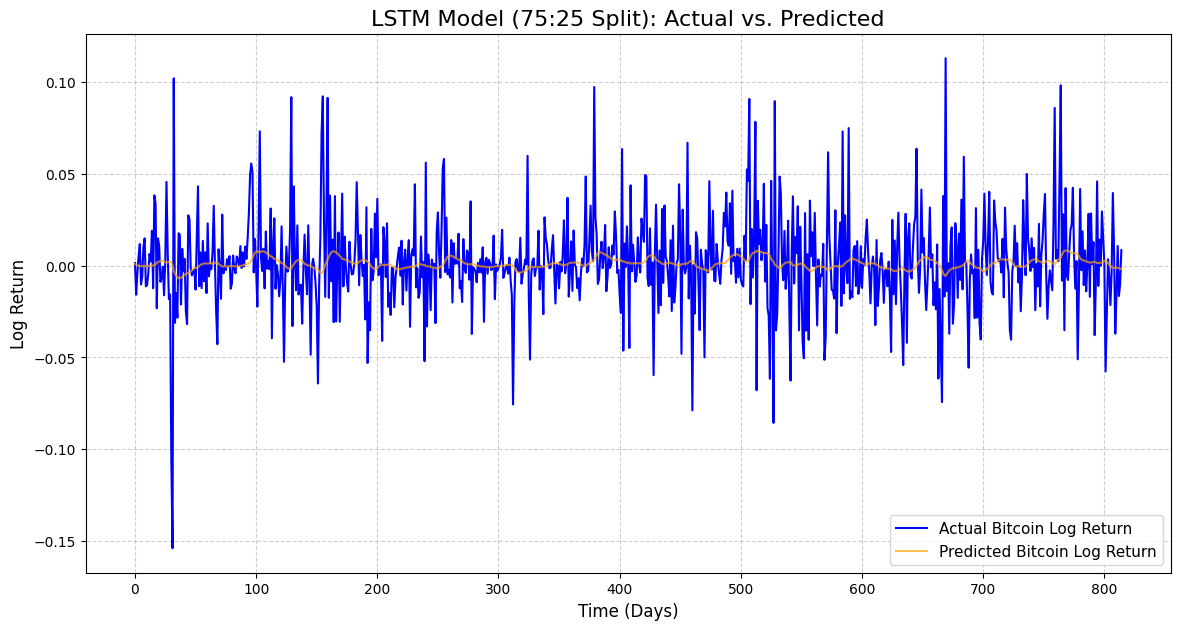

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# --- 1. MAKE PREDICTIONS ---
# ⭐ FIX: Use your new 75:25 model and test set
predicted_scaled = model75.predict(X75_test)

# --- 2. UN-SCALE THE DATA ---
# ⭐ FIX: Use your new scaler75 object

# Un-scale the predictions
predictions = scaler75.inverse_transform(predicted_scaled)

# Un-scale the *actual* values so we can compare
# ⭐ FIX: Use scaler75 and y75_test
actual_values = scaler75.inverse_transform(y75_test.reshape(-1, 1))

# --- 3. CALCULATE ERROR (RMSE) ---
rmse = np.sqrt(mean_squared_error(actual_values, predictions))
print(f'Test RMSE (75:25 Split): {rmse:.6f}')

# --- 4. PLOT THE RESULTS ---
plt.figure(figsize=(14, 7))
plt.plot(actual_values, color='blue', label='Actual Bitcoin Log Return')
plt.plot(predictions, color='orange', label='Predicted Bitcoin Log Return', alpha=0.7)
# ⭐ FIX: Updated title
plt.title('LSTM Model (75:25 Split): Actual vs. Predicted', fontsize=16)
plt.xlabel('Time (Days)', fontsize=12)
plt.ylabel('Log Return', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

--- Data Shapes (75:25 Split) ---
X_train: (2442, 30, 1)
X_test: (815, 30, 1)

--- Starting Model Training (75:25 Split) ---
Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 0.0108 - val_loss: 0.0029
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 9.8944e-04 - val_loss: 0.0011
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 8.0214e-04 - val_loss: 0.0010
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 8.1402e-04 - val_loss: 7.2022e-04
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 7.3722e-04 - val_loss: 5.7901e-04
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 7.2406e-04 - val_loss: 7.5758e-04
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 6.4861e-04 - val_loss: 0.0010
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 6.0339e-04 - val_loss: 5.9371e-04
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 5.758

Set      MAE         MSE     RMSE  MAPE(%)
0  Train  1178.88  3393513.81  1842.15    24.32
1   Test  1821.08  6477655.40  2545.12     4.33

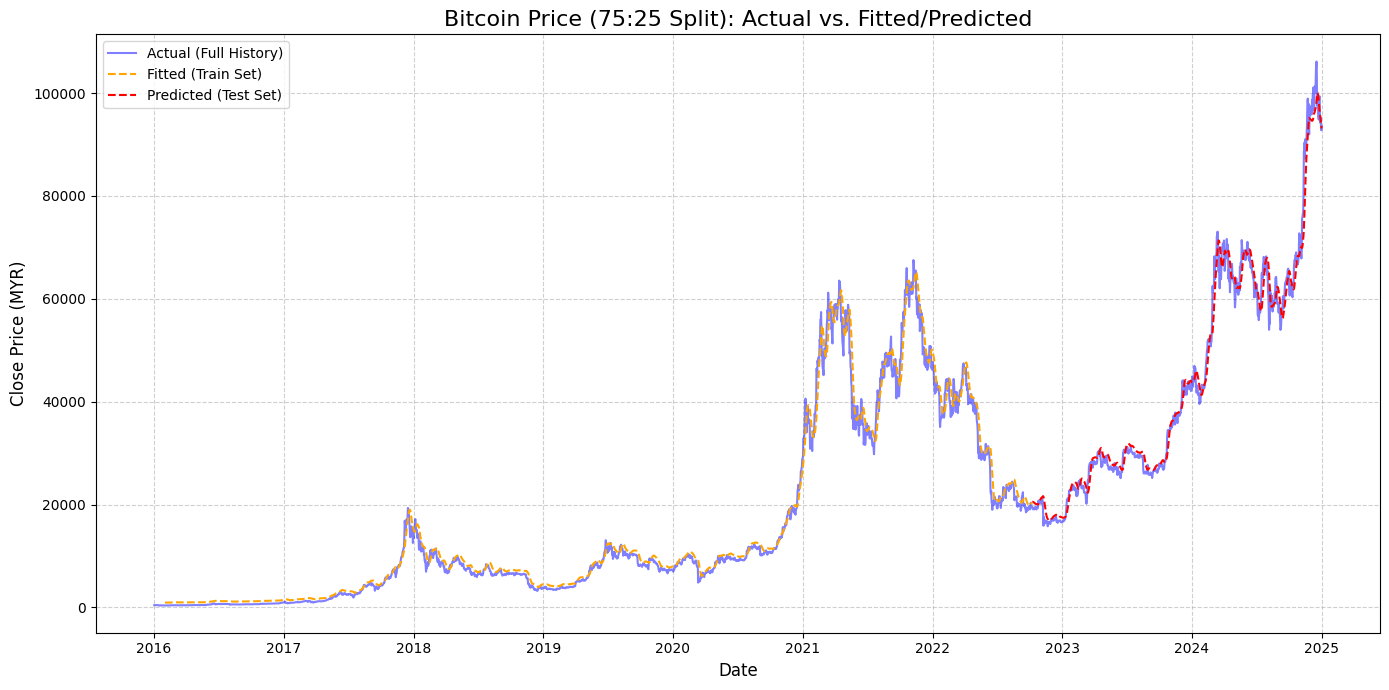

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# --- 1. SET UP DATA & PARAMETERS ---
df = merged.copy()
close_col = 'Bitcoin' # <-- Changed to use the 'Bitcoin' price column
date_col = 'Date'
window_size = 30 # This is the 'adaptive_lookback'

# Ensure date column is datetime
df[date_col] = pd.to_datetime(df[date_col])

# --- 2. SCALING & DATA PREPARATION ---
data_to_use = df[close_col].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_to_use)

# --- 3. CREATE SEQUENCES ---
def make_sequences(data, window_size):
    X, y = [], []
    # ⭐ FIX: Corrected indentation on the loop
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = make_sequences(scaled_data, window_size)

# --- 4. TRAIN / TEST SPLIT (75% Train, 25% Test) ---
# ⭐ CHANGE: Updated to 75:25 split
train_split_idx = int(len(X) * 0.75)

X_tr, y_tr = X[:train_split_idx], y[:train_split_idx]
X_test, y_test = X[train_split_idx:], y[train_split_idx:]

# --- 5. RESHAPE FOR LSTM [samples, timesteps, features] ---
X_tr = np.reshape(X_tr, (X_tr.shape[0], X_tr.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# ⭐ CHANGE: Updated print statement
print("--- Data Shapes (75:25 Split) ---")
print(f"X_train: {X_tr.shape}")
print(f"X_test: {X_test.shape}")

# --- 6. BUILD & TRAIN MODEL (from your senior's code) ---
tf.random.set_seed(42)
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")

# Use EarlyStopping, monitoring the test set loss
es = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

print("\n--- Starting Model Training (75:25 Split) ---")
history = model.fit(
    X_tr, y_tr,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test), # Use test set for validation
    callbacks=[es],
    verbose=1
)
print("--- Model Training Complete ---")

# --- 7. EVALUATION & METRICS ---
def inverse_and_metrics(y_true_scaled, y_pred_scaled, scaler_obj):
    y_true = scaler_obj.inverse_transform(y_true_scaled.reshape(-1, 1)).flatten()
    y_pred = scaler_obj.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100
    return y_true, y_pred, mae, mse, rmse, mape

# Get predictions (scaled)
y_pred_tr_skala = model.predict(X_tr, verbose=0).flatten()
y_pred_test_skala = model.predict(X_test, verbose=0).flatten()

# Get metrics (un-scaled)
y_true_tr, y_pred_tr, mae_tr, mse_tr, rmse_tr, mape_tr = inverse_and_metrics(y_tr, y_pred_tr_skala, scaler)
y_true_test, y_pred_test, mae_te, mse_te, rmse_te, mape_te = inverse_and_metrics(y_test, y_pred_test_skala, scaler)

# Build metrics table (Train/Test only)
metrics_df = pd.DataFrame({
    "Set": ["Train", "Test"],
    "MAE": [mae_tr, mae_te],
    "MSE": [mse_tr, mse_te],
    "RMSE": [rmse_tr, rmse_te],
    "MAPE(%)": [mape_tr, mape_te]
})

print("\n=== Performance Metrics (75:25 Split) ===")
display(metrics_df.round(2))

# --- 8. PLOTTING (Full History Plot) ---

# Get the correct dates for each set
date_index = df[date_col].iloc[window_size:]
train_dates = date_index.iloc[:train_split_idx]
test_dates = date_index.iloc[train_split_idx:]

plt.figure(figsize=(14, 7))

# Plot 1: Full History
plt.plot(df[date_col], df[close_col], label="Actual (Full History)", color='blue', alpha=0.5)

# Plot 2: Fitted (Train Set)
plt.plot(train_dates, y_pred_tr, label="Fitted (Train Set)", color='orange', linestyle='--')

# Plot 3: Predicted (Test Set)
plt.plot(test_dates, y_pred_test, label="Predicted (Test Set)", color='red', linestyle='--')

plt.title(f"{close_col} Price (75:25 Split): Actual vs. Fitted/Predicted", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price (MYR)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


--- Data Shapes (Multivariate 75:25 Split) ---
X_train: (2442, 30, 2)
X_test:  (815, 30, 2)

--- Starting Multivariate Model Training (75:25 Split) ---
Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - loss: 0.0104 - val_loss: 9.5323e-04
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0010 - val_loss: 9.1090e-04
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 9.0030e-04 - val_loss: 0.0011
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 7.5470e-04 - val_loss: 7.9077e-04
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 7.9068e-04 - val_loss: 0.0015
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 7.2507e-04 - val_loss: 7.4851e-04
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 6.9948e-04 - val_loss: 0.0010
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 6.1990e-04 - val_loss: 0.0025
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s

Set      MAE         MSE     RMSE  MAPE(%)
0  Train  1065.88  3417333.04  1848.60     9.14
1   Test  1766.38  5288643.15  2299.71     4.49

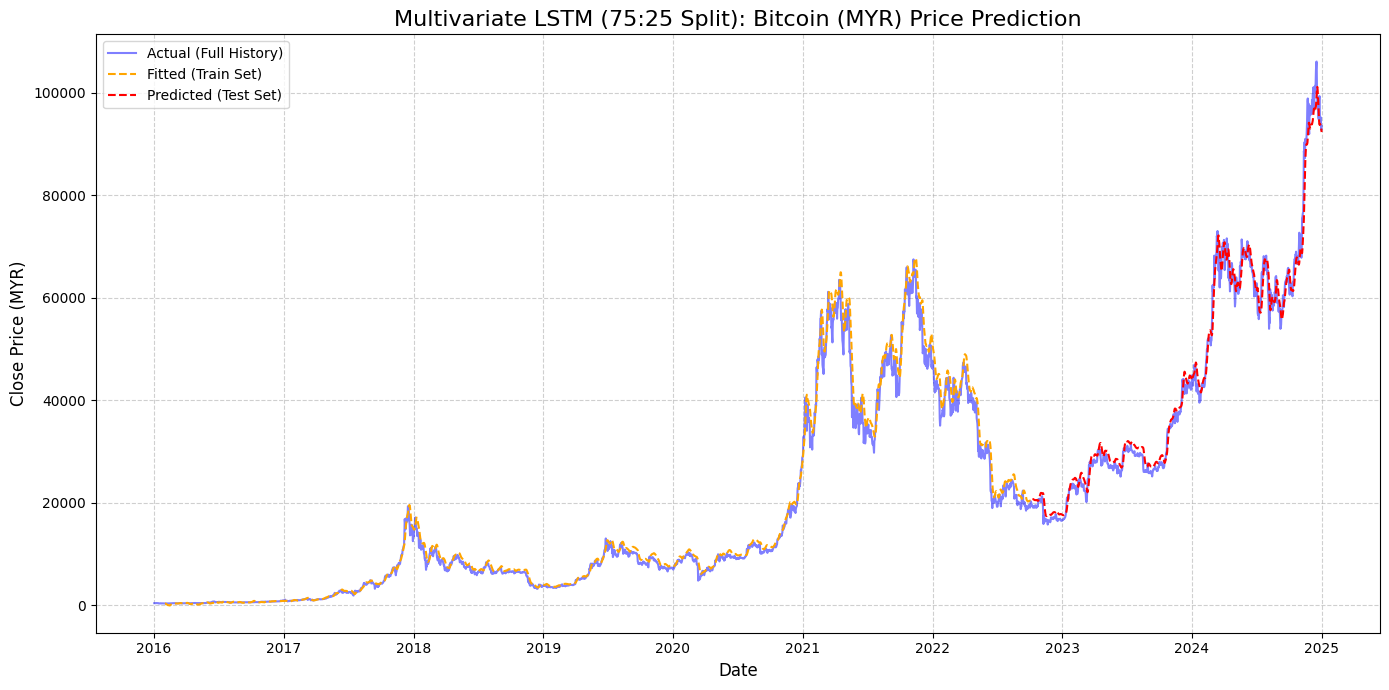

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
# --- 3. SET UP FOR MULTIVARIATE LSTM ---
df_75 = merged.copy() # Use a new df variable
feature_cols_75 = ['Bitcoin', 'Gold']
target_col_75 = 'Bitcoin'
date_col_75 = 'Date'
window_size_75 = 30

# --- 4. SCALING ---
data_to_use_75 = df_75[feature_cols_75].values
scaler_75 = MinMaxScaler(feature_range=(0, 1)) # Renamed
scaled_data_75 = scaler_75.fit_transform(data_to_use_75) # Renamed

# --- 5. CREATE SEQUENCES (Multivariate) ---
def make_sequences_multi_75(data, window_size): # Renamed
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, :])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_75, y_75 = make_sequences_multi_75(scaled_data_75, window_size_75) # Renamed

# --- 6. TRAIN / TEST SPLIT (75% Train, 25% Test) ---
train_split_idx_75 = int(len(X_75) * 0.75) # Renamed
X_tr_75, y_tr_75 = X_75[:train_split_idx_75], y_75[:train_split_idx_75] # Renamed
X_test_75, y_test_75 = X_75[train_split_idx_75:], y_75[train_split_idx_75:] # Renamed

# --- 7. RESHAPE FOR LSTM [samples, timesteps, features] ---
n_features_75 = len(feature_cols_75) # Renamed
print("\n--- Data Shapes (Multivariate 75:25 Split) ---")
print(f"X_train: {X_tr_75.shape}") # Renamed
print(f"X_test:  {X_test_75.shape}") # Renamed

# --- 8. BUILD & TRAIN MODEL ---
tf.random.set_seed(42)
model_75 = Sequential([ # Renamed
    LSTM(64, return_sequences=True, input_shape=(window_size_75, n_features_75)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])
model_75.compile(optimizer="adam", loss="mse") # Renamed
es_75 = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True) # Renamed

print("\n--- Starting Multivariate Model Training (75:25 Split) ---")
history_75 = model_75.fit( # Renamed
    X_tr_75, y_tr_75, # Renamed
    epochs=50,
    batch_size=32,
    validation_data=(X_test_75, y_test_75), # Renamed
    callbacks=[es_75], # Renamed
    verbose=1
)
print("--- Model Training Complete ---")

# --- 9. EVALUATION & METRICS (Multivariate) ---
def inverse_and_metrics_multi_75(y_true_scaled, y_pred_scaled, scaler_obj_75): # Renamed
    n_features = scaler_obj_75.n_features_in_

    pred_combined = np.zeros((len(y_pred_scaled), n_features))
    pred_combined[:, 0] = y_pred_scaled.flatten()
    y_pred = scaler_obj_75.inverse_transform(pred_combined)[:, 0]

    true_combined = np.zeros((len(y_true_scaled), n_features))
    true_combined[:, 0] = y_true_scaled.flatten()
    y_true = scaler_obj_75.inverse_transform(true_combined)[:, 0]

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100
    return y_true, y_pred, mae, mse, rmse, mape

y_pred_tr_skala_75 = model_75.predict(X_tr_75, verbose=0).flatten() # Renamed
y_pred_test_skala_75 = model_75.predict(X_test_75, verbose=0).flatten() # Renamed

y_true_tr_75, y_pred_tr_75, mae_tr_75, mse_tr_75, rmse_tr_75, mape_tr_75 = inverse_and_metrics_multi_75(y_tr_75, y_pred_tr_skala_75, scaler_75) # Renamed
y_true_test_75, y_pred_test_75, mae_te_75, mse_te_75, rmse_te_75, mape_te_75 = inverse_and_metrics_multi_75(y_test_75, y_pred_test_skala_75, scaler_75) # Renamed

metrics_df_75 = pd.DataFrame({ # Renamed
    "Set": ["Train", "Test"],
    "MAE": [mae_tr_75, mae_te_75], # Renamed
    "MSE": [mse_tr_75, mse_te_75], # Renamed
    "RMSE": [rmse_tr_75, rmse_te_75], # Renamed
    "MAPE(%)": [mape_tr_75, mape_te_75] # Renamed
})

print("\n=== Ringkasan Metrik (Multivariate 75:25 Split) ===")
display(metrics_df_75.round(2)) # Renamed

# --- 10. PLOTTING (Full History Plot) ---
date_index_75 = df_75[date_col_75].iloc[window_size_75:] # Renamed
train_dates_75 = date_index_75.iloc[:train_split_idx_75] # Renamed
test_dates_75 = date_index_75.iloc[train_split_idx_75:] # Renamed

plt.figure(figsize=(14, 7))
plt.plot(df_75[date_col_75], df_75[target_col_75], label="Actual (Full History)", color='blue', alpha=0.5) # Renamed
plt.plot(train_dates_75, y_pred_tr_75, label="Fitted (Train Set)", color='orange', linestyle='--') # Renamed
plt.plot(test_dates_75, y_pred_test_75, label="Predicted (Test Set)", color='red', linestyle='--') # Renamed
plt.title(f"Multivariate LSTM (75:25 Split): Bitcoin (MYR) Price Prediction", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price (MYR)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


--- Data Shapes (Multivariate Gold 75:25 Split) ---
X_train: (2442, 30, 2)
X_test:  (815, 30, 2)

--- Starting Multivariate Model Training (Predicting Gold) ---
Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 0.0136 - val_loss: 0.0065
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0013 - val_loss: 0.0063
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0010 - val_loss: 0.0082
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 9.5788e-04 - val_loss: 0.0036
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 8.0769e-04 - val_loss: 0.0047
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 8.7367e-04 - val_loss: 0.0037
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 7.0838e-04 - val_loss: 0.0059
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 6.4867e-04 - val_loss: 0.0070
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step 

Set     MAE        MSE    RMSE  MAPE(%)
0  Train   79.26   11517.91  107.32     1.24
1   Test  354.27  209071.24  457.24     3.38

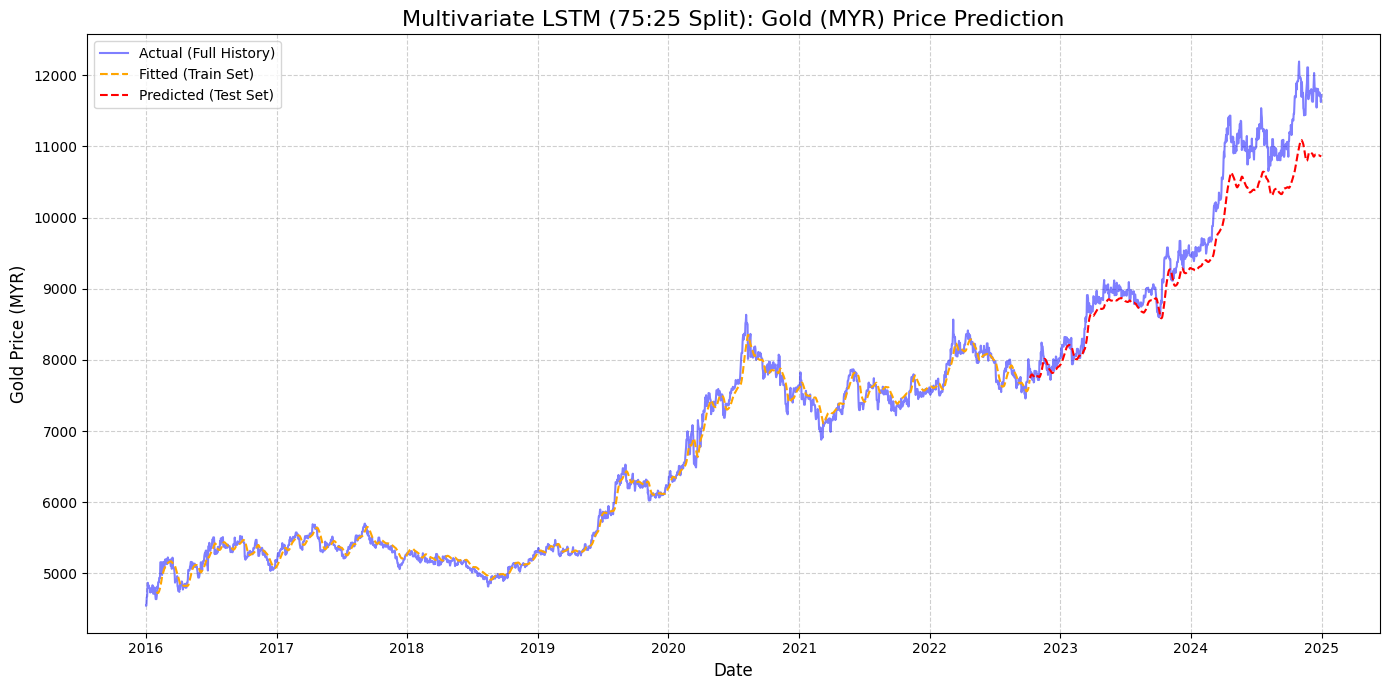

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
# --- 3. SET UP FOR MULTIVARIATE LSTM (Predicting Gold) ---
df_gold_75 = merged.copy()
feature_cols_gold_75 = ['Bitcoin', 'Gold'] # <-- Inputs
target_col_gold_75 = 'Gold'               # <-- Output
date_col_gold_75 = 'Date'
window_size_gold_75 = 30

# --- 4. SCALING ---
data_to_use_gold_75 = df_gold_75[feature_cols_gold_75].values
scaler_gold_75 = MinMaxScaler(feature_range=(0, 1)) # New scaler
scaled_data_gold_75 = scaler_gold_75.fit_transform(data_to_use_gold_75)

# --- 5. CREATE SEQUENCES (Multivariate for Gold) ---
def make_sequences_multi_gold_75(data, window_size): # New function
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, :]) # All features (BTC & Gold)
        y.append(data[i, 1])               # ⭐ CHANGE: Target is col 1 (Gold)
    return np.array(X), np.array(y)

X_gold_75, y_gold_75 = make_sequences_multi_gold_75(scaled_data_gold_75, window_size_gold_75)

# --- 6. TRAIN / TEST SPLIT (75% Train, 25% Test) ---
train_split_idx_gold_75 = int(len(X_gold_75) * 0.75)
X_tr_gold_75, y_tr_gold_75 = X_gold_75[:train_split_idx_gold_75], y_gold_75[:train_split_idx_gold_75]
X_test_gold_75, y_test_gold_75 = X_gold_75[train_split_idx_gold_75:], y_gold_75[train_split_idx_gold_75:]

# --- 7. RESHAPE FOR LSTM [samples, timesteps, features] ---
n_features_gold_75 = len(feature_cols_gold_75)
print("\n--- Data Shapes (Multivariate Gold 75:25 Split) ---")
print(f"X_train: {X_tr_gold_75.shape}")
print(f"X_test:  {X_test_gold_75.shape}")

# --- 8. BUILD & TRAIN MODEL ---
tf.random.set_seed(42)
model_gold_75 = Sequential([ # New model
    LSTM(64, return_sequences=True, input_shape=(window_size_gold_75, n_features_gold_75)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])
model_gold_75.compile(optimizer="adam", loss="mse")
es_gold_75 = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

print("\n--- Starting Multivariate Model Training (Predicting Gold) ---")
history_gold_75 = model_gold_75.fit(
    X_tr_gold_75, y_tr_gold_75,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_gold_75, y_test_gold_75),
    callbacks=[es_gold_75],
    verbose=1
)
print("--- Model Training Complete ---")

# --- 9. EVALUATION & METRICS (Multivariate for Gold) ---
def inverse_and_metrics_multi_gold_75(y_true_scaled, y_pred_scaled, scaler_obj_gold_75): # New function
    n_features = scaler_obj_gold_75.n_features_in_

    # ⭐ CHANGE: Put prediction in col 1 (Gold)
    pred_combined = np.zeros((len(y_pred_scaled), n_features))
    pred_combined[:, 1] = y_pred_scaled.flatten()
    y_pred = scaler_obj_gold_75.inverse_transform(pred_combined)[:, 1] # Get col 1

    # ⭐ CHANGE: Put actual in col 1 (Gold)
    true_combined = np.zeros((len(y_true_scaled), n_features))
    true_combined[:, 1] = y_true_scaled.flatten()
    y_true = scaler_obj_gold_75.inverse_transform(true_combined)[:, 1] # Get col 1

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100
    return y_true, y_pred, mae, mse, rmse, mape

y_pred_tr_skala_gold_75 = model_gold_75.predict(X_tr_gold_75, verbose=0).flatten()
y_pred_test_skala_gold_75 = model_gold_75.predict(X_test_gold_75, verbose=0).flatten()

y_true_tr_gold_75, y_pred_tr_gold_75, mae_tr_gold_75, mse_tr_gold_75, rmse_tr_gold_75, mape_tr_gold_75 = inverse_and_metrics_multi_gold_75(y_tr_gold_75, y_pred_tr_skala_gold_75, scaler_gold_75)
y_true_test_gold_75, y_pred_test_gold_75, mae_te_gold_75, mse_te_gold_75, rmse_te_gold_75, mape_te_gold_75 = inverse_and_metrics_multi_gold_75(y_test_gold_75, y_pred_test_skala_gold_75, scaler_gold_75)

metrics_df_gold_75 = pd.DataFrame({
    "Set": ["Train", "Test"],
    "MAE": [mae_tr_gold_75, mae_te_gold_75],
    "MSE": [mse_tr_gold_75, mse_te_gold_75],
    "RMSE": [rmse_tr_gold_75, rmse_te_gold_75],
    "MAPE(%)": [mape_tr_gold_75, mape_te_gold_75]
})

print("\n=== Ringkasan Metrik (Multivariate Gold 75:25 Split) ===")
display(metrics_df_gold_75.round(2))

# --- 10. PLOTTING (Full History Plot) ---
date_index_gold_75 = df_gold_75[date_col_gold_75].iloc[window_size_gold_75:]
train_dates_gold_75 = date_index_gold_75.iloc[:train_split_idx_gold_75]
test_dates_gold_75 = date_index_gold_75.iloc[train_split_idx_gold_75:]

plt.figure(figsize=(14, 7))
# ⭐ CHANGE: Plot the 'Gold' column as the actual
plt.plot(df_gold_75[date_col_gold_75], df_gold_75[target_col_gold_75], label="Actual (Full History)", color='blue', alpha=0.5)
plt.plot(train_dates_gold_75, y_pred_tr_gold_75, label="Fitted (Train Set)", color='orange', linestyle='--')
plt.plot(test_dates_gold_75, y_pred_test_gold_75, label="Predicted (Test Set)", color='red', linestyle='--')

# ⭐ CHANGE: Updated titles
plt.title(f"Multivariate LSTM (75:25 Split): Gold (MYR) Price Prediction", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Gold Price (MYR)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


--- Data Shapes (Multivariate Gold 75:25 Split) ---
X_train: (2443, 30, 2)
X_test:  (815, 30, 2)

--- Starting Multivariate Model Training (Predicting Gold) (75:25 Split) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0183 - val_loss: 0.0011
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 9.5072e-04 - val_loss: 0.0016
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 8.6128e-04 - val_loss: 0.0013
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 8.4551e-04 - val_loss: 0.0040
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 7.8155e-04 - val_loss: 0.0024
--- Model Training Complete ---

=== Ringkasan Metrik (Multivariate Gold 75:25 Split) ===


Set     MAE       MSE    RMSE  MAPE(%)
0  Train   90.30  14411.80  120.05     1.43
1   Test  181.96  64159.43  253.30     1.77

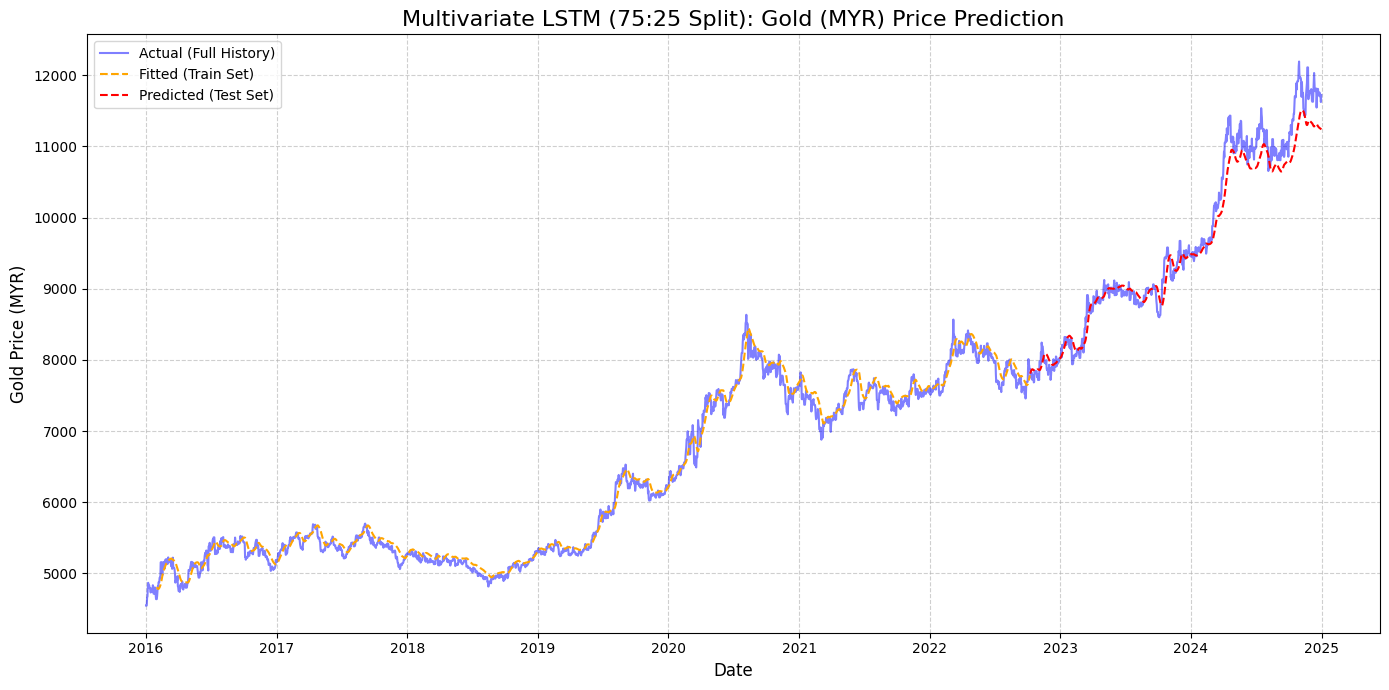

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# --- 3. SET UP FOR MULTIVARIATE LSTM (Predicting Gold) ---
df_gold_75 = merged.copy() # Renamed df (assuming merged_df is ready)
feature_cols_gold_75 = ['Bitcoin', 'Gold'] # <-- Inputs
target_col_gold_75 = 'Gold'               # <-- Output
date_col_gold_75 = 'Date'
window_size_gold_75 = 30

# --- 4. SCALING ---
data_to_use_gold_75 = df_gold_75[feature_cols_gold_75].values
scaler_gold_75 = MinMaxScaler(feature_range=(0, 1)) # Renamed scaler
scaled_data_gold_75 = scaler_gold_75.fit_transform(data_to_use_gold_75)

# --- 5. CREATE SEQUENCES (Multivariate for Gold) ---
def make_sequences_multi_gold_75(data, window_size): # New function
    X, y = [], []
    for i in range(window_size, len(data)):
        # ⭐ FIX: Corrected indentation
        X.append(data[i-window_size:i, :]) # All features (BTC & Gold)
        y.append(data[i, 1])               # Target is col 1 (Gold)
    return np.array(X), np.array(y)

X_gold_75, y_gold_75 = make_sequences_multi_gold_75(scaled_data_gold_75, window_size_gold_75) # Renamed

# --- 6. TRAIN / TEST SPLIT (75% Train, 25% Test) ---
# ⭐ CHANGE: Updated to 0.75 for 75:25 split
train_split_idx_gold_75 = int(len(X_gold_75) * 0.75)
X_tr_gold_75, y_tr_gold_75 = X_gold_75[:train_split_idx_gold_75], y_gold_75[:train_split_idx_gold_75] # Renamed
X_test_gold_75, y_test_gold_75 = X_gold_75[train_split_idx_gold_75:], y_gold_75[train_split_idx_gold_75:] # Renamed

# --- 7. RESHAPE FOR LSTM [samples, timesteps, features] ---
n_features_gold_75 = len(feature_cols_gold_75)
print("\n--- Data Shapes (Multivariate Gold 75:25 Split) ---") # Updated title
print(f"X_train: {X_tr_gold_75.shape}") # Renamed
print(f"X_test:  {X_test_gold_75.shape}") # Renamed

# --- 8. BUILD & TRAIN MODEL ---
tf.random.set_seed(42)
model_gold_75 = Sequential([ # Renamed model
    LSTM(64, return_sequences=True, input_shape=(window_size_gold_75, n_features_gold_75)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])
model_gold_75.compile(optimizer="adam", loss="mse")
es_gold_75 = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True) # Renamed

print("\n--- Starting Multivariate Model Training (Predicting Gold) (75:25 Split) ---") # Updated title
history_gold_75 = model_gold_75.fit( # Renamed
    X_tr_gold_75, y_tr_gold_75, # Renamed
    epochs=50,
    batch_size=32,
    validation_data=(X_test_gold_75, y_test_gold_75), # Renamed
    callbacks=[es_gold_75], # Renamed
    verbose=1
)
print("--- Model Training Complete ---")

# --- 9. EVALUATION & METRICS (Multivariate for Gold) ---
def inverse_and_metrics_multi_gold_75(y_true_scaled, y_pred_scaled, scaler_obj_gold_75): # New function
    n_features = scaler_obj_gold_75.n_features_in_

    # Put prediction in col 1 (Gold)
    pred_combined = np.zeros((len(y_pred_scaled), n_features))
    pred_combined[:, 1] = y_pred_scaled.flatten()
    y_pred = scaler_obj_gold_75.inverse_transform(pred_combined)[:, 1]

    # Put actual in col 1 (Gold)
    true_combined = np.zeros((len(y_true_scaled), n_features))
    true_combined[:, 1] = y_true_scaled.flatten()
    y_true = scaler_obj_gold_75.inverse_transform(true_combined)[:, 1]

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100
    return y_true, y_pred, mae, mse, rmse, mape

y_pred_tr_skala_gold_75 = model_gold_75.predict(X_tr_gold_75, verbose=0).flatten() # Renamed
y_pred_test_skala_gold_75 = model_gold_75.predict(X_test_gold_75, verbose=0).flatten() # Renamed

y_true_tr_gold_75, y_pred_tr_gold_75, mae_tr_gold_75, mse_tr_gold_75, rmse_tr_gold_75, mape_tr_gold_75 = inverse_and_metrics_multi_gold_75(y_tr_gold_75, y_pred_tr_skala_gold_75, scaler_gold_75) # Renamed
y_true_test_gold_75, y_pred_test_gold_75, mae_te_gold_75, mse_te_gold_75, rmse_te_gold_75, mape_te_gold_75 = inverse_and_metrics_multi_gold_75(y_test_gold_75, y_pred_test_skala_gold_75, scaler_gold_75) # Renamed

metrics_df_gold_75 = pd.DataFrame({ # Renamed
    "Set": ["Train", "Test"],
    "MAE": [mae_tr_gold_75, mae_te_gold_75],
    "MSE": [mse_tr_gold_75, mse_te_gold_75],
    "RMSE": [rmse_tr_gold_75, rmse_te_gold_75],
    "MAPE(%)": [mape_tr_gold_75, mape_te_gold_75]
})

print("\n=== Ringkasan Metrik (Multivariate Gold 75:25 Split) ===") # Updated title
display(metrics_df_gold_75.round(2)) # Renamed

# --- 10. PLOTTING (Full History Plot) ---
date_index_gold_75 = df_gold_75[date_col_gold_75].iloc[window_size_gold_75:] # Renamed
train_dates_gold_75 = date_index_gold_75.iloc[:train_split_idx_gold_75] # Renamed
test_dates_gold_75 = date_index_gold_75.iloc[train_split_idx_gold_75:] # Renamed

plt.figure(figsize=(14, 7))
plt.plot(df_gold_75[date_col_gold_75], df_gold_75[target_col_gold_75], label="Actual (Full History)", color='blue', alpha=0.5) # Renamed
plt.plot(train_dates_gold_75, y_pred_tr_gold_75, label="Fitted (Train Set)", color='orange', linestyle='--') # Renamed
plt.plot(test_dates_gold_75, y_pred_test_gold_75, label="Predicted (Test Set)", color='red', linestyle='--') # Renamed

plt.title(f"Multivariate LSTM (75:25 Split): Gold (MYR) Price Prediction", fontsize=16) # Updated title
plt.xlabel("Date", fontsize=12)
plt.ylabel("Gold Price (MYR)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 80:20 Split

In [ ]:
import numpy as np
import pandas as pd
from pmdarima import auto_arima

# --- 1. Split data (80:20 ratio) ---
# ⭐ CHANGE: Updated to 0.80 and renamed all variables
train_size_80 = int(len(merged) * 0.80)
train_data_80 = merged[['Date', 'Bitcoin_logret', 'Gold_logret']].iloc[0:train_size_80]
test_data_80 = merged[['Date', 'Bitcoin_logret', 'Gold_logret']].iloc[train_size_80:len(merged)]

print("--- 80:20 Split ---")
print("Training data size (80%):", len(train_data_80))
print("Testing data size (20%):", len(test_data_80))

###########################################

# --- 2. Fit auto_arima on Bitcoin (80% data) ---
# ⭐ CHANGE: Using train_data_80 and renamed model
model_bitcoin_80 = auto_arima(train_data_80['Bitcoin_logret'], seasonal=False, suppress_warnings=True)
print("\nBitcoin Auto ARIMA Model Summary (80:20 Split):")
print(model_bitcoin_80.summary())

# --- 3. Fit auto_arima on Gold (80% data) ---
# ⭐ CHANGE: Using train_data_80 and renamed model
model_gold_80 = auto_arima(train_data_80['Gold_logret'], seasonal=False, suppress_warnings=True)
print("\nGold Auto ARIMA Model Summary (80:20 Split):")
print(model_gold_80.summary())

--- 80:20 Split ---
Training data size (80%): 2629
Testing data size (20%): 658

Bitcoin Auto ARIMA Model Summary (80:20 Split):
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2629
Model:               SARIMAX(2, 0, 0)   Log Likelihood                4779.189
Date:                Wed, 05 Nov 2025   AIC                          -9550.379
Time:                        12:29:49   BIC                          -9526.881
Sample:                             0   HQIC                         -9541.870
                               - 2629                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0015      0.001      1.955      0.051   -3.62e-06       0.003
ar

In [ ]:
from arch import arch_model

# --- 1. Get residuals from your 80:20 auto_arima models ---
# ⭐ FIX: Use the _80 models
btc_residuals_80 = model_bitcoin_80.resid()
gold_residuals_80 = model_gold_80.resid()

# 2. Rescale the residuals
# (Note: You are not scaling here, just renaming.
# If you want to scale by 100, you'd do btc_residuals_80 * 100)
btc_resid_scaled_80 = btc_residuals_80
gold_resid_scaled_80 = gold_residuals_80

# --- 3. Fit GARCH(1,1) on Bitcoin's 80:20 Residuals ---
# ⭐ FIX: Use _80 variables
garch_btc_80 = arch_model(btc_resid_scaled_80,
                            mean='Zero',
                            vol='Garch', p=1, q=1,
                            dist='Normal') # You may want 't' dist later

res_garch_btc_80 = garch_btc_80.fit(disp='off')
# ⭐ FIX: Updated title
print("Bitcoin GARCH(1,1) on ARMA Residuals (80:20 Split):")
print(res_garch_btc_80.summary())

# --- 4. Fit GARCH(1,1) on Gold's 80:20 Residuals ---
# ⭐ FIX: Use _80 variables
garch_gold_80 = arch_model(gold_resid_scaled_80,
                             mean='Zero',
                             vol='Garch', p=1, q=1,
                             dist='Normal') # You may want 't' dist later

res_garch_gold_80 = garch_gold_80.fit(disp='off')
# ⭐ FIX: Updated title
print("\nGold GARCH(1,1) on MA Residuals (80:20 Split):")
print(res_garch_gold_80.summary())

Bitcoin GARCH(1,1) on ARMA Residuals (80:20 Split):
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4942.32
Distribution:                  Normal   AIC:                          -9878.63
Method:            Maximum Likelihood   BIC:                          -9861.01
                                        No. Observations:                 2629
Date:                Wed, Nov 05 2025   Df Residuals:                     2629
Time:                        12:31:36   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
ome

In [ ]:
# --- 1. Get residuals from your 80:20 auto_arima models ---
# ⭐ FIX: Use the _80 models
btc_residuals_80 = model_bitcoin_80.resid()
gold_residuals_80 = model_gold_80.resid()

# 2. Rescale the residuals
# (Note: You are not scaling here, just renaming.
# If you want to scale by 100, you'd do btc_residuals_80 * 100)
btc_resid_scaled_80 = btc_residuals_80 * 100
gold_resid_scaled_80 = gold_residuals_80 * 100

# --- 3. Fit GARCH(1,1) on Bitcoin's 80:20 Residuals ---
# ⭐ FIX: Use _80 variables
garch_btc_80 = arch_model(btc_resid_scaled_80,
                            mean='Zero',
                            vol='Garch', p=1, q=1,
                            dist='Normal') # You may want 't' dist later

res_garch_btc_80 = garch_btc_80.fit(disp='off')
# ⭐ FIX: Updated title
print("Bitcoin GARCH(1,1) on ARMA Residuals (80:20 Split):")
print(res_garch_btc_80.summary())

# --- 4. Fit GARCH(1,1) on Gold's 80:20 Residuals ---
# ⭐ FIX: Use _80 variables
garch_gold_80 = arch_model(gold_resid_scaled_80,
                             mean='Zero',
                             vol='Garch', p=1, q=1,
                             dist='Normal') # You may want 't' dist later

res_garch_gold_80 = garch_gold_80.fit(disp='off')
# ⭐ FIX: Updated title
print("\nGold GARCH(1,1) on MA Residuals (80:20 Split):")
print(res_garch_gold_80.summary())

Bitcoin GARCH(1,1) on ARMA Residuals (80:20 Split):
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7144.54
Distribution:                  Normal   AIC:                           14295.1
Method:            Maximum Likelihood   BIC:                           14312.7
                                        No. Observations:                 2629
Date:                Wed, Nov 05 2025   Df Residuals:                     2629
Time:                        12:32:13   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega       

In [ ]:
from arch import arch_model

# --- 1. Get residuals from your 80:20 auto_arima models ---
# ⭐ FIX: Use the _80 models
btc_residuals_80 = model_bitcoin_80.resid()
gold_residuals_80 = model_gold_80.resid()

# --- 2. Rescale the residuals ---
# ⭐ FIX: Renamed variables
btc_resid_scaled_80 = btc_residuals_80 * 100
gold_resid_scaled_80 = gold_residuals_80 * 100

# --- 3. Fit GARCH(1,1) on Bitcoin 80:20 Residuals ---
# ⭐ FIX: Renamed variables
garch_btc_80 = arch_model(btc_resid_scaled_80,
                            mean='Zero',
                            vol='Garch', p=1, q=1,
                            dist='t')

res_garch_btc_80 = garch_btc_80.fit(disp='off')
print("Bitcoin GARCH(1,1) on ARMA Residuals (80:20 Split, t-dist):")
print(res_garch_btc_80.summary())

# --- 4. Fit GARCH(1,1) on Gold 80:20 Residuals ---
# ⭐ FIX: Renamed variables
garch_gold_80 = arch_model(gold_resid_scaled_80,
                             mean='Zero',
                             vol='Garch', p=1, q=1,
                             dist='t')

res_garch_gold_80 = garch_gold_80.fit(disp='off')
print("\nGold GARCH(1,1) on MA Residuals (80:20 Split, t-dist):")
print(res_garch_gold_80.summary())

# --- 5. Fit EGARCH(1,1) on Gold 80:20 Residuals ---
# ⭐ FIX: Renamed variables
egarch_gold1_80 = arch_model(gold_resid_scaled_80,
                               mean='Zero',
                               vol='EGARCH', p=1, q=1,
                               dist='t')

res_egarch_gold1_80 = egarch_gold1_80.fit(disp='off')
print("\nGold EGARCH(1,1) on MA Residuals (80:20 Split, t-dist):")
print(res_egarch_gold1_80.summary())

# --- 6. Fit EGARCH(2,2) on Gold 80:20 Residuals ---
# ⭐ FIX: Renamed variables
egarch_gold2_80 = arch_model(gold_resid_scaled_80,
                               mean='Zero',
                               vol='EGARCH', p=2, q=2,
                               dist='t')

res_egarch_gold2_80 = egarch_gold2_80.fit(disp='off')
print("\nGold EGARCH(2,2) on MA Residuals (80:20 Split, t-dist):")
print(res_egarch_gold2_80.summary())

# --- 7. Fit GJR-GARCH(1,1) on Gold 80:20 Residuals ---
# ⭐ FIX: Renamed variables
gjr_garch_gold_80 = arch_model(gold_resid_scaled_80,
                                 mean='Zero',
                                 vol='GARCH', p=1, o=1, q=1, # o=1 for GJR-GARCH
                                 dist='t')

res_gjr_garch_gold_80 = gjr_garch_gold_80.fit(disp='off')
print("\nGold GJR-GARCH(1,1) on MA Residuals (80:20 Split, t-dist):")
print(res_gjr_garch_gold_80.summary())

Bitcoin GARCH(1,1) on ARMA Residuals (80:20 Split, t-dist):
                          Zero Mean - GARCH Model Results                           
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -6776.85
Distribution:      Standardized Student's t   AIC:                           13561.7
Method:                  Maximum Likelihood   BIC:                           13585.2
                                              No. Observations:                 2629
Date:                      Wed, Nov 05 2025   Df Residuals:                     2629
Time:                              12:57:13   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
-----------------------

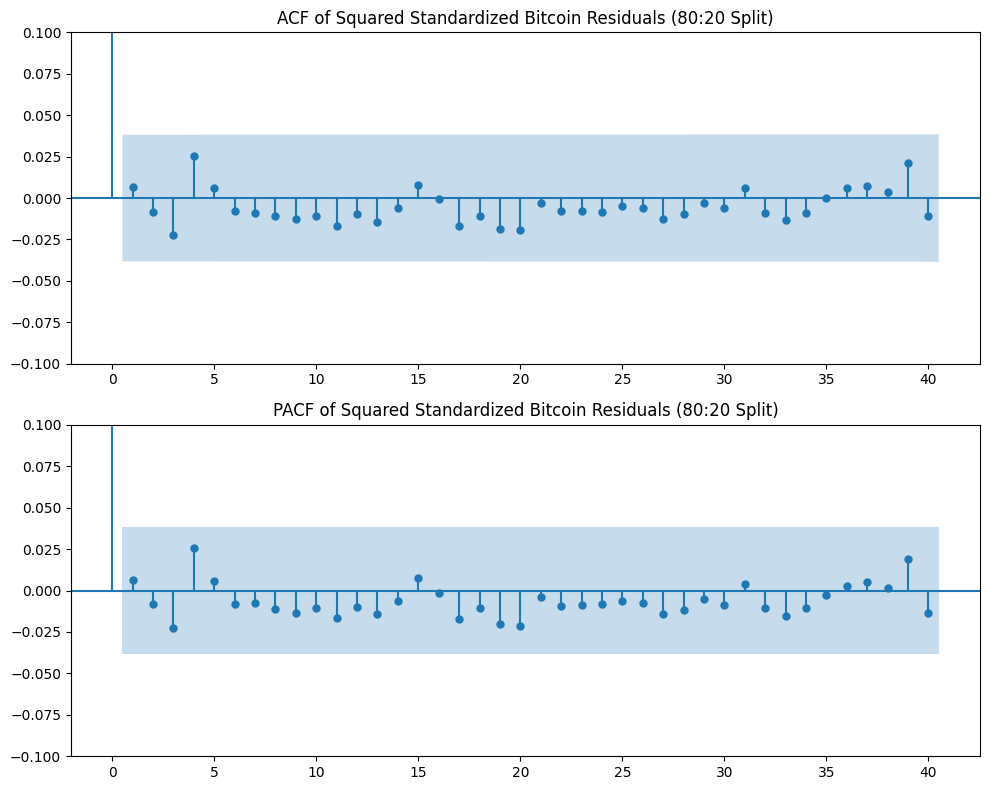

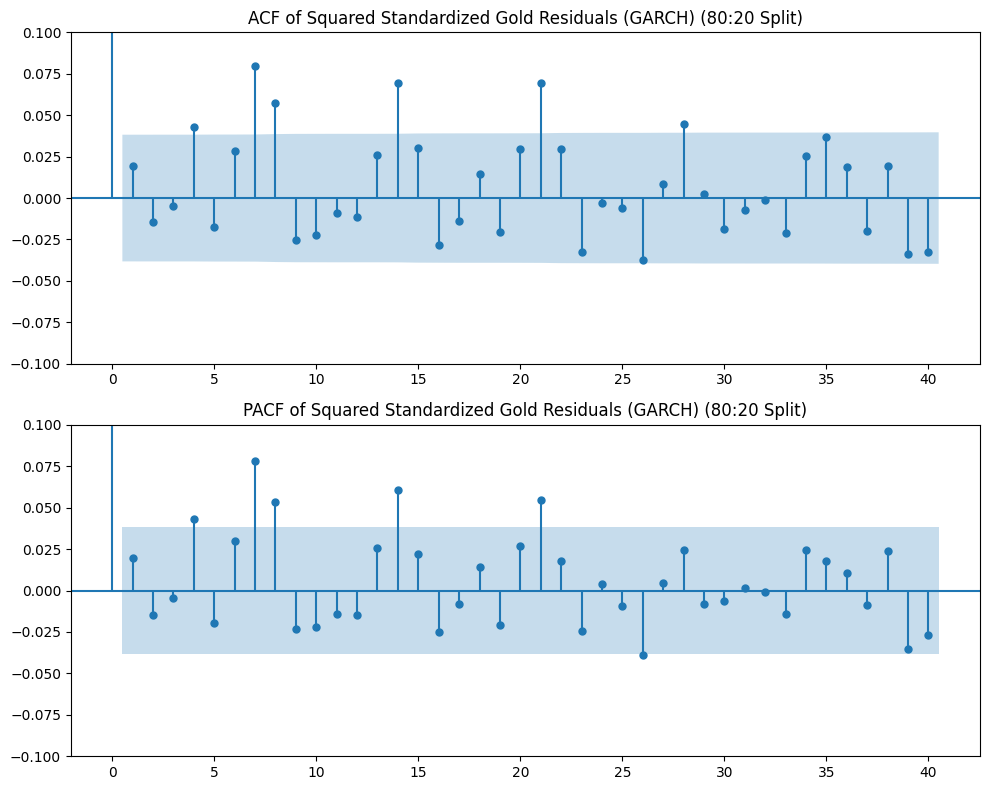

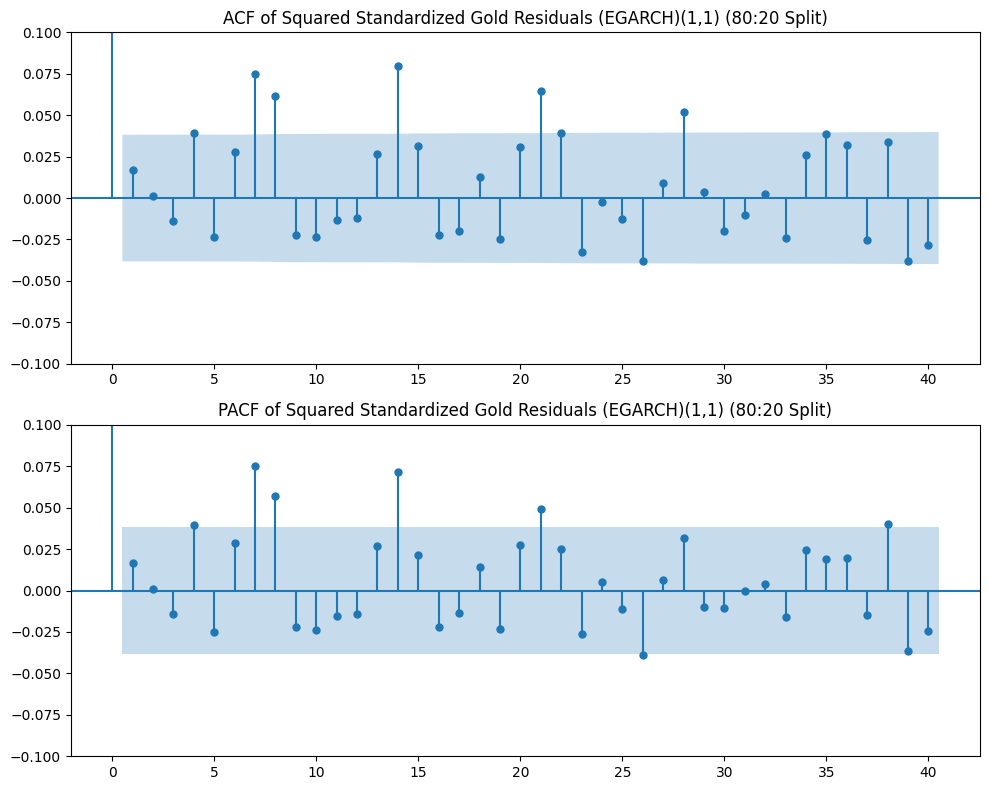

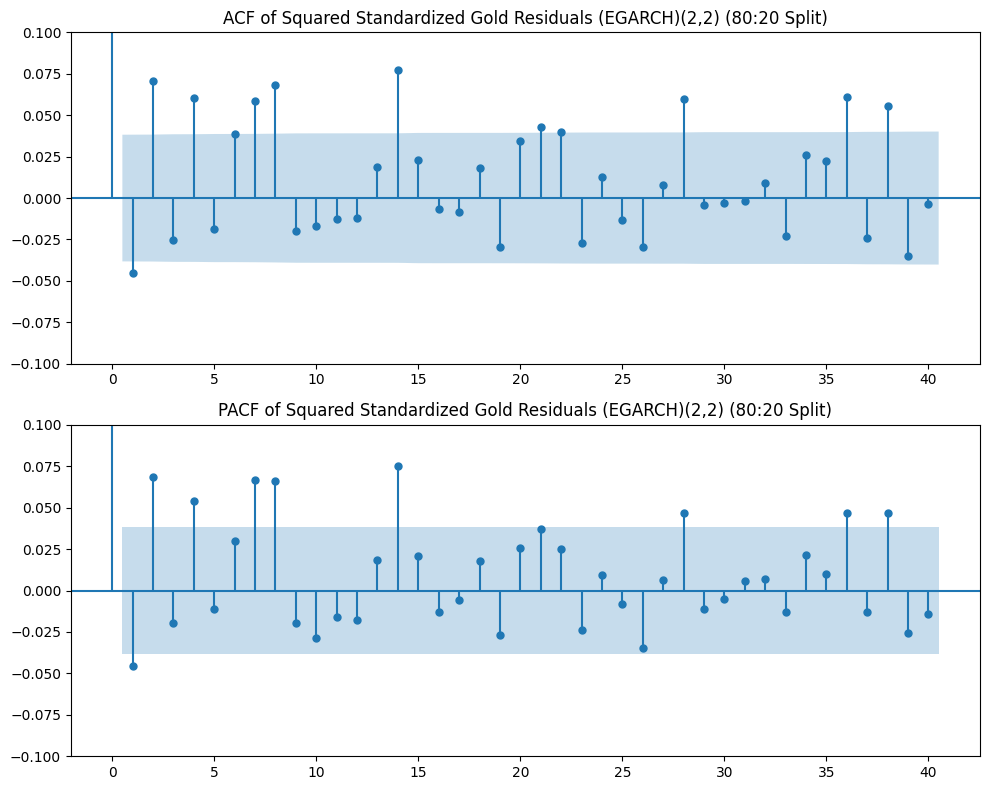

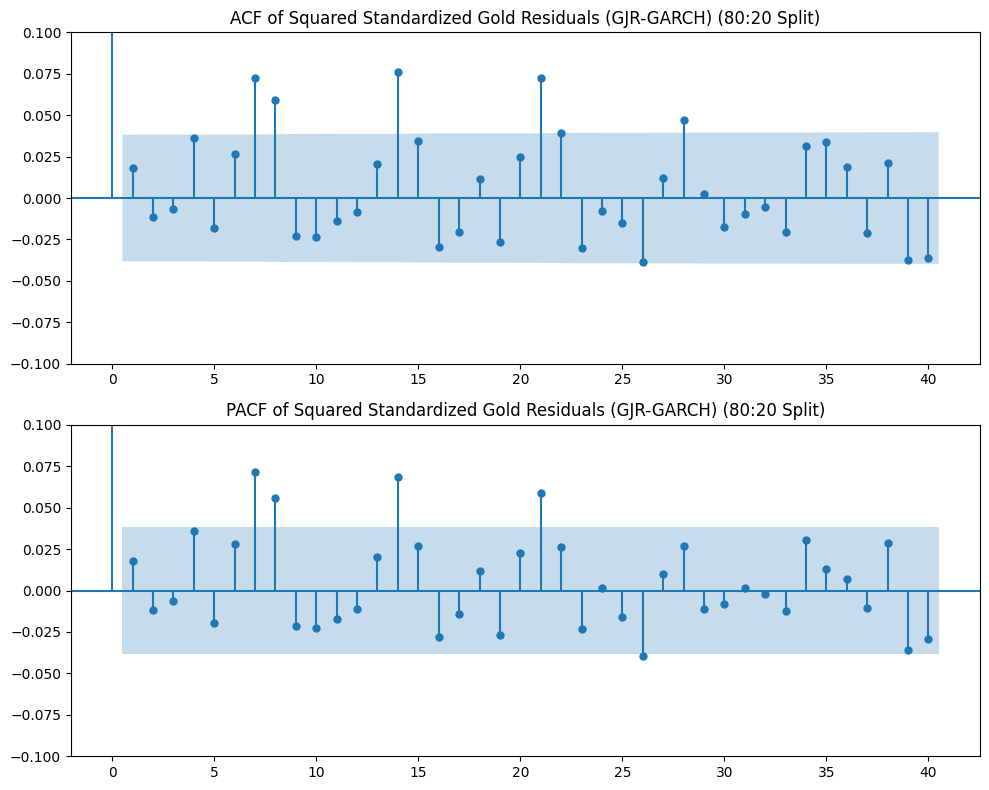

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# --- 1. Get the standardized residuals (80:20) ---
# ⭐ FIX: Use the _80 model results
btc_std_resid_80 = res_garch_btc_80.std_resid
gold_std_resid_80 = res_garch_gold_80.std_resid

# --- 2. Square the standardized residuals ---
# ⭐ FIX: Renamed variables
btc_std_resid_sq_80 = btc_std_resid_80**2
gold_std_resid_sq_80 = gold_std_resid_80**2

# --- 3. Plot ACF and PACF for Bitcoin (80:20) ---
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(btc_std_resid_sq_80.dropna(), ax=axes[0], lags=40)
plot_pacf(btc_std_resid_sq_80.dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Squared Standardized Bitcoin Residuals (80:20 Split)')
axes[1].set_title('PACF of Squared Standardized Bitcoin Residuals (80:20 Split)')
axes[0].set_ylim([-0.1, 0.1])
axes[1].set_ylim([-0.1, 0.1])
plt.tight_layout()
plt.show()

# --- 4. Plot ACF and PACF for Gold residuals (GARCH) (80:20) ---
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(gold_std_resid_sq_80.dropna(), ax=axes[0], lags=40)
plot_pacf(gold_std_resid_sq_80.dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Squared Standardized Gold Residuals (GARCH) (80:20 Split)')
axes[1].set_title('PACF of Squared Standardized Gold Residuals (GARCH) (80:20 Split)')
axes[0].set_ylim([-0.1, 0.1])
axes[1].set_ylim([-0.1, 0.1])
plt.tight_layout()
plt.show()

# --- 5. Get standardized residuals for other Gold models (80:20) ---
# ⭐ FIX: Use the _80 model results
gold_std_resid_egarch1_80 = res_egarch_gold1_80.std_resid
gold_std_resid_egarch2_80 = res_egarch_gold2_80.std_resid
gold_std_resid_gjr_garch_80 = res_gjr_garch_gold_80.std_resid

# --- 6. Square the standardized residuals ---
# ⭐ FIX: Renamed variables
gold_std_resid_sq_egarch1_80 = gold_std_resid_egarch1_80**2
gold_std_resid_sq_egarch2_80 = gold_std_resid_egarch2_80**2
gold_std_resid_sq_gjr_garch_80 = gold_std_resid_gjr_garch_80**2

# --- 7. Plot ACF and PACF for Gold residuals (EGARCH)(1,1) (80:20) ---
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(gold_std_resid_sq_egarch1_80.dropna(), ax=axes[0], lags=40)
plot_pacf(gold_std_resid_sq_egarch1_80.dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Squared Standardized Gold Residuals (EGARCH)(1,1) (80:20 Split)')
axes[1].set_title('PACF of Squared Standardized Gold Residuals (EGARCH)(1,1) (80:20 Split)')
axes[0].set_ylim([-0.1, 0.1])
axes[1].set_ylim([-0.1, 0.1])
plt.tight_layout()
plt.show()

# --- 8. Plot ACF and PACF for Gold residuals (EGARCH)(2,2) (80:20) ---
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(gold_std_resid_sq_egarch2_80.dropna(), ax=axes[0], lags=40)
plot_pacf(gold_std_resid_sq_egarch2_80.dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Squared Standardized Gold Residuals (EGARCH)(2,2) (80:20 Split)')
axes[1].set_title('PACF of Squared Standardized Gold Residuals (EGARCH)(2,2) (80:20 Split)')
axes[0].set_ylim([-0.1, 0.1])
axes[1].set_ylim([-0.1, 0.1])
plt.tight_layout()
plt.show()

# --- 9. Plot ACF and PACF for Gold residuals (GJR-GARCH) (80:20) ---
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(gold_std_resid_sq_gjr_garch_80.dropna(), ax=axes[0], lags=40)
plot_pacf(gold_std_resid_sq_gjr_garch_80.dropna(), ax=axes[1], lags=40)
axes[0].set_title('ACF of Squared Standardized Gold Residuals (GJR-GARCH) (80:20 Split)')
axes[1].set_title('PACF of Squared Standardized Gold Residuals (GJR-GARCH) (80:20 Split)')
axes[0].set_ylim([-0.1, 0.1])
axes[1].set_ylim([-0.1, 0.1])
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.stattools import jarque_bera

# --- Perform Jarque-Bera test on 80:20 standardized Bitcoin residuals ---
# ⭐ FIX: Use the _80 variable
jb_btc_80 = jarque_bera(btc_std_resid_80.dropna())

# ⭐ FIX: Updated title
print("--- Jarque-Bera Test: Standardized Bitcoin Residuals (80:20 Split) ---")
print(f"JB Statistic: {jb_btc_80[0]:.6f}")
print(f"p-value : {jb_btc_80[1]:.6f}")
print(f"Skewness : {jb_btc_80[2]:.6f}")
print(f"Kurtosis : {jb_btc_80[3]:.6f}")
print("→ Normal Distribution ✅" if jb_btc_80[1] > 0.05 else "→ Non-normal Distribution ❌")

# --- Perform Jarque-Bera test on 80:20 standardized Gold residuals ---
# ⭐ FIX: Use the _80 variable
jb_gold_80 = jarque_bera(gold_std_resid_80.dropna())

# ⭐ FIX: Updated title
print("\n--- Jarque-Bera Test: Standardized Gold Residuals (80:20 Split) ---")
print(f"JB Statistic: {jb_gold_80[0]:.6f}")
print(f"p-value : {jb_gold_80[1]:.6f}")
print(f"Skewness : {jb_gold_80[2]:.6f}")
print(f"Kurtosis : {jb_gold_80[3]:.6f}")
print("→ Normal Distribution ✅" if jb_gold_80[1] > 0.05 else "→ Non-normal Distribution ❌")

--- Jarque-Bera Test: Standardized Bitcoin Residuals (80:20 Split) ---
JB Statistic: 25901.318549
p-value : 0.000000
Skewness : -0.790129
Kurtosis : 18.295572
→ Non-normal Distribution ❌

--- Jarque-Bera Test: Standardized Gold Residuals (80:20 Split) ---
JB Statistic: 3349.292203
p-value : 0.000000
Skewness : -0.233861
Kurtosis : 8.509695
→ Non-normal Distribution ❌


In [ ]:
# --- 1. Set the forecast horizon (80:20) ---
# ⭐ FIX: Use the _80 test data length
horizon_len_80 = len(test_data_80)

# --- 2. Run the simulations for Bitcoin (80:20) ---
# ⭐ FIX: Use the _80 GARCH model
fc_btc_80 = res_garch_btc_80.forecast(horizon=horizon_len_80, method='simulation', simulations=1000)

# --- 3. Get the *average* variance across all 1000 simulations ---
# ⭐ CRITICAL FIX: Use axis=0 to average the simulations
btc_volatility_forecast_80 = fc_btc_80.variance.mean(axis=0)

# --- 4. Rescale ---
btc_volatility_forecast_80 = btc_volatility_forecast_80 * (1/100)**2

# ⭐ FIX: Updated title
print("Bitcoin Volatility Forecast (GARCH) (80:20 Split):")
display(btc_volatility_forecast_80)

Bitcoin Volatility Forecast (GARCH) (80:20 Split):


h.001    0.001973
h.002    0.002008
h.003    0.002008
h.004    0.002024
h.005    0.001998
           ...   
h.654    0.002484
h.655    0.002721
h.656    0.002617
h.657    0.002496
h.658    0.002564
Length: 658, dtype: float64

In [ ]:
# --- 1. Set the forecast horizon (80:20) ---
# (This variable should already exist from the block above)
# horizon_len_80 = len(test_data_80)

# --- 2. Run the simulations for Gold (80:20) ---
# ⭐ FIX: Use the _80 GJR-GARCH model
fc_gold_gjr_80 = res_gjr_garch_gold_80.forecast(horizon=horizon_len_80, method='simulation', simulations=1000)

# --- 3. Get the *average* variance across all 1000 simulations ---
# ⭐ CRITICAL FIX: Use axis=0 to average the simulations
gold_vol_forecast_gjr_80 = fc_gold_gjr_80.variance.mean(axis=0)

# --- 4. Rescale ---
gold_vol_forecast_gjr_80 = gold_vol_forecast_gjr_80 * (1/100)**2

# ⭐ FIX: Updated title
print("\nGold Volatility Forecast (GJR-GARCH) (80:20 Split):")
display(gold_vol_forecast_gjr_80)


Gold Volatility Forecast (GJR-GARCH) (80:20 Split):


h.001    0.000131
h.002    0.000130
h.003    0.000130
h.004    0.000130
h.005    0.000130
           ...   
h.654    0.000158
h.655    0.000159
h.656    0.000157
h.657    0.000158
h.658    0.000157
Length: 658, dtype: float64

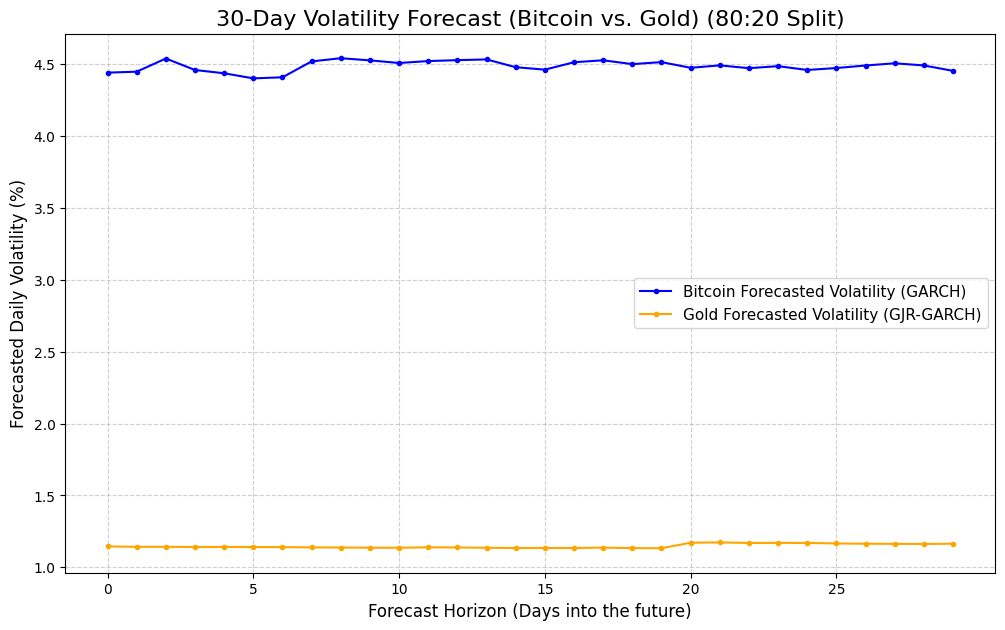

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. SET FORECAST HORIZON (80:20) ---
# ⭐ FIX: Use the _80 test data
horizon_len_80 = len(test_data_80)

# --- 2. RUN BITCOIN FORECAST (GARCH 80:20) ---
# ⭐ FIX: Use the _80 GARCH model
fc_btc_80 = res_garch_btc_80.forecast(horizon=horizon_len_80, method='simulation', simulations=1000)
btc_vol_forecast_series_80 = fc_btc_80.variance.mean(axis=0)

# --- 3. RUN GOLD FORECAST (GJR-GARCH 80:20) ---
# ⭐ FIX: Use the _80 GJR-GARCH model
fc_gold_gjr_80 = res_gjr_garch_gold_80.forecast(horizon=horizon_len_80, method='simulation', simulations=1000)
gold_vol_forecast_series_80 = fc_gold_gjr_80.variance.mean(axis=0)

# --- 4. RESCALE AND CONVERT TO % VOLATILITY ---
# Rescale the variance from (return*100)^2 back to return^2
btc_variance_rescaled_80 = btc_vol_forecast_series_80 * (1/100)**2
gold_variance_rescaled_80 = gold_vol_forecast_series_80 * (1/100)**2

# Convert variance to % volatility (sqrt * 100)
btc_vol_pct_80 = np.sqrt(btc_variance_rescaled_80) * 100
gold_vol_pct_80 = np.sqrt(gold_variance_rescaled_80) * 100

# --- 5. CREATE THE FINAL 30-DAY PLOT (80:20) ---
days_to_plot = 30

plt.figure(figsize=(12, 7))

# Plot the first 30 days
# ⭐ FIX: Use the _80 volatility data
plt.plot(btc_vol_pct_80.values[:days_to_plot], label='Bitcoin Forecasted Volatility (GARCH)', color='blue', marker='.')
plt.plot(gold_vol_pct_80.values[:days_to_plot], label='Gold Forecasted Volatility (GJR-GARCH)', color='orange', marker='.')

# Add Labels and Title
# ⭐ FIX: Updated title
plt.title('30-Day Volatility Forecast (Bitcoin vs. Gold) (80:20 Split)', fontsize=16)
plt.xlabel('Forecast Horizon (Days into the future)', fontsize=12)
plt.ylabel('Forecasted Daily Volatility (%)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.arange(0, days_to_plot, 5)) # Make the x-axis labels cleaner

plt.show()

In [ ]:
import pandas as pd

# Set the number of days you want to display
days_to_display = 30

# --- Display the first 30 data points (80:20 Split) ---

print("--- Bitcoin Forecasted Daily Volatility (%) [First 30 Days] (80:20 Split) ---")
# ⭐ FIX: Use the _80 variable
display(pd.DataFrame(btc_vol_pct_80.iloc[:days_to_display], columns=['Forecasted Volatility (%)']))

print("\n--- Gold Forecasted Daily Volatility (%) [First 30 Days] (80:20 Split) ---")
# ⭐ FIX: Use the _80 variable
display(pd.DataFrame(gold_vol_pct_80.iloc[:days_to_display], columns=['Forecasted Volatility (%)']))

--- Bitcoin Forecasted Daily Volatility (%) [First 30 Days] (80:20 Split) ---


Forecasted Volatility (%)
h.001                   4.441532
h.002                   4.448196
h.003                   4.539851
h.004                   4.459818
h.005                   4.437134
h.006                   4.401626
h.007                   4.409245
h.008                   4.519798
h.009                   4.541846
h.010                   4.526882
h.011                   4.508640
h.012                   4.522102
h.013                   4.528399
h.014                   4.533457
h.015                   4.479424
h.016                   4.462327
h.017                   4.513804
h.018                   4.527509
h.019                   4.500760
h.020                   4.514850
h.021                   4.475243
h.022                   4.492039
h.023                   4.472526
h.024                   4.486733
h.025                   4.460056
h.026                   4.473572
h.027                   4.491168
h.028                   4.506573
h.029                   4.491630
h.030                   4.453937


--- Gold Forecasted Daily Volatility (%) [First 30 Days] (80:20 Split) ---


Forecasted Volatility (%)
h.001                   1.145811
h.002                   1.142911
h.003                   1.142840
h.004                   1.141537
h.005                   1.142251
h.006                   1.141463
h.007                   1.140940
h.008                   1.138802
h.009                   1.138050
h.010                   1.136874
h.011                   1.136437
h.012                   1.139463
h.013                   1.138300
h.014                   1.136318
h.015                   1.134683
h.016                   1.134923
h.017                   1.134772
h.018                   1.137502
h.019                   1.133954
h.020                   1.133165
h.021                   1.171447
h.022                   1.173464
h.023                   1.169872
h.024                   1.170258
h.025                   1.170089
h.026                   1.166297
h.027                   1.164544
h.028                   1.163487
h.029                   1.162827
h.030                   1.164615

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# --- 1. SET PARAMETERS ---
# ⭐ FIX: Renamed variable
data_to_use_80 = merged['Bitcoin_logret'].values.reshape(-1, 1)
window_size = 30 # window_size can stay the same

# --- 2. SCALE THE DATA ---
# ⭐ FIX: Renamed variables
scaler_80 = MinMaxScaler(feature_range=(0, 1))
scaled_data_80 = scaler_80.fit_transform(data_to_use_80)

# --- 3. CREATE SEQUENCES (X, y) ---
X = []
y = []

# ⭐ FIX: Corrected indentation
for i in range(window_size, len(scaled_data_80)):
    X.append(scaled_data_80[i-window_size:i, 0])
    y.append(scaled_data_80[i, 0])

X, y = np.array(X), np.array(y)

# --- 4. SPLIT INTO TRAINING (80%) AND TESTING (20%) ---
# ⭐ FIX: Changed to 0.80 and renamed variables
train_size_80 = int(len(X) * 0.80)
test_size_80 = len(X) - train_size_80

X_tr_80, X_test_80 = X[0:train_size_80], X[train_size_80:len(X)]
y_tr_80, y_test_80 = y[0:train_size_80], y[train_size_80:len(y)]

# --- 5. RESHAPE FOR LSTM [samples, timesteps, features] ---
# ⭐ FIX: Renamed variables
X_tr_80 = np.reshape(X_tr_80, (X_tr_80.shape[0], window_size, 1))
X_test_80 = np.reshape(X_test_80, (X_test_80.shape[0], window_size, 1))

# --- 6. PRINT SHAPES TO CONFIRM ---
# ⭐ FIX: Updated print statements
print("--- Data Preparation Complete (80:20 Split) ---")
print(f"Window size (timesteps): {window_size}")
print(f"X_train shape: {X_tr_80.shape}")
print(f"y_train shape: {y_tr_80.shape}")
print(f"X_test shape: {X_test_80.shape}")
print(f"y_test shape: {y_test_80.shape}")

--- Data Preparation Complete (80:20 Split) ---
Window size (timesteps): 30
X_train shape: (2605, 30, 1)
y_train shape: (2605,)
X_test shape: (652, 30, 1)
y_test shape: (652,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping

# --- 1. BUILD THE LSTM MODEL (80:20) ---
# ⭐ FIX: Renamed model
model_80 = Sequential()

# Layer 1: LSTM layer
# ⭐ FIX: Use window_size (which was 30) for the input shape
model_80.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, 1)))
model_80.add(Dropout(0.2)) # Dropout helps prevent overfitting

# Layer 2: Another LSTM layer
model_80.add(LSTM(units=50, return_sequences=False)) # False because it's the last LSTM layer
model_80.add(Dropout(0.2))

# Layer 3: The Output Layer
model_80.add(Dense(units=1))

# --- 2. COMPILE THE MODEL ---
model_80.compile(optimizer='adam', loss='mean_squared_error')

# --- 3. TRAIN THE MODEL ("fit" the data) ---
# ⭐ FIX: Add EarlyStopping for better training
es_80 = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# ⭐ FIX: Updated title
print("\n--- Starting Model Training (80:20 Split) ---")

# ⭐ FIX: Use all _80 variables
history_80 = model_80.fit(
    X_tr_80,
    y_tr_80,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_80, y_test_80), # Use the 80:20 test set
    callbacks=[es_80], # Add the callback
    verbose=1
)

print("--- Model Training Complete ---")

# --- 4. DISPLAY THE MODEL STRUCTURE ---
model_80.summary()


--- Starting Model Training (80:20 Split) ---
Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - loss: 0.0715 - val_loss: 0.0012
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0078 - val_loss: 0.0014
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0069 - val_loss: 0.0025
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0069 - val_loss: 0.0012
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0067 - val_loss: 0.0015
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0063 - val_loss: 0.0013
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0059 - val_loss: 0.0016
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0057 - val_loss: 0.0013
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0057 - val_loss: 0.0015
--- Model Training Complete ---


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                  │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step
Test RMSE (80:20 Split): 0.025061


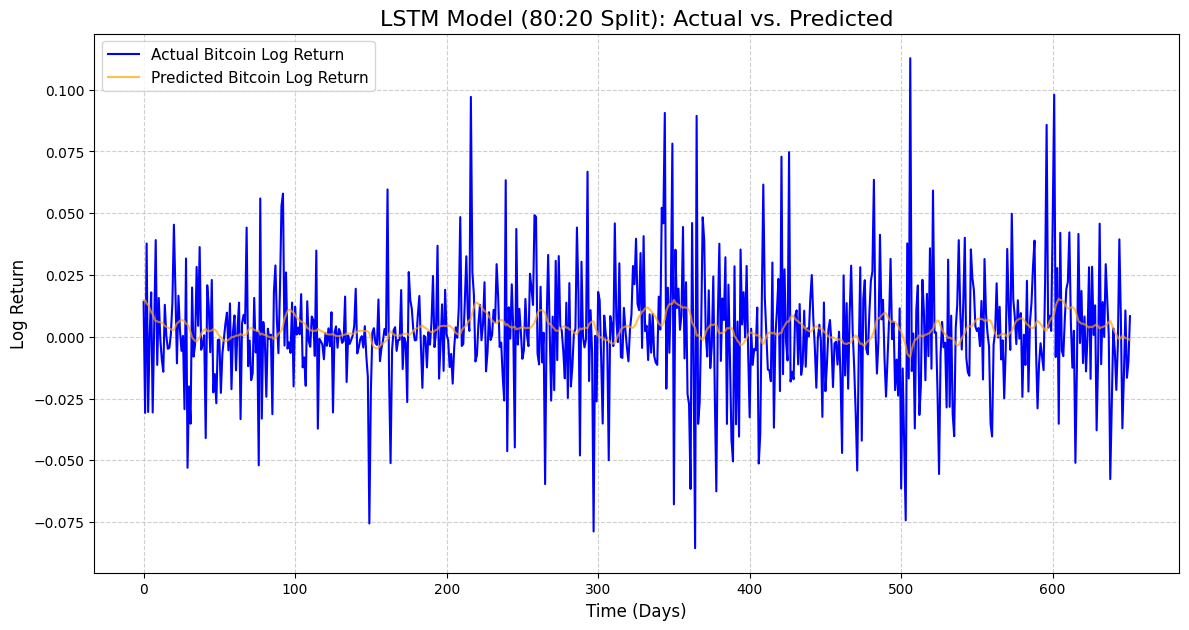

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# --- 1. MAKE PREDICTIONS ---
# ⭐ FIX: Use your new 80:20 model and test set
predicted_scaled_80 = model_80.predict(X_test_80)

# --- 2. UN-SCALE THE DATA ---
# ⭐ FIX: Use your new scaler_80 object

# Un-scale the predictions
predictions_80 = scaler_80.inverse_transform(predicted_scaled_80)

# Un-scale the *actual* values so we can compare
# ⭐ FIX: Use scaler_80 and y_test_80
actual_values_80 = scaler_80.inverse_transform(y_test_80.reshape(-1, 1))

# --- 3. CALCULATE ERROR (RMSE) ---
# ⭐ FIX: Use the new 80:20 variables
rmse_80 = np.sqrt(mean_squared_error(actual_values_80, predictions_80))
print(f'Test RMSE (80:20 Split): {rmse_80:.6f}')

# --- 4. PLOT THE RESULTS ---
# This is the most important visual.
plt.figure(figsize=(14, 7))
# ⭐ FIX: Use the new 80:20 variables
plt.plot(actual_values_80, color='blue', label='Actual Bitcoin Log Return')
plt.plot(predictions_80, color='orange', label='Predicted Bitcoin Log Return', alpha=0.7)
# ⭐ FIX: Updated title
plt.title('LSTM Model (80:20 Split): Actual vs. Predicted', fontsize=16)
plt.xlabel('Time (Days)', fontsize=12)
plt.ylabel('Log Return', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━

Forecasted Log Return
Day                       
1                -0.001186
2                -0.000982
3                -0.000740
4                -0.000479
5                -0.000197
6                 0.000078
7                 0.000357
8                 0.000627
9                 0.000897
10                0.001150
11                0.001382
12                0.001617
13                0.001834
14                0.002044
15                0.002239
16                0.002427
17                0.002608
18                0.002789
19                0.002954
20                0.003104
21                0.003249
22                0.003390
23                0.003521
24                0.003638
25                0.003756
26                0.003876
27                0.003985
28                0.004084
29                0.004183
30                0.004276

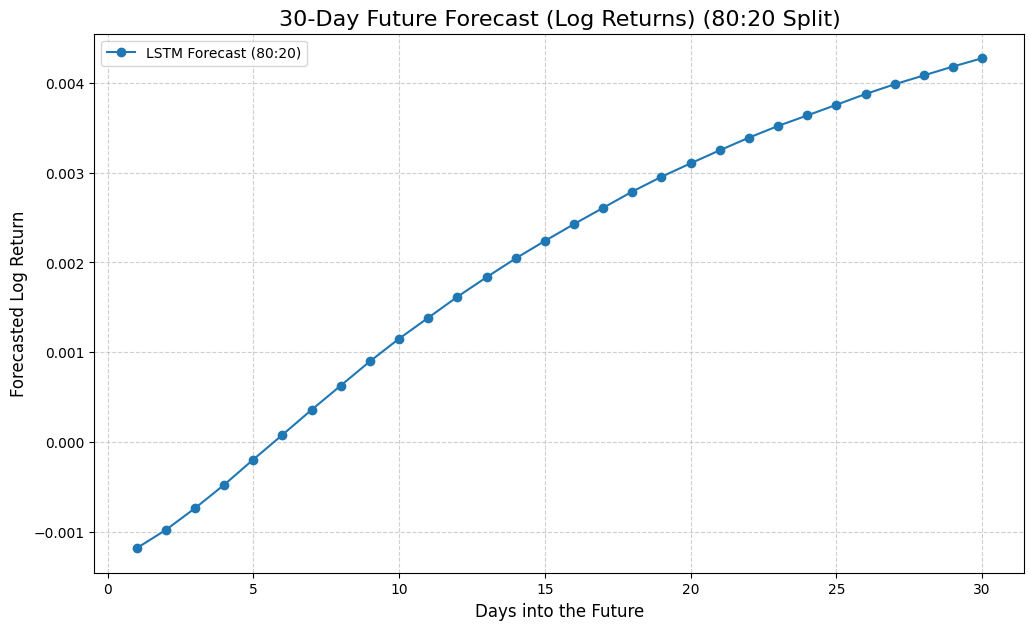

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. SET FORECAST PARAMETERS ---
n_future_days_80 = 30
# ⭐ FIX: Make sure window_size is defined (it was 30)
window_size_80 = 30

# --- 2. GET THE LAST WINDOW OF REAL DATA (from 80:20 scaled data) ---
# ⭐ FIX: Use scaled_data_80
last_real_window_80 = scaled_data_80[-window_size_80:]

# Reshape it to be the input for the model
current_window_80 = last_real_window_80.reshape(1, window_size_80, 1)

# --- 3. ITERATIVE FORECASTING (Predict 30 days) ---
future_predictions_scaled_80 = [] # Store the scaled predictions

for i in range(n_future_days_80):
    # 1. Predict the next day
    # ⭐ FIX: Use model_80
    next_pred_scaled_80 = model_80.predict(current_window_80)[0, 0]

    # 2. Store the prediction
    future_predictions_scaled_80.append(next_pred_scaled_80)

    # 3. Update the window for the next loop
    next_pred_reshaped_80 = np.array([[next_pred_scaled_80]])

    # Remove the *first* day and add the *new prediction* to the end
    current_window_80 = np.append(current_window_80[:, 1:, :], next_pred_reshaped_80.reshape(1, 1, 1), axis=1)

# --- 4. UN-SCALE THE FINAL FORECAST ---
# ⭐ FIX: Use scaler_80
future_predictions_80 = scaler_80.inverse_transform(np.array(future_predictions_scaled_80).reshape(-1, 1))

# --- 5. DISPLAY THE 30-DAY DATA (80:20 Split) ---
print(f"--- LSTM 30-Day Future Forecast (Log Returns) (80:20 Split) ---")

# Create a nice DataFrame to display
# ⭐ FIX: Renamed variables
forecast_df_80 = pd.DataFrame(future_predictions_80,
                           columns=['Forecasted Log Return'],
                           index=np.arange(1, n_future_days_80 + 1))
forecast_df_80.index.name = 'Day'
display(forecast_df_80)

# --- 6. PLOT THE 30-DAY FORECAST ---
plt.figure(figsize=(12, 7))
# ⭐ FIX: Use the _80 dataframe
plt.plot(forecast_df_80.index, forecast_df_80['Forecasted Log Return'], marker='o', label='LSTM Forecast (80:20)')
# ⭐ FIX: Updated title
plt.title('30-Day Future Forecast (Log Returns) (80:20 Split)', fontsize=16)
plt.xlabel('Days into the Future', fontsize=12)
plt.ylabel('Forecasted Log Return', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

--- Data Shapes (80:20 Split) ---
X_train: (2605, 30, 1)
X_test: (652, 30, 1)

--- Starting Model Training (80:20 Split) ---
Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0058 - val_loss: 0.0017
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 8.8216e-04 - val_loss: 0.0034
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 8.3193e-04 - val_loss: 0.0018
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 7.3862e-04 - val_loss: 0.0015
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 7.0209e-04 - val_loss: 0.0013
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 6.1972e-04 - val_loss: 0.0011
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 5.7967e-04 - val_loss: 0.0024
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 5.5932e-04 - val_loss: 0.0030
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 5.3006e-04 - val_loss: 8.9044e-04
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 6.4133e-04 - 

Set      MAE         MSE     RMSE  MAPE(%)
0  Train  1009.35  2483850.21  1576.02    20.40
1   Test  2115.94  9961776.26  3156.23     3.72

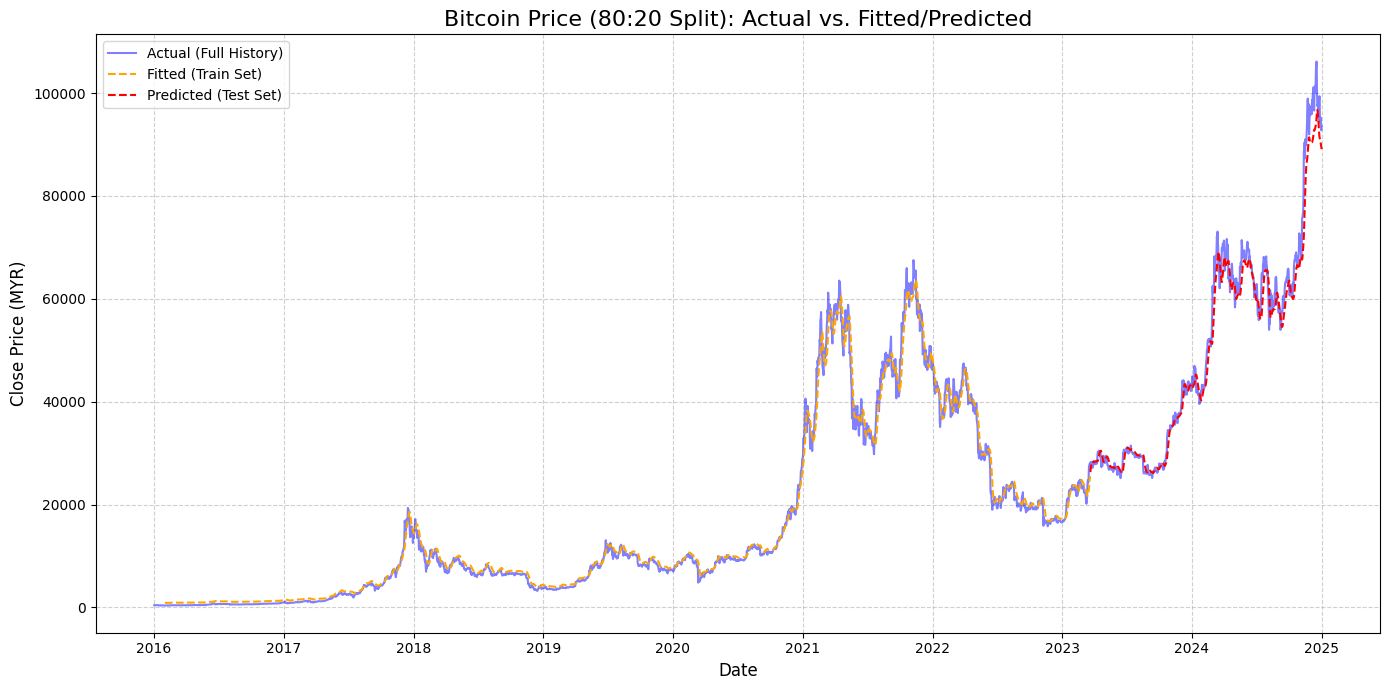

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# --- 1. SET UP DATA & PARAMETERS ---
# Assuming 'merged_df' is loaded from your data prep step
df_80 = merged.copy() # Renamed
close_col_80 = 'Bitcoin' # Using raw 'Bitcoin' price
date_col_80 = 'Date'
window_size_80 = 30

# Ensure date column is datetime
df_80[date_col_80] = pd.to_datetime(df_80[date_col_80])

# --- 2. SCALING & DATA PREPARATION ---
data_to_use_80 = df_80[close_col_80].values.reshape(-1, 1) # Renamed

scaler_80 = MinMaxScaler(feature_range=(0, 1)) # Renamed
scaled_data_80 = scaler_80.fit_transform(data_to_use_80) # Renamed

# --- 3. CREATE SEQUENCES ---
def make_sequences_80(data, window_size): # Renamed
    X, y = [], []
    # ⭐ FIX: Corrected indentation
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_80, y_80 = make_sequences_80(scaled_data_80, window_size_80) # Renamed

# --- 4. TRAIN / TEST SPLIT (80% Train, 20% Test) ---
# ⭐ CHANGE: Updated to 80:20 split
train_split_idx_80 = int(len(X_80) * 0.80)

X_tr_80, y_tr_80 = X_80[:train_split_idx_80], y_80[:train_split_idx_80] # Renamed
X_test_80, y_test_80 = X_80[train_split_idx_80:], y_80[train_split_idx_80:] # Renamed

# --- 5. RESHAPE FOR LSTM [samples, timesteps, features] ---
X_tr_80 = np.reshape(X_tr_80, (X_tr_80.shape[0], X_tr_80.shape[1], 1)) # Renamed
X_test_80 = np.reshape(X_test_80, (X_test_80.shape[0], X_test_80.shape[1], 1)) # Renamed

print("--- Data Shapes (80:20 Split) ---") # Updated title
print(f"X_train: {X_tr_80.shape}") # Renamed
print(f"X_test: {X_test_80.shape}") # Renamed

# --- 6. BUILD & TRAIN MODEL (from your senior's code) ---
tf.random.set_seed(42)
model_80 = Sequential([ # Renamed
    LSTM(64, return_sequences=True, input_shape=(window_size_80, 1)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model_80.compile(optimizer="adam", loss="mse") # Renamed

# Use EarlyStopping, monitoring the test set loss
es_80 = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True) # Renamed

print("\n--- Starting Model Training (80:20 Split) ---") # Updated title
history_80 = model_80.fit( # Renamed
    X_tr_80, y_tr_80, # Renamed
    epochs=50,
    batch_size=32,
    validation_data=(X_test_80, y_test_80), # Renamed
    callbacks=[es_80], # Renamed
    verbose=1
)
print("--- Model Training Complete ---")

# --- 7. EVALUATION & METRICS ---
def inverse_and_metrics_80(y_true_scaled, y_pred_scaled, scaler_obj): # Renamed
    y_true = scaler_obj.inverse_transform(y_true_scaled.reshape(-1, 1)).flatten()
    y_pred = scaler_obj.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100
    return y_true, y_pred, mae, mse, rmse, mape

# Get predictions (scaled)
y_pred_tr_skala_80 = model_80.predict(X_tr_80, verbose=0).flatten() # Renamed
y_pred_test_skala_80 = model_80.predict(X_test_80, verbose=0).flatten() # Renamed

# Get metrics (un-scaled)
y_true_tr_80, y_pred_tr_80, mae_tr_80, mse_tr_80, rmse_tr_80, mape_tr_80 = inverse_and_metrics_80(y_tr_80, y_pred_tr_skala_80, scaler_80) # Renamed
y_true_test_80, y_pred_test_80, mae_te_80, mse_te_80, rmse_te_80, mape_te_80 = inverse_and_metrics_80(y_test_80, y_pred_test_skala_80, scaler_80) # Renamed

# Build metrics table (Train/Test only)
metrics_df_80 = pd.DataFrame({ # Renamed
    "Set": ["Train", "Test"],
    "MAE": [mae_tr_80, mae_te_80], # Renamed
    "MSE": [mse_tr_80, mse_te_80], # Renamed
    "RMSE": [rmse_tr_80, rmse_te_80], # Renamed
    "MAPE(%)": [mape_tr_80, mape_te_80] # Renamed
})

print("\n=== Performance Metrics (80:20 Split) ===") # Updated title
display(metrics_df_80.round(2)) # Renamed

# --- 8. PLOTTING (Full History Plot) ---

# Get the correct dates for each set
date_index_80 = df_80[date_col_80].iloc[window_size_80:] # Renamed
train_dates_80 = date_index_80.iloc[:train_split_idx_80] # Renamed
test_dates_80 = date_index_80.iloc[train_split_idx_80:] # Renamed

plt.figure(figsize=(14, 7))

# Plot 1: Full History
plt.plot(df_80[date_col_80], df_80[close_col_80], label="Actual (Full History)", color='blue', alpha=0.5) # Renamed

# Plot 2: Fitted (Train Set)
plt.plot(train_dates_80, y_pred_tr_80, label="Fitted (Train Set)", color='orange', linestyle='--') # Renamed

# Plot 3: Predicted (Test Set)
plt.plot(test_dates_80, y_pred_test_80, label="Predicted (Test Set)", color='red', linestyle='--') # Renamed

plt.title(f"{close_col_80} Price (80:20 Split): Actual vs. Fitted/Predicted", fontsize=16) # Updated title
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price (MYR)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


--- Data Shapes (Multivariate 80:20 Split) ---
X_train: (2605, 30, 2)
X_test: (652, 30, 2)

--- Starting Multivariate Model Training (80:20 Split) ---
Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0111 - val_loss: 0.0033
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 9.4145e-04 - val_loss: 0.0020
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 9.2936e-04 - val_loss: 0.0056
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 8.1162e-04 - val_loss: 0.0022
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 7.5178e-04 - val_loss: 0.0036
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 6.7100e-04 - val_loss: 0.0026
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 7.2046e-04 - val_loss: 9.3772e-04
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 5.9271e-04 - val_loss: 0.0042
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 5.9387e-04 - val_loss: 0.0050
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms

Set      MAE          MSE     RMSE  MAPE(%)
0  Train  1274.94   3609543.02  1899.88    23.44
1   Test  2285.74  10490673.63  3238.93     4.35

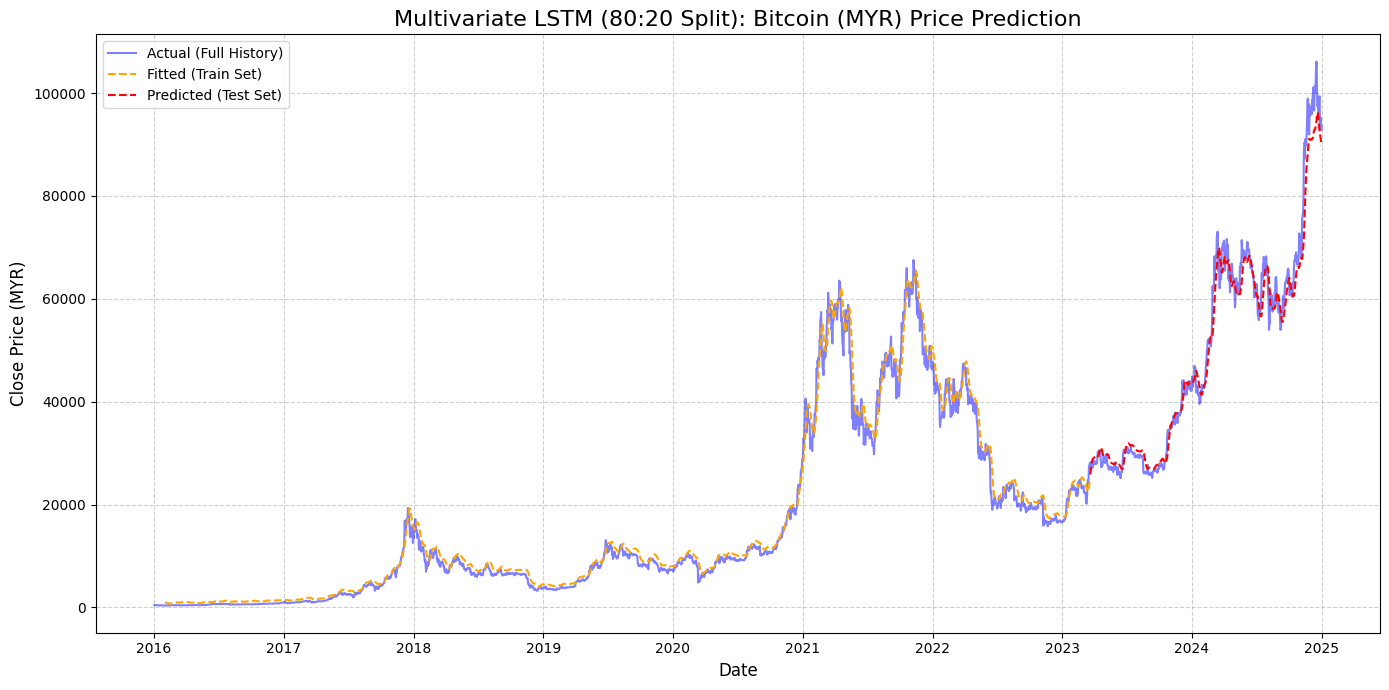

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# --- 1. SET UP FOR MULTIVARIATE LSTM ---
df_80 = merged.copy() # Renamed df
feature_cols_80 = ['Bitcoin', 'Gold'] # Renamed
target_col_80 = 'Bitcoin'
date_col_80 = 'Date'
window_size_80 = 30 # Renamed

# --- 2. SCALING ---
data_to_use_80 = df_80[feature_cols_80].values # Renamed
scaler_80 = MinMaxScaler(feature_range=(0, 1)) # Renamed
scaled_data_80 = scaler_80.fit_transform(data_to_use_80) # Renamed

# --- 3. CREATE SEQUENCES (Multivariate) ---
def make_sequences_multi_80(data, window_size): # Renamed function
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, :]) # All features for the window
        y.append(data[i, 0])               # Only the 1st col (Bitcoin) as target
    return np.array(X), np.array(y)

X_80, y_80 = make_sequences_multi_80(scaled_data_80, window_size_80) # Renamed

# --- 4. TRAIN / TEST SPLIT (80% Train, 20% Test) ---
# ⭐ CHANGE: Updated to 0.80 for 80:20 split
train_split_idx_80 = int(len(X_80) * 0.80)
X_tr_80, y_tr_80 = X_80[:train_split_idx_80], y_80[:train_split_idx_80] # Renamed
X_test_80, y_test_80 = X_80[train_split_idx_80:], y_80[train_split_idx_80:] # Renamed

# --- 5. RESHAPE FOR LSTM [samples, timesteps, features] ---
n_features_80 = len(feature_cols_80) # Renamed
# X_tr and X_test are already (samples, 30, 2)
print("\n--- Data Shapes (Multivariate 80:20 Split) ---") # Updated title
print(f"X_train: {X_tr_80.shape}") # Renamed
print(f"X_test: {X_test_80.shape}") # Renamed

# --- 7. BUILD & TRAIN MODEL ---
tf.random.set_seed(42)
model_80 = Sequential([ # Renamed model
    LSTM(64, return_sequences=True, input_shape=(window_size_80, n_features_80)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])
model_80.compile(optimizer="adam", loss="mse")
es_80 = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True) # Renamed

print("\n--- Starting Multivariate Model Training (80:20 Split) ---") # Updated title
history_80 = model_80.fit( # Renamed
    X_tr_80, y_tr_80, # Renamed
    epochs=50,
    batch_size=32,
    validation_data=(X_test_80, y_test_80), # Renamed
    callbacks=[es_80], # Renamed
    verbose=1
)
print("--- Model Training Complete ---")

# --- 8. EVALUATION & METRICS (Multivariate) ---
def inverse_and_metrics_multi_80(y_true_scaled, y_pred_scaled, scaler_obj): # Renamed function
    n_features = scaler_obj.n_features_in_

    pred_combined = np.zeros((len(y_pred_scaled), n_features))
    pred_combined[:, 0] = y_pred_scaled.flatten()
    y_pred = scaler_obj.inverse_transform(pred_combined)[:, 0]

    true_combined = np.zeros((len(y_true_scaled), n_features))
    true_combined[:, 0] = y_true_scaled.flatten()
    y_true = scaler_obj.inverse_transform(true_combined)[:, 0]

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100
    return y_true, y_pred, mae, mse, rmse, mape

y_pred_tr_skala_80 = model_80.predict(X_tr_80, verbose=0).flatten() # Renamed
y_pred_test_skala_80 = model_80.predict(X_test_80, verbose=0).flatten() # Renamed

y_true_tr_80, y_pred_tr_80, mae_tr_80, mse_tr_80, rmse_tr_80, mape_tr_80 = inverse_and_metrics_multi_80(y_tr_80, y_pred_tr_skala_80, scaler_80) # Renamed
y_true_test_80, y_pred_test_80, mae_te_80, mse_te_80, rmse_te_80, mape_te_80 = inverse_and_metrics_multi_80(y_test_80, y_pred_test_skala_80, scaler_80) # Renamed

metrics_df_80 = pd.DataFrame({ # Renamed
    "Set": ["Train", "Test"],
    "MAE": [mae_tr_80, mae_te_80],
    "MSE": [mse_tr_80, mse_te_80],
    "RMSE": [rmse_tr_80, rmse_te_80],
    "MAPE(%)": [mape_tr_80, mape_te_80]
})

print("\n=== Ringkasan Metrik (Multivariate 80:20 Split) ===") # Updated title
display(metrics_df_80.round(2))

# --- 9. PLOTTING (Full History Plot) ---
date_index_80 = df_80[date_col_80].iloc[window_size_80:] # Renamed
train_dates_80 = date_index_80.iloc[:train_split_idx_80] # Renamed
test_dates_80 = date_index_80.iloc[train_split_idx_80:] # Renamed

plt.figure(figsize=(14, 7))
plt.plot(df_80[date_col_80], df_80[target_col_80], label="Actual (Full History)", color='blue', alpha=0.5) # Renamed
plt.plot(train_dates_80, y_pred_tr_80, label="Fitted (Train Set)", color='orange', linestyle='--') # Renamed
plt.plot(test_dates_80, y_pred_test_80, label="Predicted (Test Set)", color='red', linestyle='--') # Renamed
plt.title(f"Multivariate LSTM (80:20 Split): Bitcoin (MYR) Price Prediction", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price (MYR)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


--- Data Shapes (Multivariate Gold 80:20 Split) ---
X_train: (2606, 30, 2)
X_test:  (652, 30, 2)

--- Starting Multivariate Model Training (Predicting Gold) (80:20 Split) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0125 - val_loss: 0.0065
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0012 - val_loss: 0.0031
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 9.1630e-04 - val_loss: 0.0040
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 9.6022e-04 - val_loss: 0.0023
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 8.9015e-04 - val_loss: 0.0077
--- Model Training Complete ---

=== Ringkasan Metrik (Multivariate Gold 80:20 Split) ===


Set     MAE       MSE    RMSE  MAPE(%)
0  Train  118.66  22438.24  149.79     1.84
1   Test  207.47  73466.88  271.05     1.98

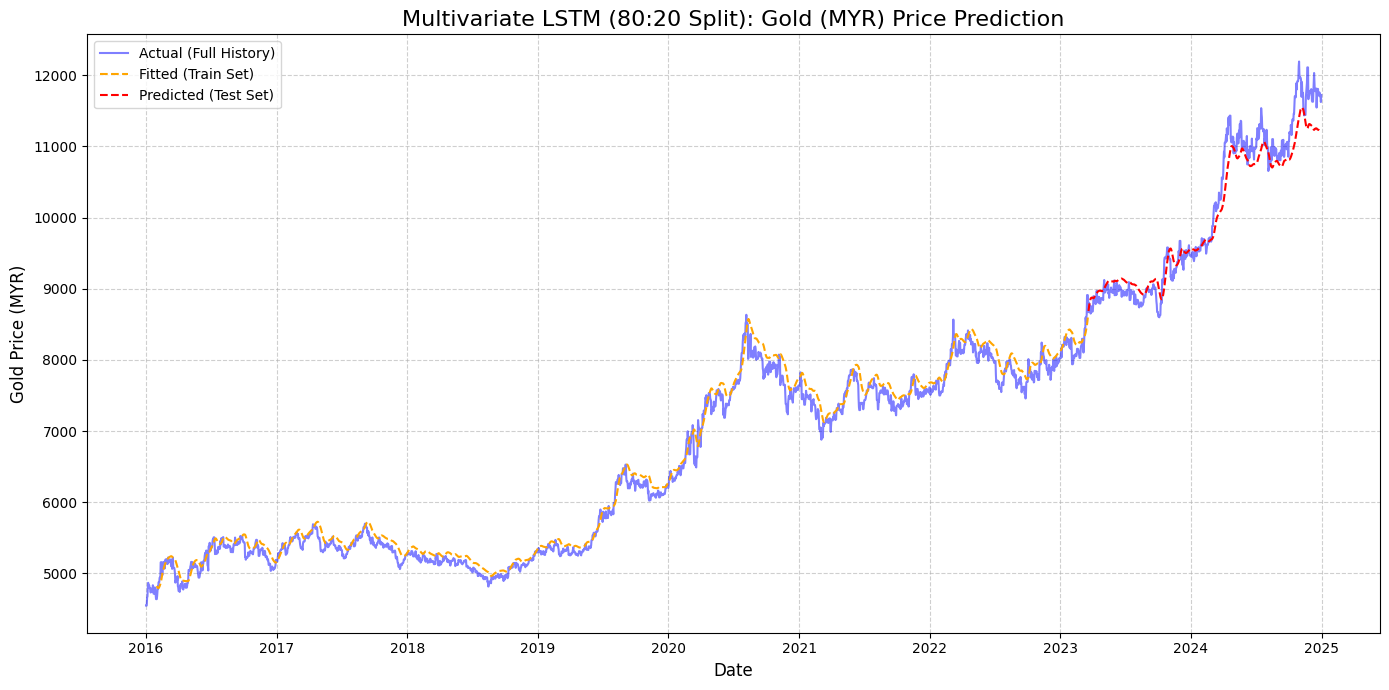

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
# --- 3. SET UP FOR MULTIVARIATE LSTM (Predicting Gold) ---
df_gold_80 = merged.copy() # Renamed df
feature_cols_gold_80 = ['Bitcoin', 'Gold']
target_col_gold_80 = 'Gold'
date_col_gold_80 = 'Date'
window_size_gold_80 = 30

# --- 4. SCALING ---
data_to_use_gold_80 = df_gold_80[feature_cols_gold_80].values
scaler_gold_80 = MinMaxScaler(feature_range=(0, 1)) # Renamed scaler
scaled_data_gold_80 = scaler_gold_80.fit_transform(data_to_use_gold_80)

# --- 5. CREATE SEQUENCES (Multivariate for Gold) ---
def make_sequences_multi_gold_80(data, window_size): # Renamed function
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, :]) # All features (BTC & Gold)
        y.append(data[i, 1])               # Target is col 1 (Gold)
    return np.array(X), np.array(y)

X_gold_80, y_gold_80 = make_sequences_multi_gold_80(scaled_data_gold_80, window_size_gold_80) # Renamed

# --- 6. TRAIN / TEST SPLIT (80% Train, 20% Test) ---
# ⭐ CHANGE: Updated to 0.80 for 80:20 split
train_split_idx_gold_80 = int(len(X_gold_80) * 0.80)
X_tr_gold_80, y_tr_gold_80 = X_gold_80[:train_split_idx_gold_80], y_gold_80[:train_split_idx_gold_80] # Renamed
X_test_gold_80, y_test_gold_80 = X_gold_80[train_split_idx_gold_80:], y_gold_80[train_split_idx_gold_80:] # Renamed

# --- 7. RESHAPE FOR LSTM [samples, timesteps, features] ---
n_features_gold_80 = len(feature_cols_gold_80)
print("\n--- Data Shapes (Multivariate Gold 80:20 Split) ---") # Updated title
print(f"X_train: {X_tr_gold_80.shape}") # Renamed
print(f"X_test:  {X_test_gold_80.shape}") # Renamed

# --- 8. BUILD & TRAIN MODEL ---
tf.random.set_seed(42)
model_gold_80 = Sequential([ # Renamed model
    LSTM(64, return_sequences=True, input_shape=(window_size_gold_80, n_features_gold_80)),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])
model_gold_80.compile(optimizer="adam", loss="mse")
es_gold_80 = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True) # Renamed

print("\n--- Starting Multivariate Model Training (Predicting Gold) (80:20 Split) ---") # Updated title
history_gold_80 = model_gold_80.fit( # Renamed
    X_tr_gold_80, y_tr_gold_80, # Renamed
    epochs=50,
    batch_size=32,
    validation_data=(X_test_gold_80, y_test_gold_80), # Renamed
    callbacks=[es_gold_80], # Renamed
    verbose=1
)
print("--- Model Training Complete ---")

# --- 9. EVALUATION & METRICS (Multivariate for Gold) ---
def inverse_and_metrics_multi_gold_80(y_true_scaled, y_pred_scaled, scaler_obj_gold_80): # Renamed function
    n_features = scaler_obj_gold_80.n_features_in_

    # Put prediction in col 1 (Gold)
    pred_combined = np.zeros((len(y_pred_scaled), n_features))
    pred_combined[:, 1] = y_pred_scaled.flatten()
    y_pred = scaler_obj_gold_80.inverse_transform(pred_combined)[:, 1]

    # Put actual in col 1 (Gold)
    true_combined = np.zeros((len(y_true_scaled), n_features))
    true_combined[:, 1] = y_true_scaled.flatten()
    y_true = scaler_obj_gold_80.inverse_transform(true_combined)[:, 1]

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100
    return y_true, y_pred, mae, mse, rmse, mape

y_pred_tr_skala_gold_80 = model_gold_80.predict(X_tr_gold_80, verbose=0).flatten() # Renamed
y_pred_test_skala_gold_80 = model_gold_80.predict(X_test_gold_80, verbose=0).flatten() # Renamed

y_true_tr_gold_80, y_pred_tr_gold_80, mae_tr_gold_80, mse_tr_gold_80, rmse_tr_gold_80, mape_tr_gold_80 = inverse_and_metrics_multi_gold_80(y_tr_gold_80, y_pred_tr_skala_gold_80, scaler_gold_80) # Renamed
y_true_test_gold_80, y_pred_test_gold_80, mae_te_gold_80, mse_te_gold_80, rmse_te_gold_80, mape_te_gold_80 = inverse_and_metrics_multi_gold_80(y_test_gold_80, y_pred_test_skala_gold_80, scaler_gold_80) # Renamed

metrics_df_gold_80 = pd.DataFrame({ # Renamed
    "Set": ["Train", "Test"],
    "MAE": [mae_tr_gold_80, mae_te_gold_80],
    "MSE": [mse_tr_gold_80, mse_te_gold_80],
    "RMSE": [rmse_tr_gold_80, rmse_te_gold_80],
    "MAPE(%)": [mape_tr_gold_80, mape_te_gold_80]
})

print("\n=== Ringkasan Metrik (Multivariate Gold 80:20 Split) ===") # Updated title
display(metrics_df_gold_80.round(2)) # Renamed

# --- 10. PLOTTING (Full History Plot) ---
date_index_gold_80 = df_gold_80[date_col_gold_80].iloc[window_size_gold_80:] # Renamed
train_dates_gold_80 = date_index_gold_80.iloc[:train_split_idx_gold_80] # Renamed
test_dates_gold_80 = date_index_gold_80.iloc[train_split_idx_gold_80:] # Renamed

plt.figure(figsize=(14, 7))
plt.plot(df_gold_80[date_col_gold_80], df_gold_80[target_col_gold_80], label="Actual (Full History)", color='blue', alpha=0.5) # Renamed
plt.plot(train_dates_gold_80, y_pred_tr_gold_80, label="Fitted (Train Set)", color='orange', linestyle='--') # Renamed
plt.plot(test_dates_gold_80, y_pred_test_gold_80, label="Predicted (Test Set)", color='red', linestyle='--') # Renamed

plt.title(f"Multivariate LSTM (80:20 Split): Gold (MYR) Price Prediction", fontsize=16) # Updated title
plt.xlabel("Date", fontsize=12)
plt.ylabel("Gold Price (MYR)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()